# Quantitative Analysis in the Brazilian Capital Market

This notebook was developed for the paper Quantitative Analysis in the Brazilian Capital Market: Preditive Modeling for Companies Financial Indicators 

By Giovanni Maniezzo



# Plataform inicialization

A célula a seguir inicializa a plataforma, carregando as bibliotecas que serão relevantes para o trabalho em seguida.

## Bibliotecas



```numpy``` -- numeric processing.

```pandas``` -- data manipulation.

```yfinacne``` -- extract financial data.

```pyplot``` -- data visualization.

```seaborn``` -- data visualization.

```sklearn``` -- machine learning tools.


In [210]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit

# Importando os dados

Previously preprocessed data.
Importing 7 index 
* IPCA
* SELIC 
* IGPM
* VIX
* INCC
* IEE
* IBOV

In [211]:
#importar csv - INDÍCES =
ipca = pd.read_csv('clean_data\\ipca.csv', sep=';')
#definir index ipca como coluna Unnamed: 0
ipca = ipca.set_index('DATA')
#transformar index em datetime
ipca.index = pd.to_datetime(ipca.index, format='%Y-%m-%d')
ipca['IPCA'] = ipca['IPCA'].astype(float)
print(ipca.head())

selic = pd.read_csv('clean_data\\selic.csv', sep=';')
selic = selic.set_index('DATA')
selic.index = pd.to_datetime(selic.index, format='%Y-%m-%d')
selic['SELIC'] = selic['SELIC'].astype(float)
print(selic.head())

igpm = pd.read_csv('clean_data\\igpm.csv', sep=';')
igpm = igpm.set_index('DATA')
igpm.index = pd.to_datetime(igpm.index, format='%Y-%m-%d')
igpm['IGPM'] = igpm['IGPM'].astype(float)
print(igpm.head())

vix_data = pd.read_csv("clean_data\\VIX.csv", header=0, sep=";")
vix = vix_data.set_index('DATE')
vix.index = pd.to_datetime(vix.index)
vix['CLOSE'] = vix['CLOSE'].astype(float)
vix = vix.rename(columns={'CLOSE': 'VIX'})
print(vix.head())

#incc
incc = pd.read_csv('clean_data\\incc.csv', sep=';', index_col=0, header=0)
incc.index = pd.to_datetime(incc.index, format='%Y-%m-%d')
incc['Valor'] = incc['Valor'].astype(float)
incc = incc.rename(columns={'Valor':'INCC'})
print(incc.head())

#IEE
iee = pd.read_csv('clean_data\\iee.csv', sep=';', index_col=0, header=0)
iee.index = pd.to_datetime(iee.index, format='%Y-%m-%d')
iee = iee.rename(columns={'Valor': 'IEE'})
print(iee.head())

#IBOV
ibov = pd.read_csv('clean_data\\ibov.csv', sep=';', index_col=0, header=0)
ibov.index = pd.to_datetime(ibov.index, format='%Y-%m-%d')
ibov = ibov.rename(columns={'Close': 'IBOV'})
print(ibov.head())


dict_indices = {'ipca': ipca, 'selic': selic, 'igpm': igpm, 'vix': vix, 'ibov': ibov, 'incc': incc, 'iee': iee}
#transformar o dict_indices em um dataframe
df_indices = pd.concat(dict_indices.values(), axis=1)

            IPCA
DATA            
2011-03-31  0.79
2011-06-30  0.15
2011-09-30  0.53
2011-12-31  0.50
2012-03-31  0.21
            SELIC
DATA             
2011-03-31  11.67
2011-06-30  12.17
2011-09-30  11.90
2011-12-31  10.90
2012-03-31   9.65
            IGPM
DATA            
2011-03-31  0.62
2011-06-30 -0.18
2011-09-30  0.65
2011-12-31 -0.12
2012-03-31  0.43
              VIX
DATE             
2011-03-31  17.74
2011-06-30  16.52
2011-09-30  42.96
2011-12-31  23.40
2012-03-31  15.50
            INCC
Data            
2011-03-31  0.43
2011-06-30  0.37
2011-09-30  0.14
2011-12-31  0.11
2012-03-31  0.51
                 IEE
Data                
2011-03-31  29892.13
2011-06-30  30073.77
2011-09-30  27810.66
2011-12-31  32613.71
2012-03-31  35281.68
               IBOV
DATE               
2011-03-31  68587.0
2011-06-30  62404.0
2011-09-30  52324.0
2011-12-31  56754.0
2012-03-31  64511.0


Importação de dados das companhias de transmissão selecionadas:
* ELET4
* TRPL4
* TAEE4
* ALUP4

In [212]:
dict_empresas = {"eletrobras": pd.read_csv('clean_data\\dados_trimestrais_completos_2437.csv', sep=';', index_col=0),
        "tpaulista": pd.read_csv('clean_data\\dados_trimestrais_completos_18376.csv', sep=';', index_col=0),
        "taesa": pd.read_csv('clean_data\\dados_trimestrais_completos_20257.csv', sep=';', index_col=0),
        "alupar": pd.read_csv('clean_data\\dados_trimestrais_completos_21490.csv', sep=';', index_col=0),
    }

for key in dict_empresas.keys():
    dict_empresas[key] = dict_empresas[key].rename(columns={'3.01':'Receita de venda', '3.02':'Custos dos bens vendidos', '3.03': 'Resultado bruto',
                                                   '3.04':'Receitas/Despesas Operacionais', '3.05':'Result antes do financeiro e imp', '3.06': 'Resultado financeiro',
                                                   '3.07':'Resultado antes dos tributos', '3.08':'Imposto de renda', '3.09':'Resultado Líquido Recorrente',
                                                   '3.10': 'Resultado Líquido Não Recorrente', '3.11': 'Lucro Prejuízo'})
    print(dict_empresas[key].pop('3.99'))


print(dict_empresas['eletrobras'].head())

DT_FIM_EXERC
2011-03-31    0.0
2011-06-30    0.0
2011-09-30    0.0
2011-12-31    0.0
2012-03-31    0.0
2012-06-30    0.0
2012-09-30    0.0
2012-12-31    0.0
2013-03-31    0.0
2013-06-30    0.0
2013-09-30    0.0
2013-12-31    0.0
2014-03-31    0.0
2014-06-30    0.0
2014-09-30    0.0
2014-12-31    0.0
2015-03-31    0.0
2015-06-30    0.0
2015-09-30    0.0
2015-12-31    0.0
2016-03-31    0.0
2016-06-30    0.0
2016-09-30    0.0
2016-12-31    0.0
2017-03-31    0.0
2017-06-30    0.0
2017-09-30    0.0
2017-12-31    0.0
2018-03-31    0.0
2018-06-30    0.0
2018-09-30    0.0
2018-12-31    0.0
2019-03-31    0.0
2019-06-30    0.0
2019-09-30    0.0
2019-12-31    0.0
2020-03-31    0.0
2020-06-30    0.0
2020-09-30    0.0
2020-12-31    0.0
2021-03-31    0.0
2021-06-30    0.0
2021-09-30    0.0
2021-12-31    0.0
2022-03-31    0.0
2022-06-30    0.0
2022-09-30    0.0
2022-12-31    0.0
2023-03-31    0.0
2023-06-30    0.0
2023-09-30    0.0
2023-12-31    0.0
2024-03-31    0.0
2024-06-30    0.0
Name: 3.99, dty

In [213]:
dict_empresas['alupar'].index

Index(['2011-03-31', '2011-09-30', '2011-12-31', '2012-03-31', '2012-06-30',
       '2012-09-30', '2012-12-31', '2013-03-31', '2013-06-30', '2013-09-30',
       '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
       '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31',
       '2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31', '2017-06-30',
       '2017-09-30', '2017-12-31', '2018-03-31', '2018-06-30', '2018-09-30',
       '2018-12-31', '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
       '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
       '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31', '2022-06-30',
       '2022-09-30', '2022-12-31', '2023-03-31', '2023-06-30', '2023-09-30',
       '2023-12-31', '2024-03-31', '2024-06-30', '2011-06-30'],
      dtype='object', name='DT_FIM_EXERC')

In [214]:
#dict_empresas['eletrobras'] = dict_empresas['eletrobras'].drop('2024-06-30')
for key in dict_empresas.keys():
    if '2024-06-30' in dict_empresas[key].index:
        dict_empresas[key] = dict_empresas[key].drop('2024-06-30')
    print(key)
    print(len(dict_empresas[key]))

eletrobras
53
tpaulista
53
taesa
53
alupar
53


# Data stadarization

In [215]:
def standarization_time_series(serie):
    """
    Padroniza uma série temporal (z-score normalization).

    Parâmetros:
    serie (pd.Series): Série temporal a ser padronizada.

    Retorno:
    pd.Series: Série temporal padronizada.
    """
    mean = serie.mean()
    std_deviation = serie.std()
    
    standard_series = (serie - mean) / std_deviation
    print(f"Standarization completed with success - matrix shape {np.shape(standard_series)}")

    return standard_series

In [216]:
def min_max_time_series(serie):
    """
    Normaliza uma série temporal (min-max normalization).

    Parâmetros:
    serie (pd.Series): Série temporal a ser normalizada.

    Retorno:
    pd.Series: Série temporal normalizada.
    """
    min_value = serie.min()
    max_value = serie.max()
    
    normalized_series = (serie - min_value) / (max_value - min_value)
    print(f"Min-Max normalization completed with success - matrix shape {np.shape(normalized_series)}")

    return normalized_series

In [217]:
for empresa in dict_empresas.keys():
    for indicador in dict_empresas[empresa]:
        print(f"{empresa} - {indicador}")
        dict_empresas[empresa][indicador] = standarization_time_series(dict_empresas[empresa][indicador])
        #dict_empresas[empresa][indicador] = min_max_time_series(dict_empresas[empresa][indicador])	




eletrobras - Receita de venda
Standarization completed with success - matrix shape (53,)
eletrobras - Custos dos bens vendidos
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado bruto
Standarization completed with success - matrix shape (53,)
eletrobras - Receitas/Despesas Operacionais
Standarization completed with success - matrix shape (53,)
eletrobras - Result antes do financeiro e imp
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado financeiro
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado antes dos tributos
Standarization completed with success - matrix shape (53,)
eletrobras - Imposto de renda
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado Líquido Recorrente
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado Líquido Não Recorrente
Standarization completed with success - matrix shape (53,)
eletrobras - Lucro Prejuízo
S

In [218]:
for indice in df_indices.columns:
    print(f'{indice}')
    df_indices[indice] = standarization_time_series(df_indices[indice])

IPCA
Standarization completed with success - matrix shape (53,)
SELIC
Standarization completed with success - matrix shape (53,)
IGPM
Standarization completed with success - matrix shape (53,)
VIX
Standarization completed with success - matrix shape (53,)
IBOV
Standarization completed with success - matrix shape (53,)
INCC
Standarization completed with success - matrix shape (53,)
IEE
Standarization completed with success - matrix shape (53,)


# Data exploratory

Index data info

In [219]:
print(f"{indicador} - Info")
print(df_indices.info())
print(100*'=')
print(f"{indicador} - Describe")
print(df_indices.describe())

#categ = df_indices.dtype[df_indices.dtype == 'object'].index
#df_indices[categ].describe()

Lucro Prejuízo - Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2011-03-31 to 2024-03-31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IPCA    53 non-null     float64
 1   SELIC   53 non-null     float64
 2   IGPM    53 non-null     float64
 3   VIX     53 non-null     float64
 4   IBOV    53 non-null     float64
 5   INCC    53 non-null     float64
 6   IEE     53 non-null     float64
dtypes: float64(7)
memory usage: 3.3 KB
None
Lucro Prejuízo - Describe
               IPCA         SELIC          IGPM           VIX          IBOV  \
count  5.300000e+01  5.300000e+01  5.300000e+01  5.300000e+01  5.300000e+01   
mean  -2.094760e-18  5.121689e-16  4.608473e-17 -2.094760e-16  1.424437e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.939037e+00 -2.033923e+00 -2.600191e+00 -1.162442e+00 -1.312729e+00   
25%   -7.384649e-01 -8.183703e-01 -4.590022e-01 -6.142832

Companies indicators data info

In [220]:
for empresa in dict_empresas.keys():
    print(f'{empresa} - INFO')
    print(dict_empresas[empresa].info())
    print(100*'=')
    print(f'{empresa} - DESCRIBE')
    print(dict_empresas[empresa].describe())
    print(100*'*')
    print(100*'*')

eletrobras - INFO
<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 2011-03-31 to 2024-03-31
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Receita de venda                  53 non-null     float64
 1   Custos dos bens vendidos          53 non-null     float64
 2   Resultado bruto                   53 non-null     float64
 3   Receitas/Despesas Operacionais    53 non-null     float64
 4   Result antes do financeiro e imp  53 non-null     float64
 5   Resultado financeiro              53 non-null     float64
 6   Resultado antes dos tributos      53 non-null     float64
 7   Imposto de renda                  53 non-null     float64
 8   Resultado Líquido Recorrente      53 non-null     float64
 9   Resultado Líquido Não Recorrente  53 non-null     float64
 10  Lucro Prejuízo                    53 non-null     float64
dtypes: float64(11)
memory usage: 5.0+ KB
None
e

Adjusting NaN values

In [221]:
for empresa in dict_empresas.keys():
     dict_empresas[empresa] = dict_empresas[empresa].fillna(0)
     print(f"{empresa} - {np.shape(dict_empresas[empresa].info())}")

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 2011-03-31 to 2024-03-31
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Receita de venda                  53 non-null     float64
 1   Custos dos bens vendidos          53 non-null     float64
 2   Resultado bruto                   53 non-null     float64
 3   Receitas/Despesas Operacionais    53 non-null     float64
 4   Result antes do financeiro e imp  53 non-null     float64
 5   Resultado financeiro              53 non-null     float64
 6   Resultado antes dos tributos      53 non-null     float64
 7   Imposto de renda                  53 non-null     float64
 8   Resultado Líquido Recorrente      53 non-null     float64
 9   Resultado Líquido Não Recorrente  53 non-null     float64
 10  Lucro Prejuízo                    53 non-null     float64
dtypes: float64(11)
memory usage: 5.0+ KB
eletrobras - ()
<class '

Scatter plot

C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


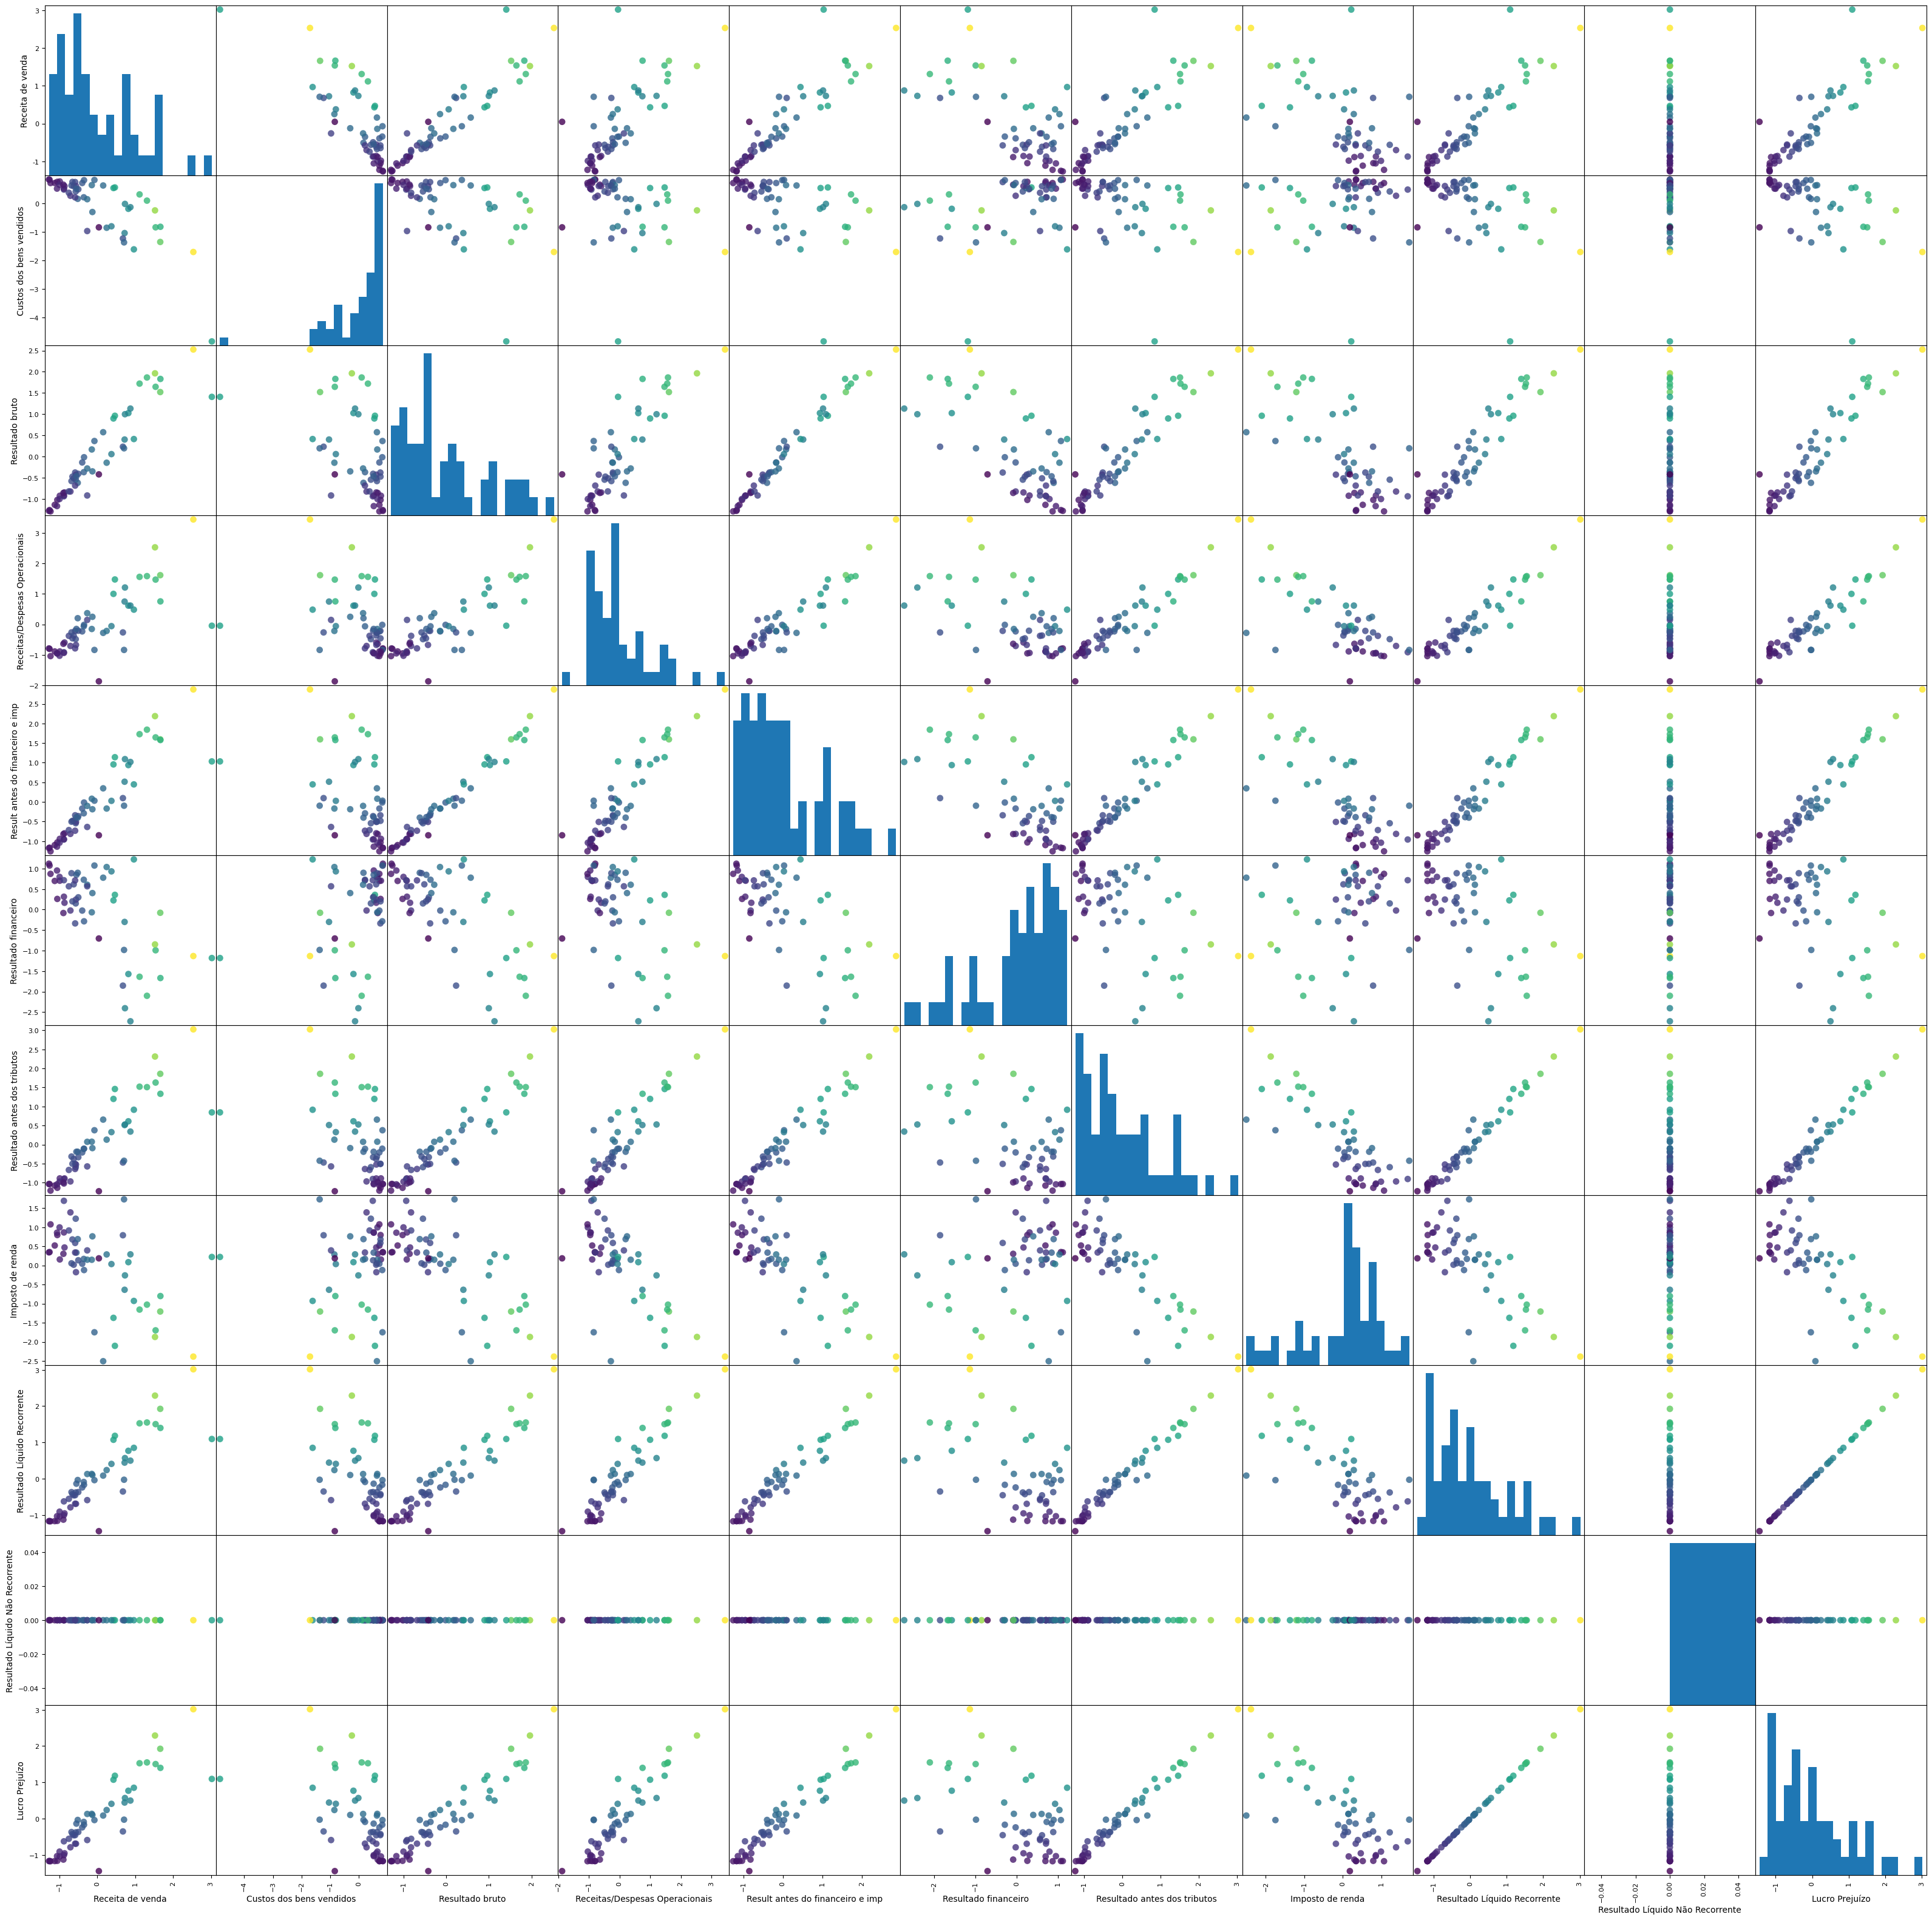

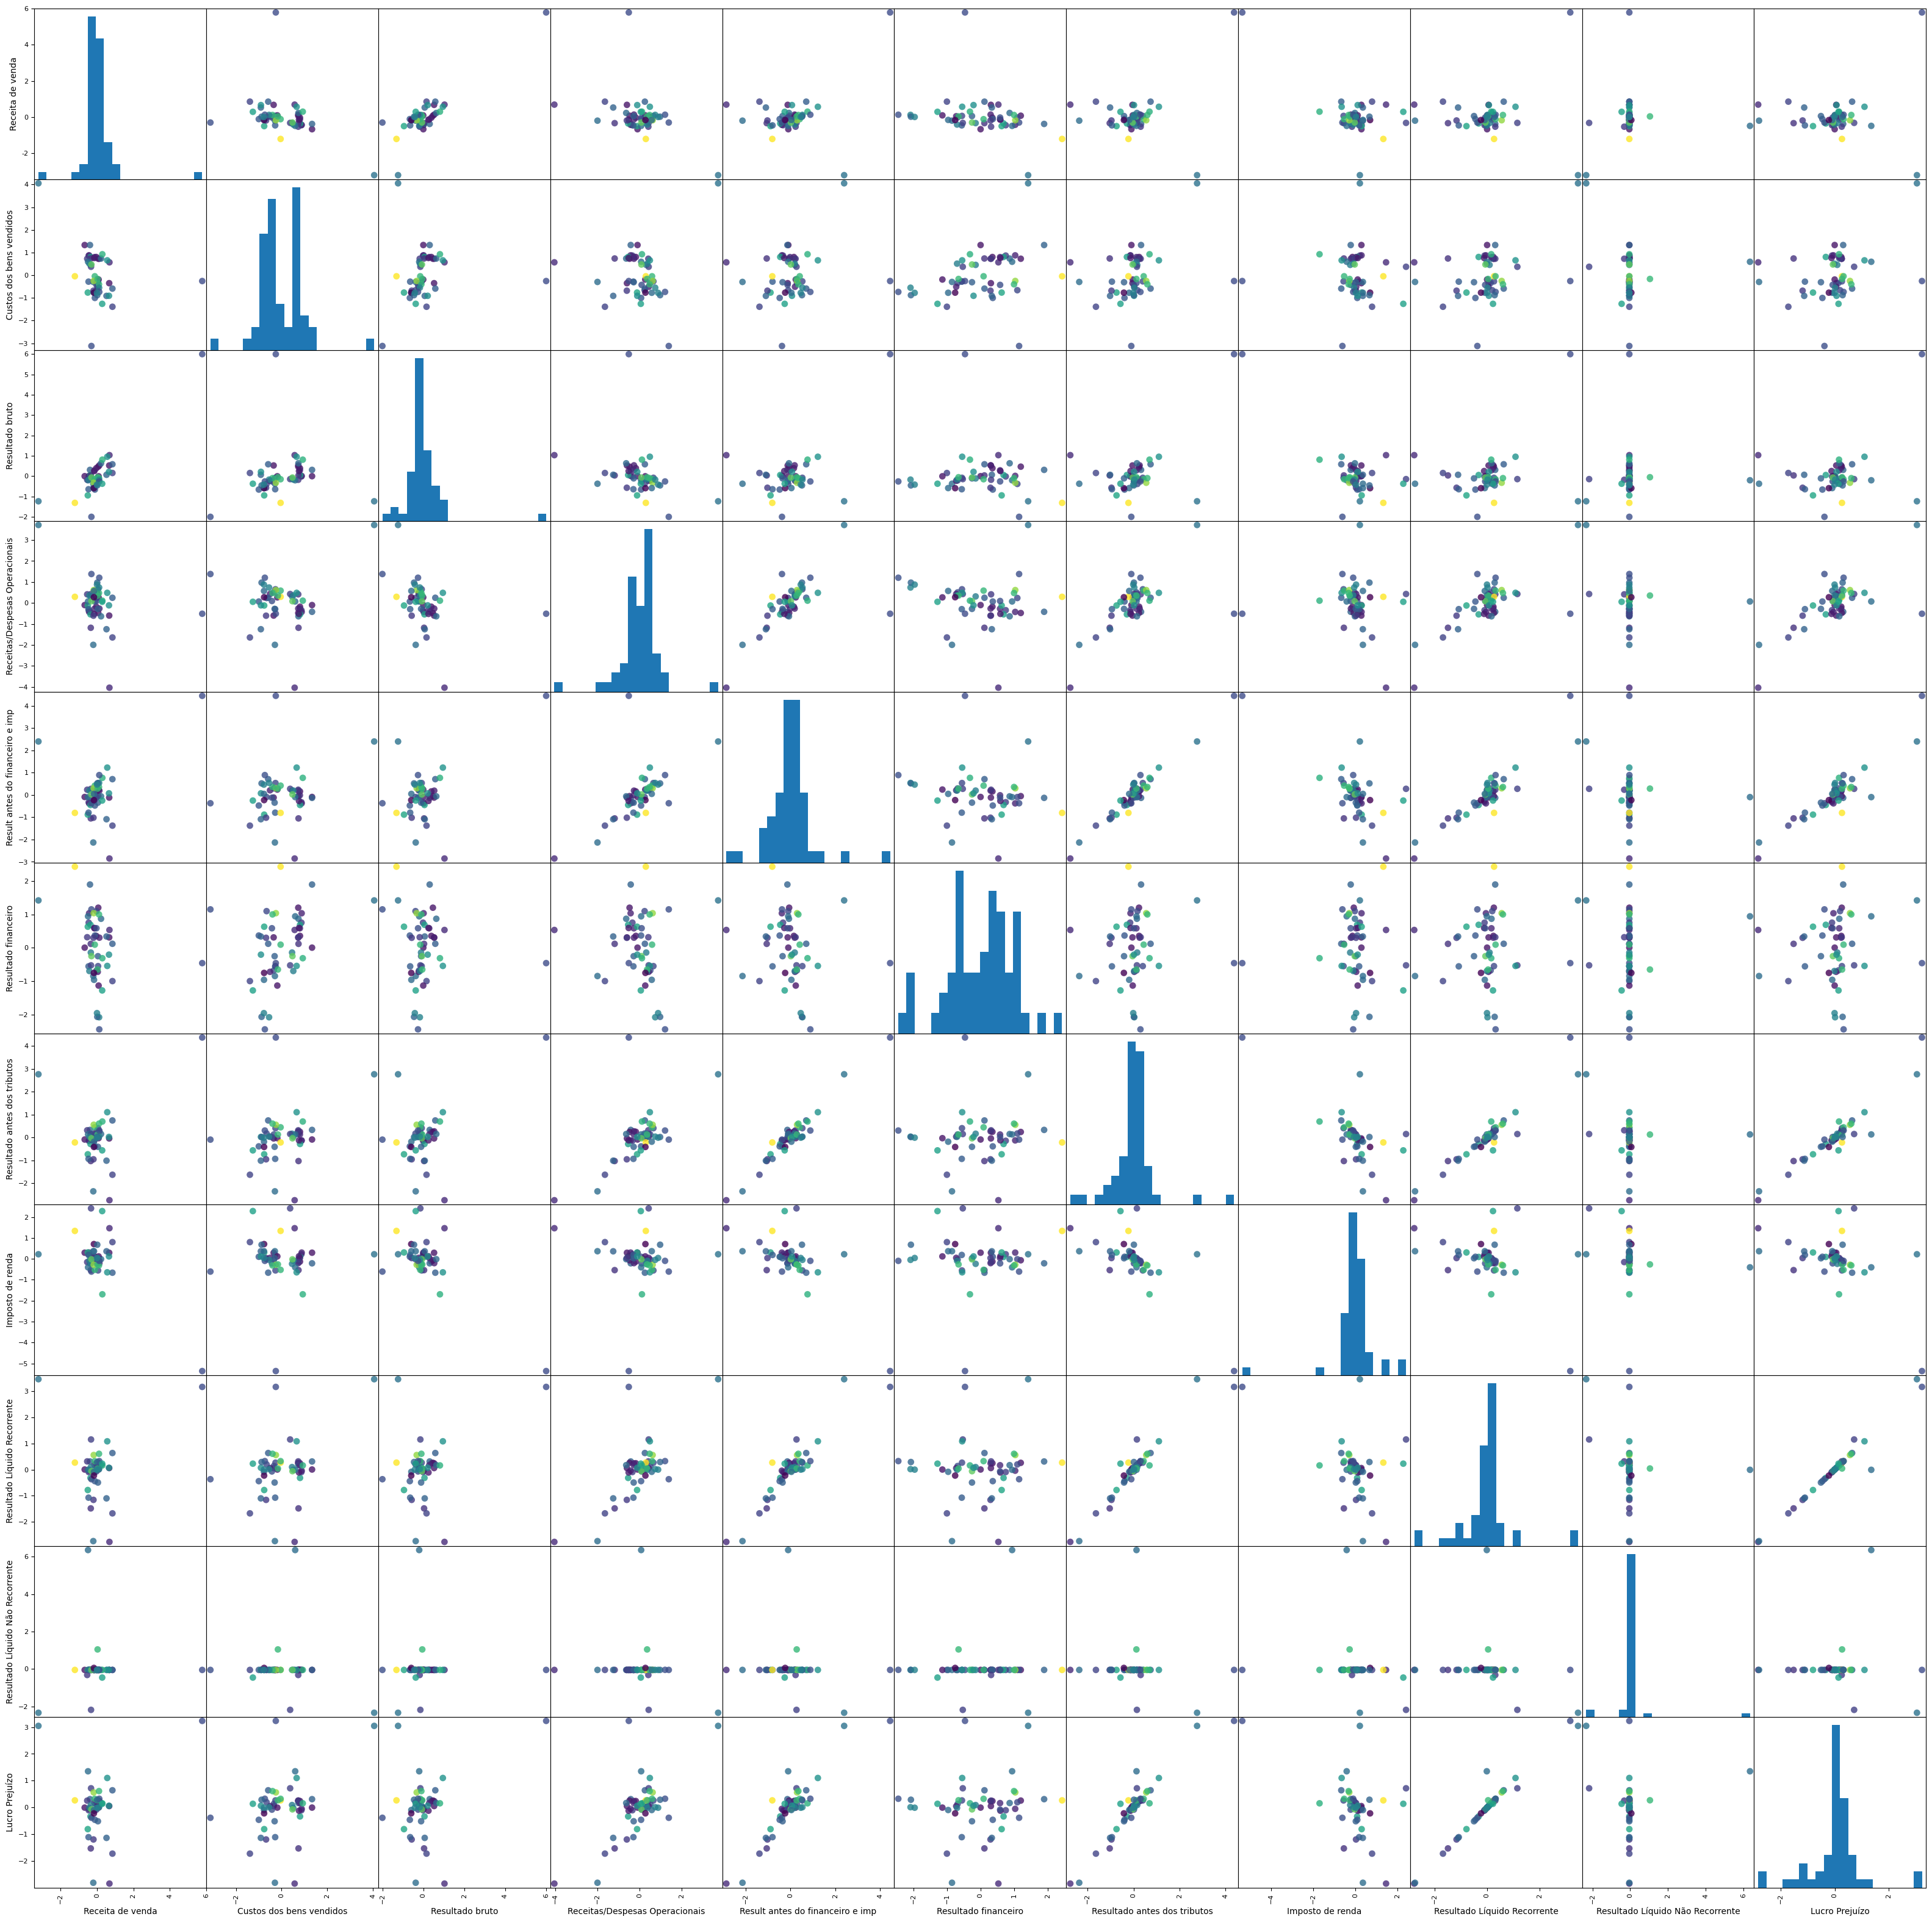

In [222]:
y = dict_empresas['taesa']["Lucro Prejuízo"]
ax1 = pd.plotting.scatter_matrix(dict_empresas['taesa'], alpha=0.8, figsize=(40, 40), marker='o',  hist_kwds={'bins': 20}, s=60, c=y)
ax2 = pd.plotting.scatter_matrix(dict_empresas['eletrobras'], alpha=0.8, figsize=(40, 40), marker='o',  hist_kwds={'bins': 20}, s=60, c=y)

# Correlation matrix

Indicators

Correlation matrix with RECEITA DE VENDA
eletrobras - Receita de venda
Lucro Prejuízo                      1.000000
Resultado Líquido Recorrente        0.977864
Resultado antes dos tributos        0.950763
Result antes do financeiro e imp    0.915206
Receitas/Despesas Operacionais      0.699734
Custos dos bens vendidos            0.343238
Resultado bruto                     0.336074
Receita de venda                    0.142897
Resultado financeiro                0.109439
Resultado Líquido Não Recorrente    0.005974
Imposto de renda                   -0.456152
Name: Lucro Prejuízo, dtype: float64
eletrobras - Custos dos bens vendidos
Lucro Prejuízo                      1.000000
Resultado Líquido Recorrente        0.977864
Resultado antes dos tributos        0.950763
Result antes do financeiro e imp    0.915206
Receitas/Despesas Operacionais      0.699734
Custos dos bens vendidos            0.343238
Resultado bruto                     0.336074
Receita de venda                    0.142897

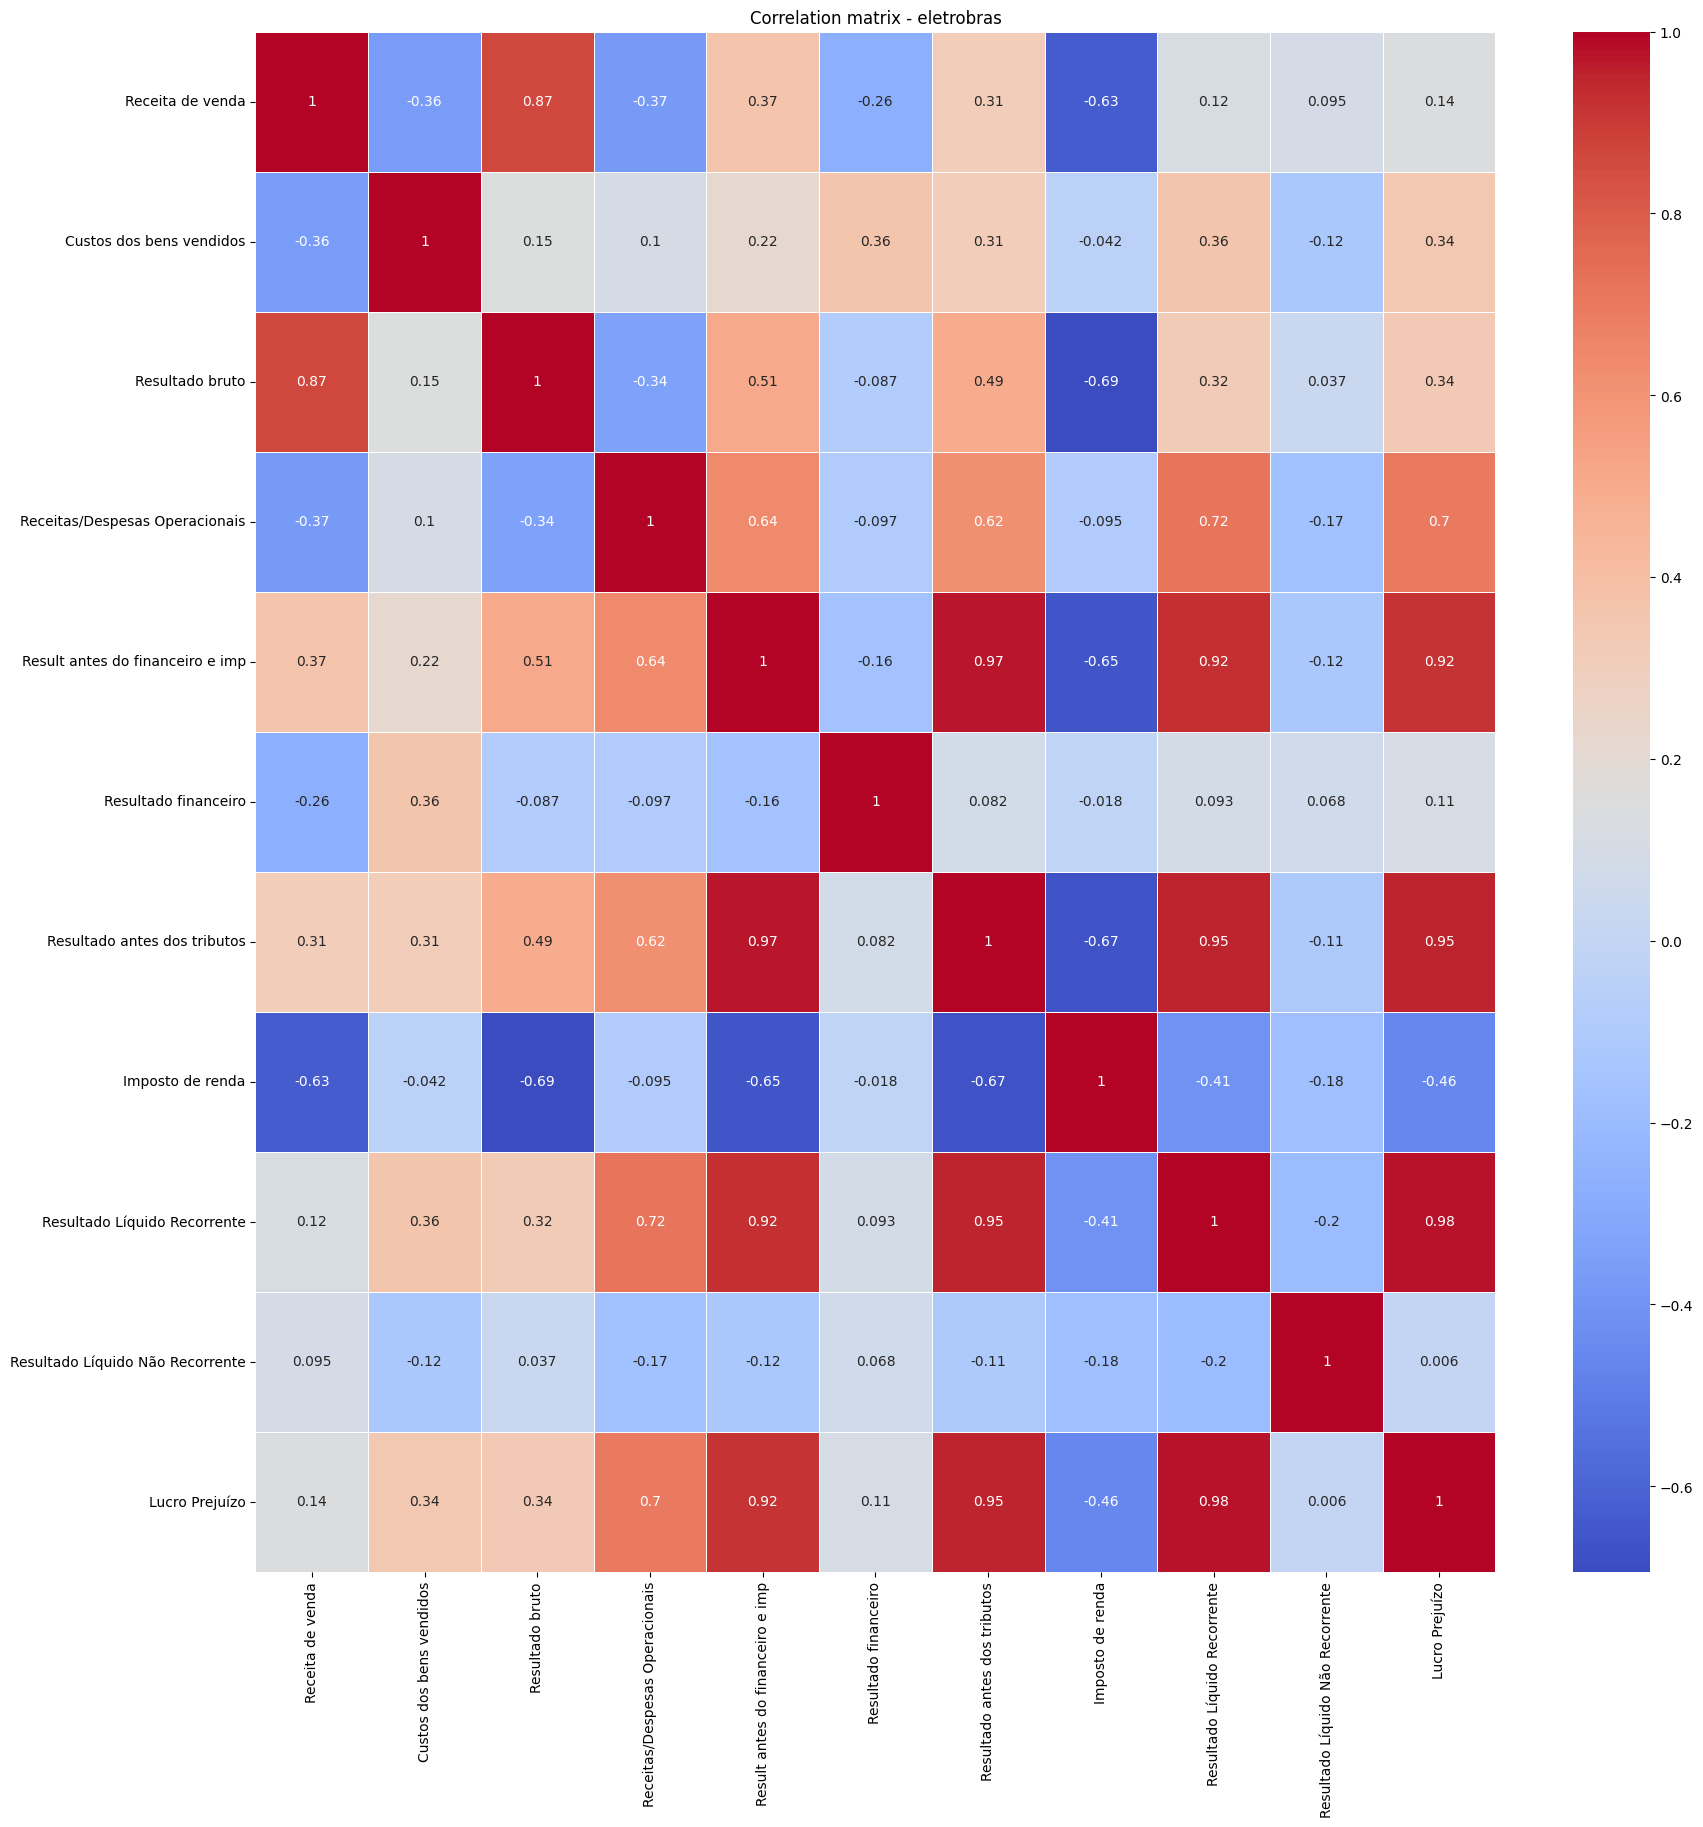

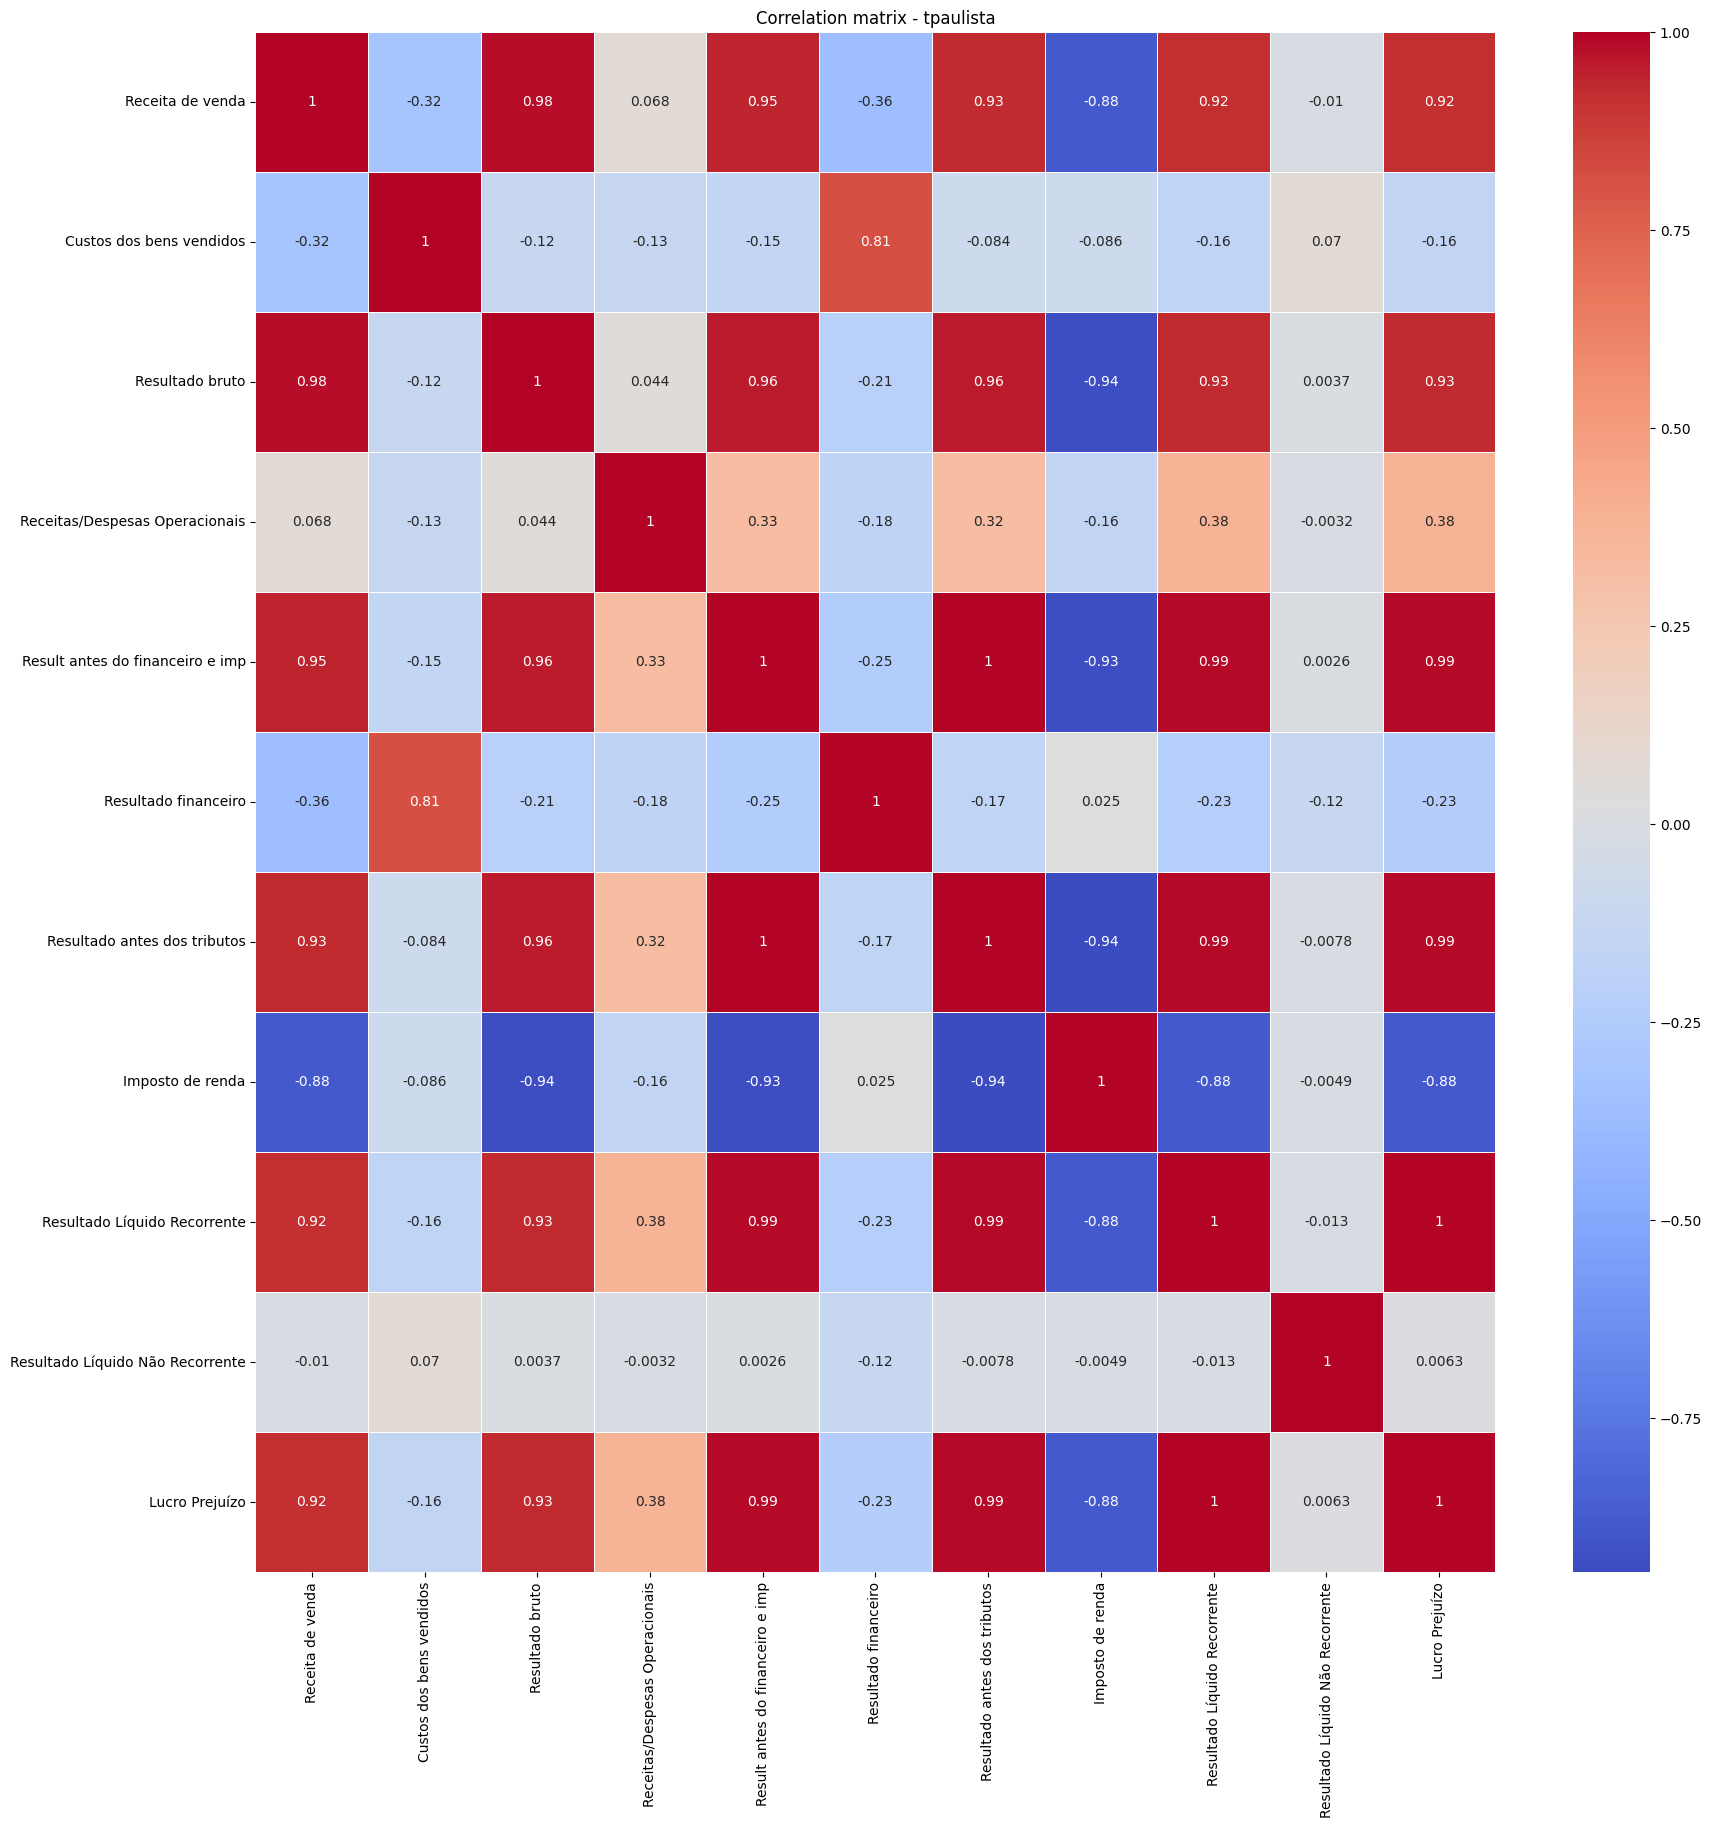

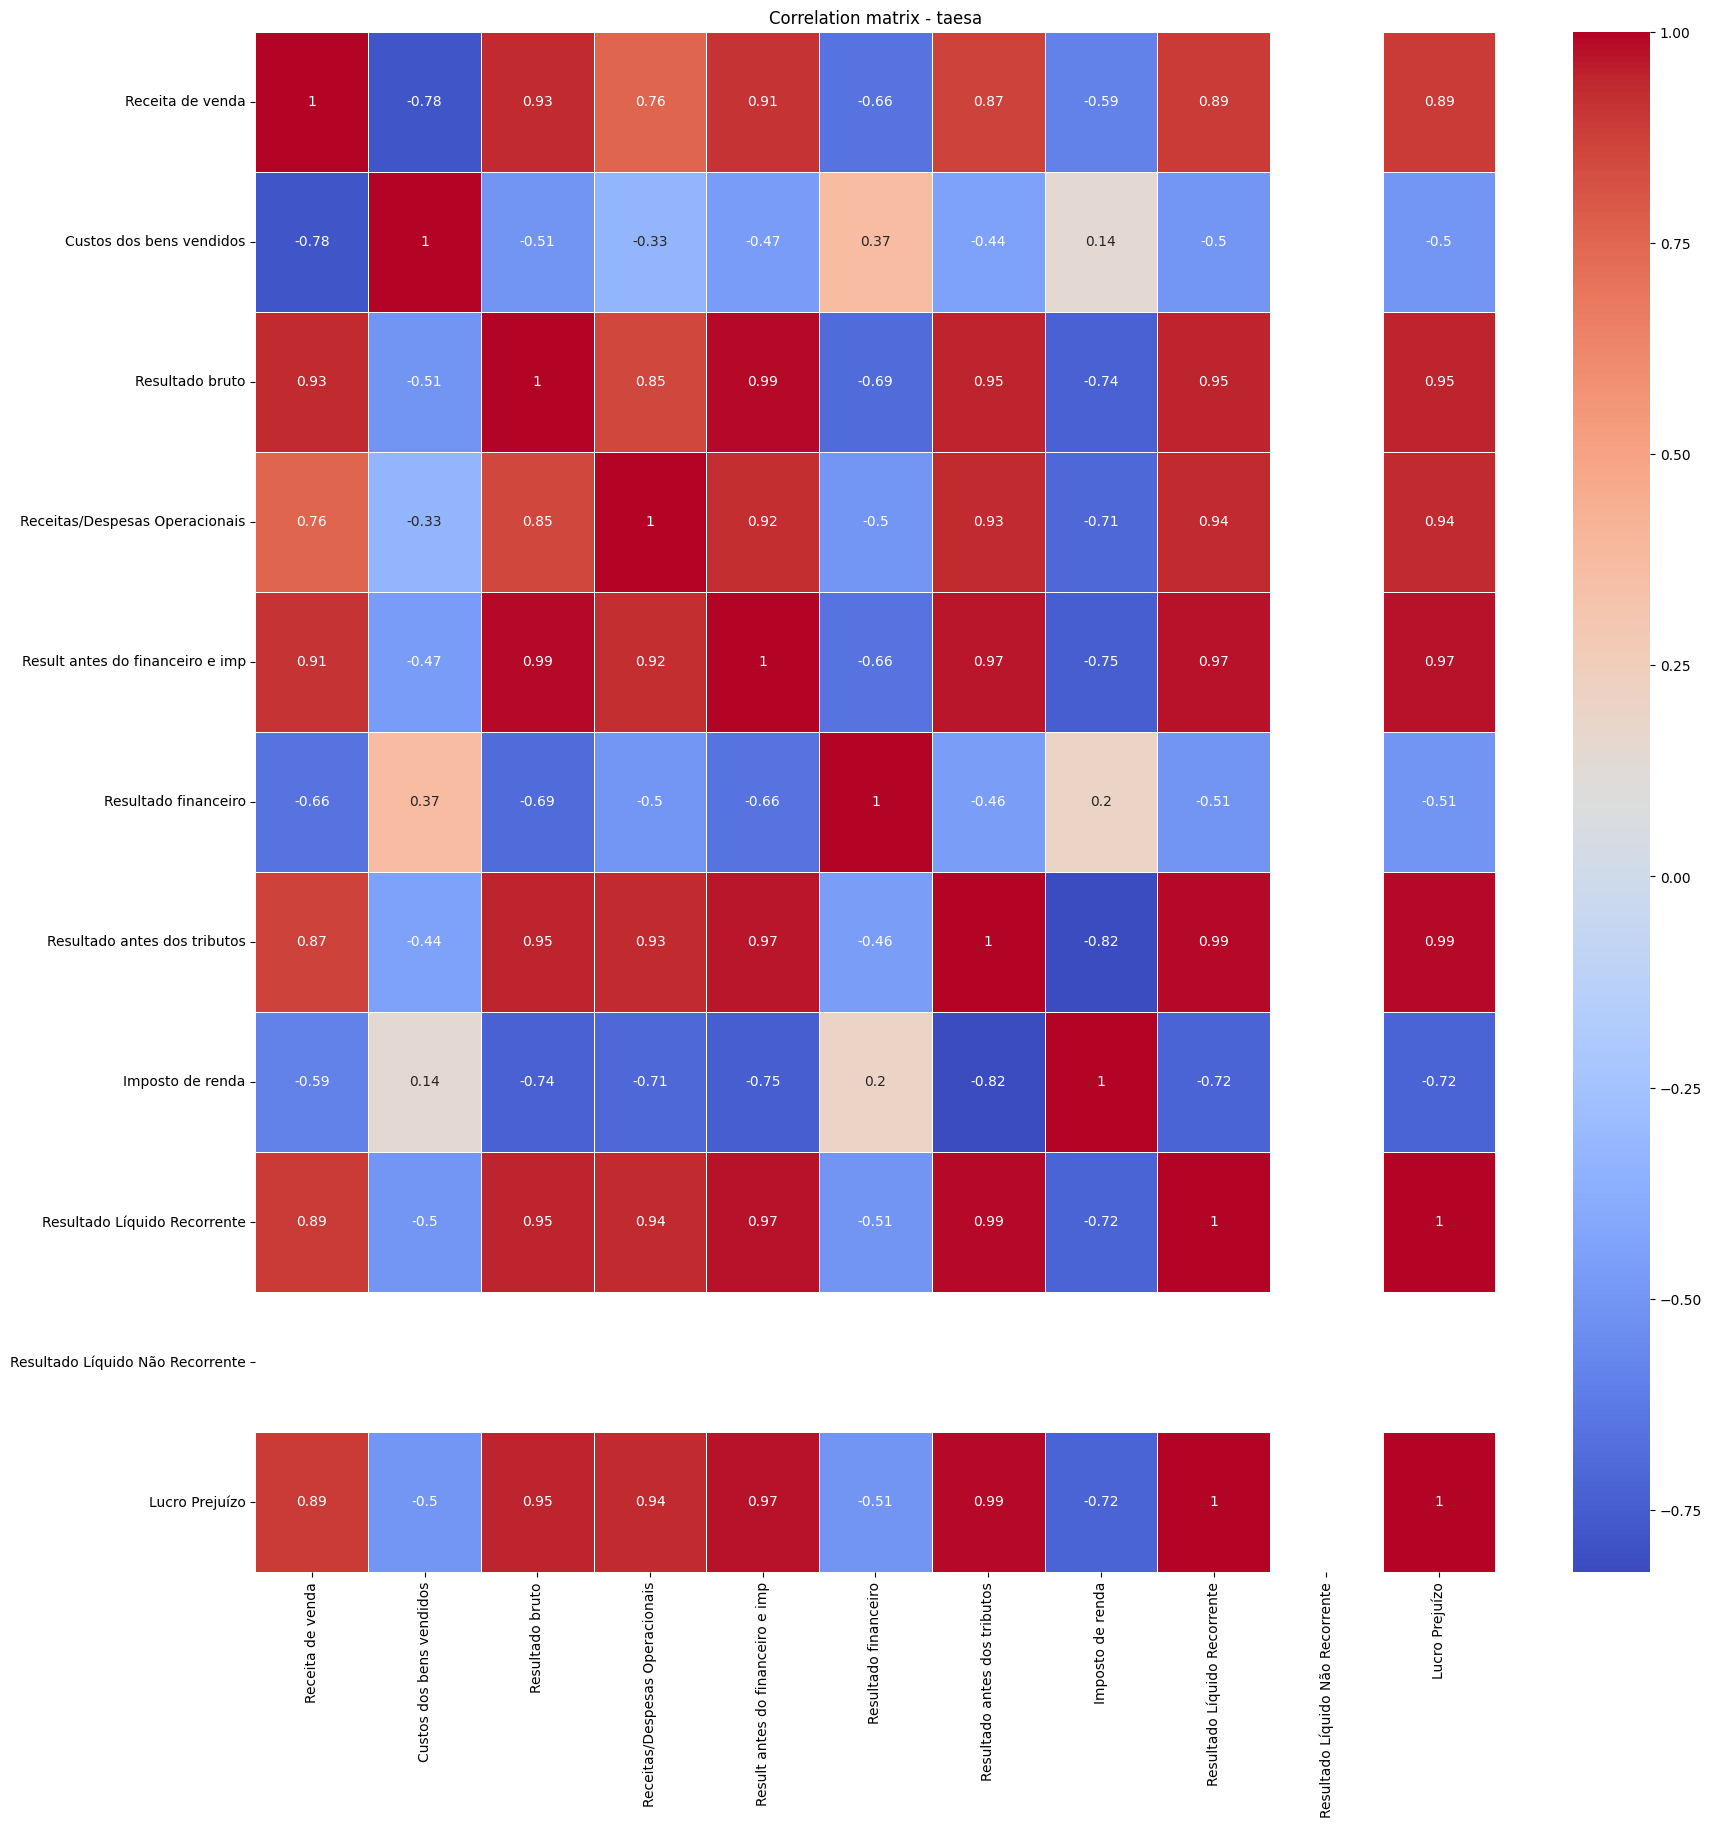

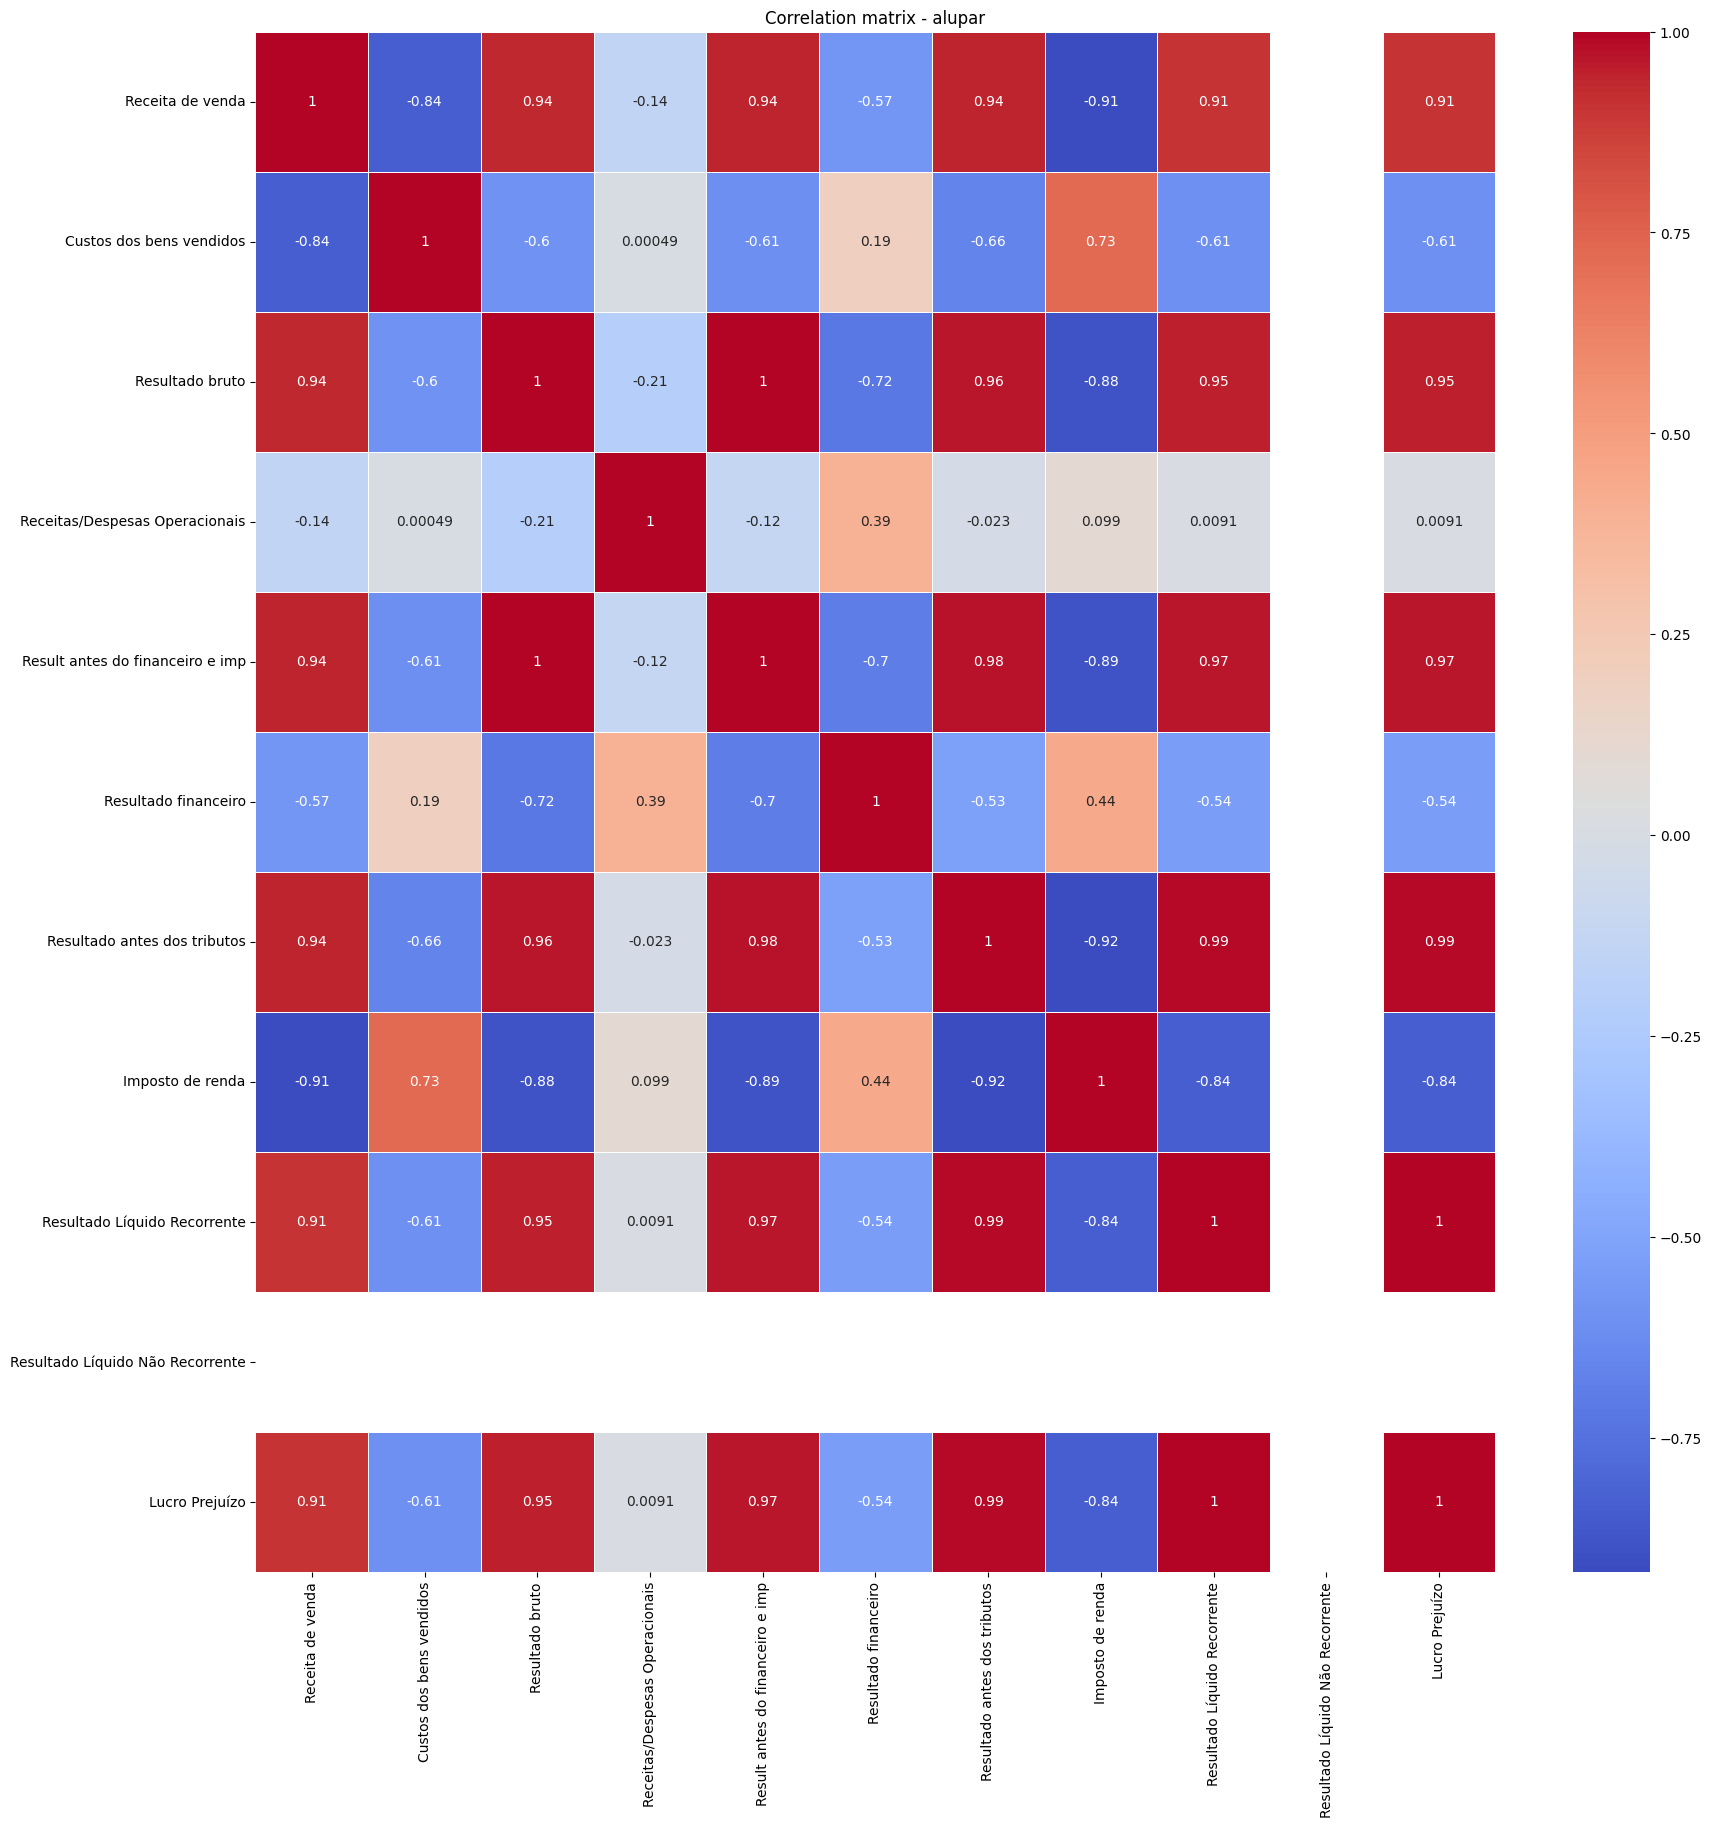

In [223]:
print(f"Correlation matrix with RECEITA DE VENDA")
for empresa in dict_empresas.keys():
    #generete a correlation matrix
    for indicador in dict_empresas[empresa].columns:
        corr = dict_empresas[empresa].corr()
        print(f"{empresa} - {indicador}")
        print(corr['Lucro Prejuízo'].sort_values(ascending=False))

    #plot the heatmap
    plt.figure(figsize=(20, 20))
    plt.title(f"Correlation matrix - {empresa}")
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, )

Indexes

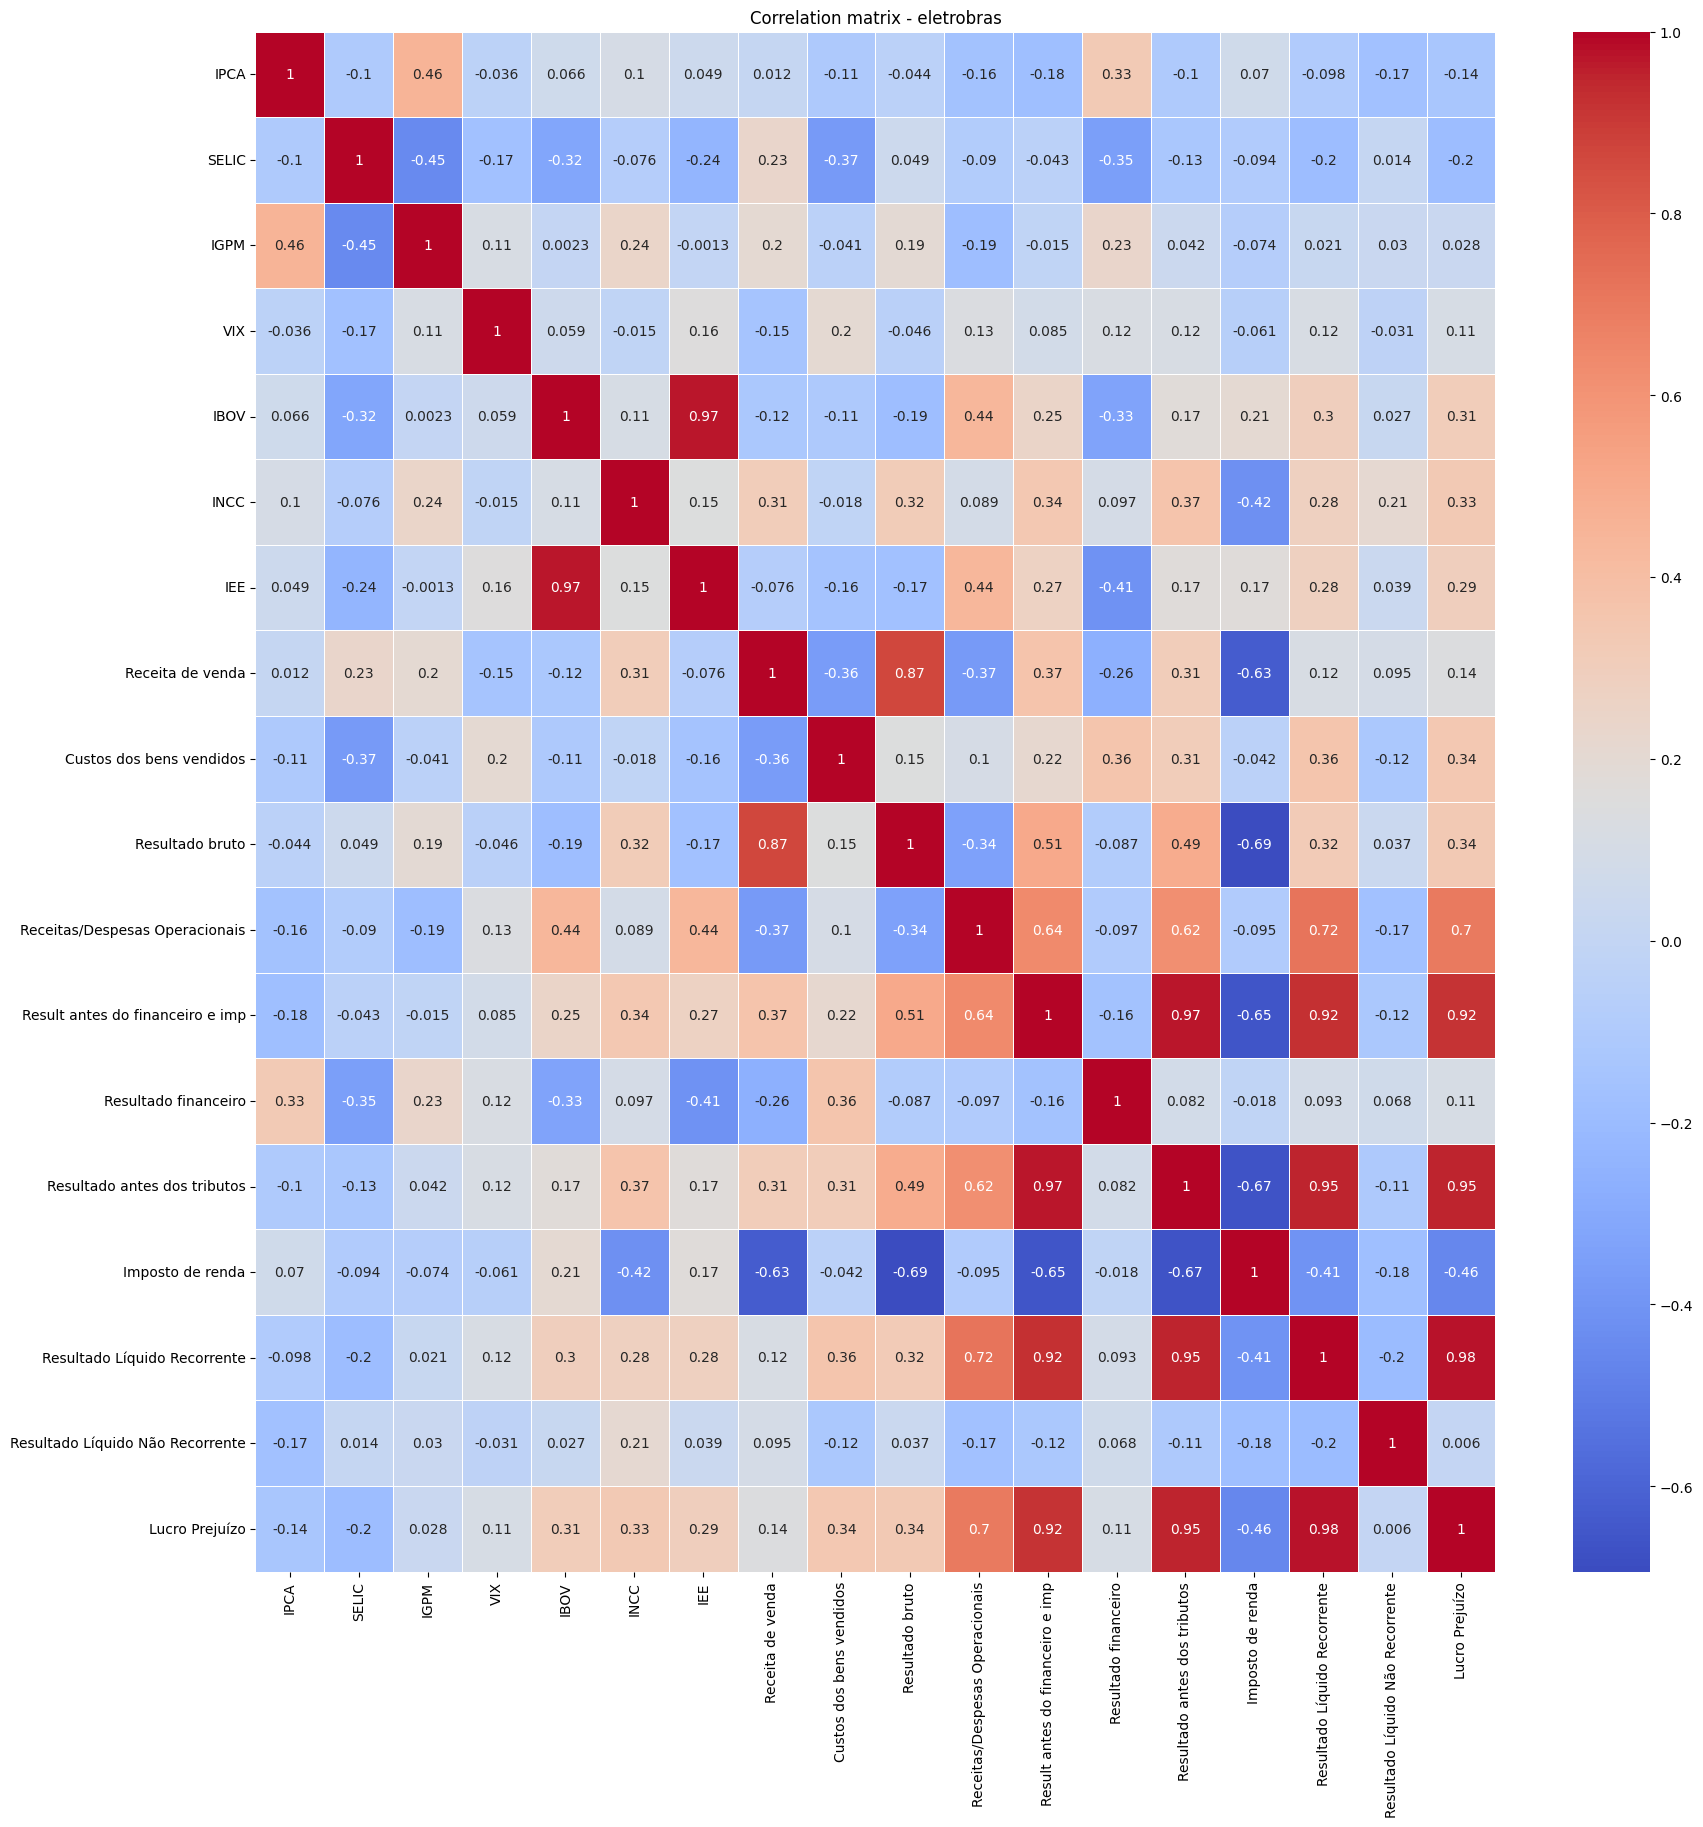

<class 'pandas.core.indexes.base.Index'>


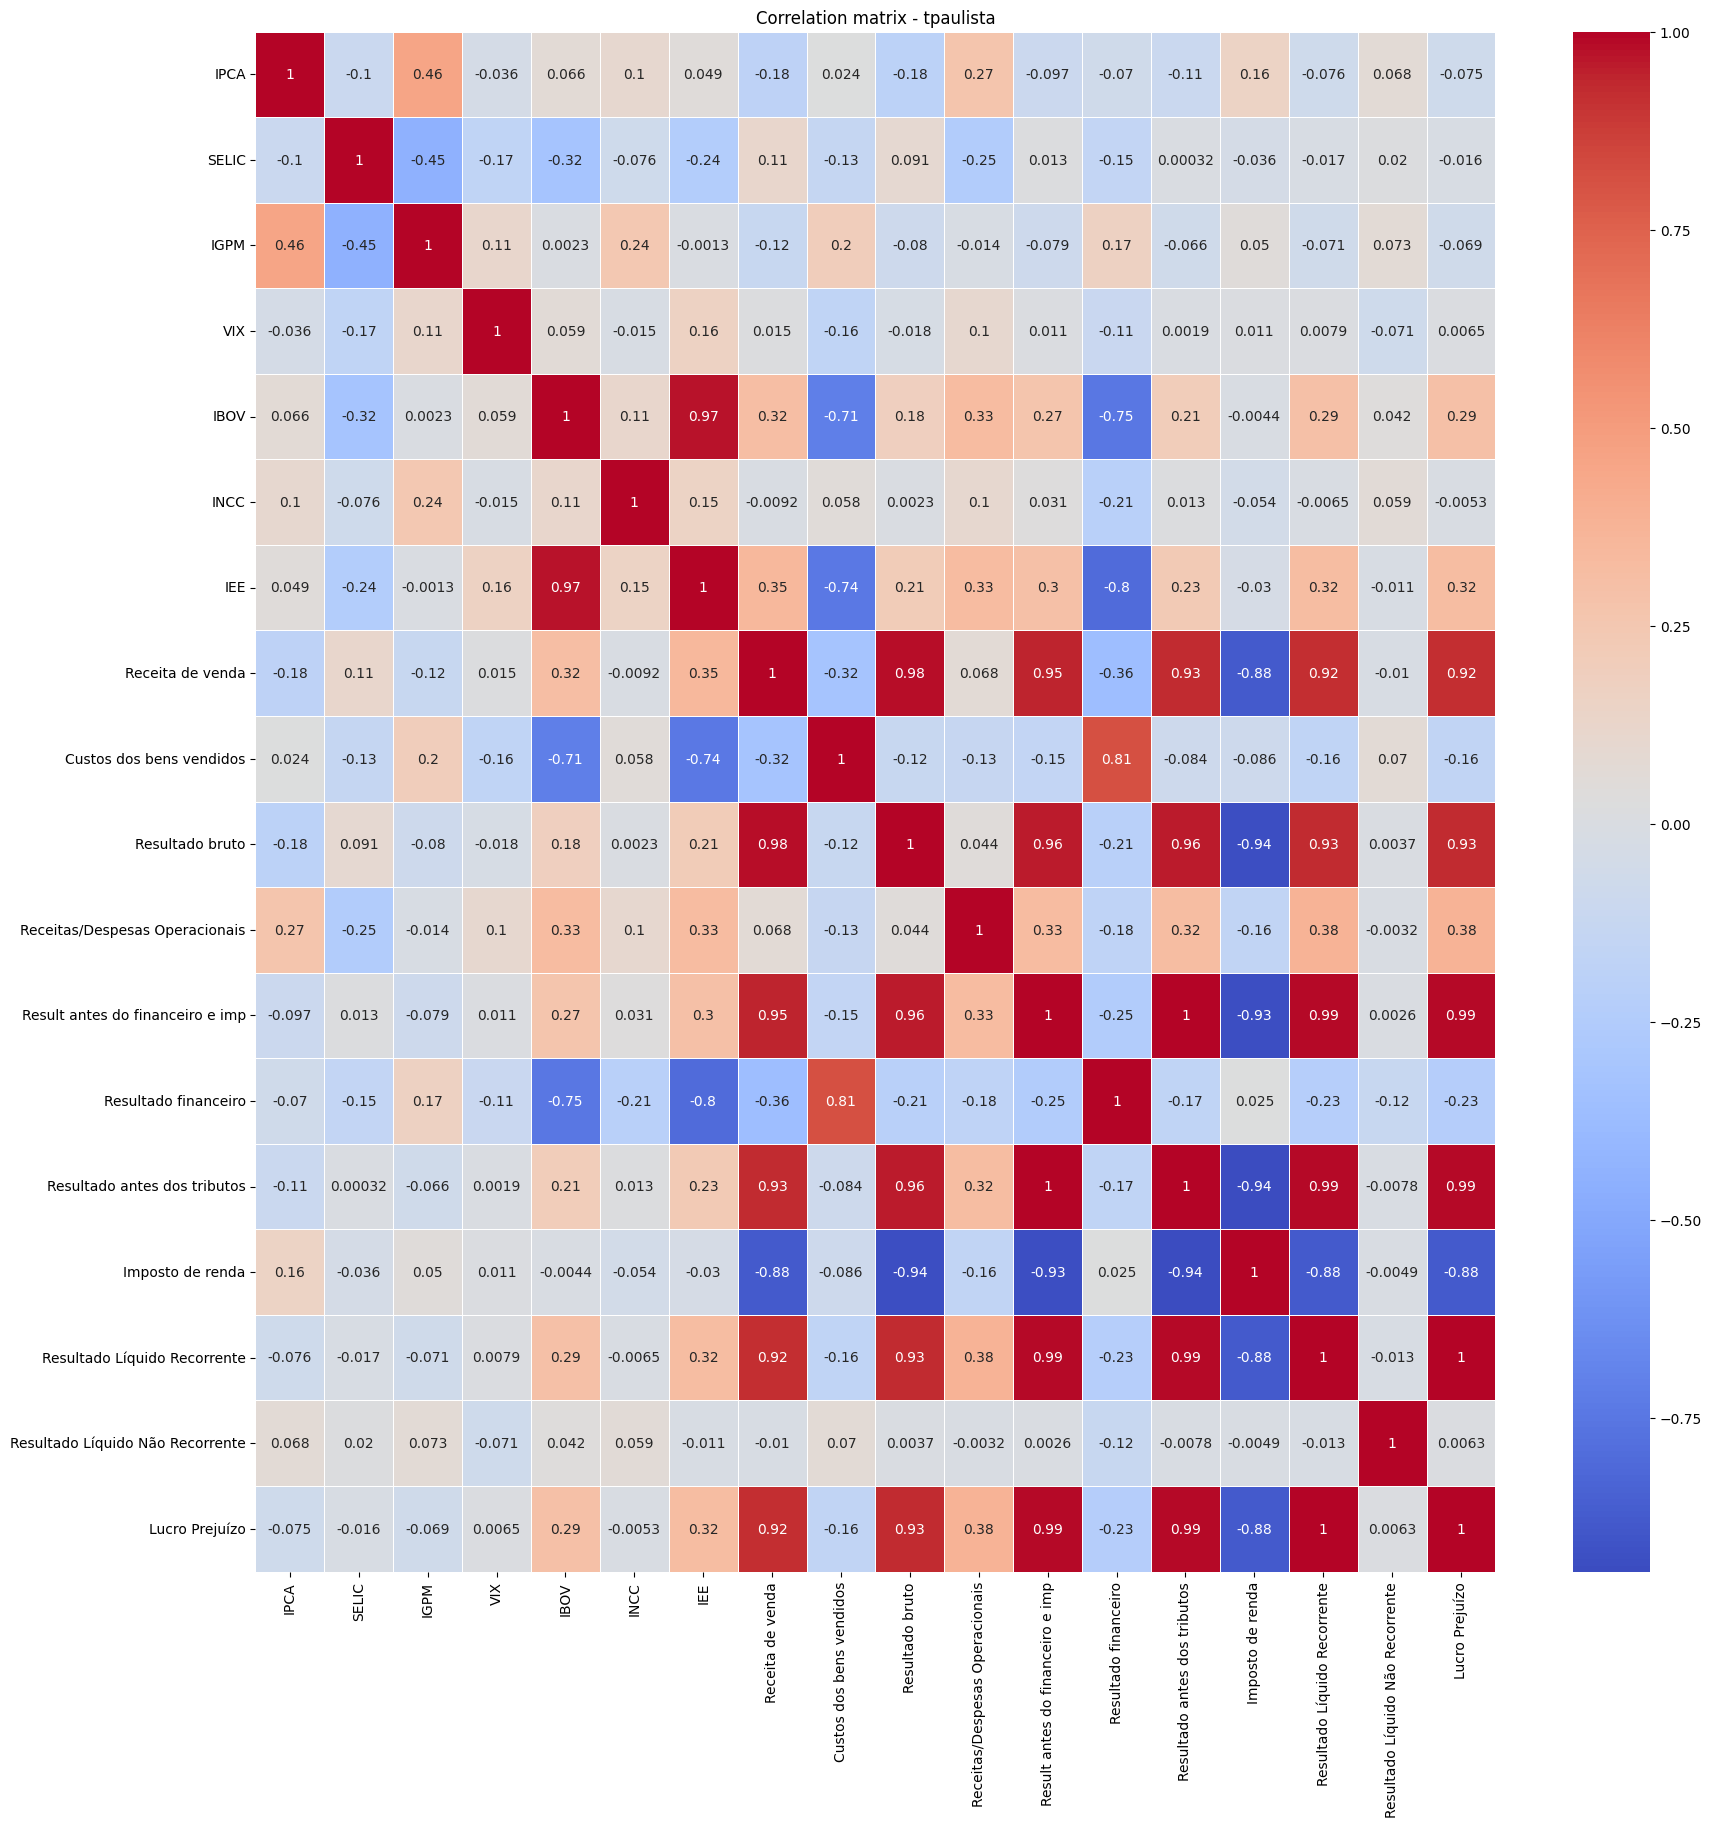

<class 'pandas.core.indexes.base.Index'>


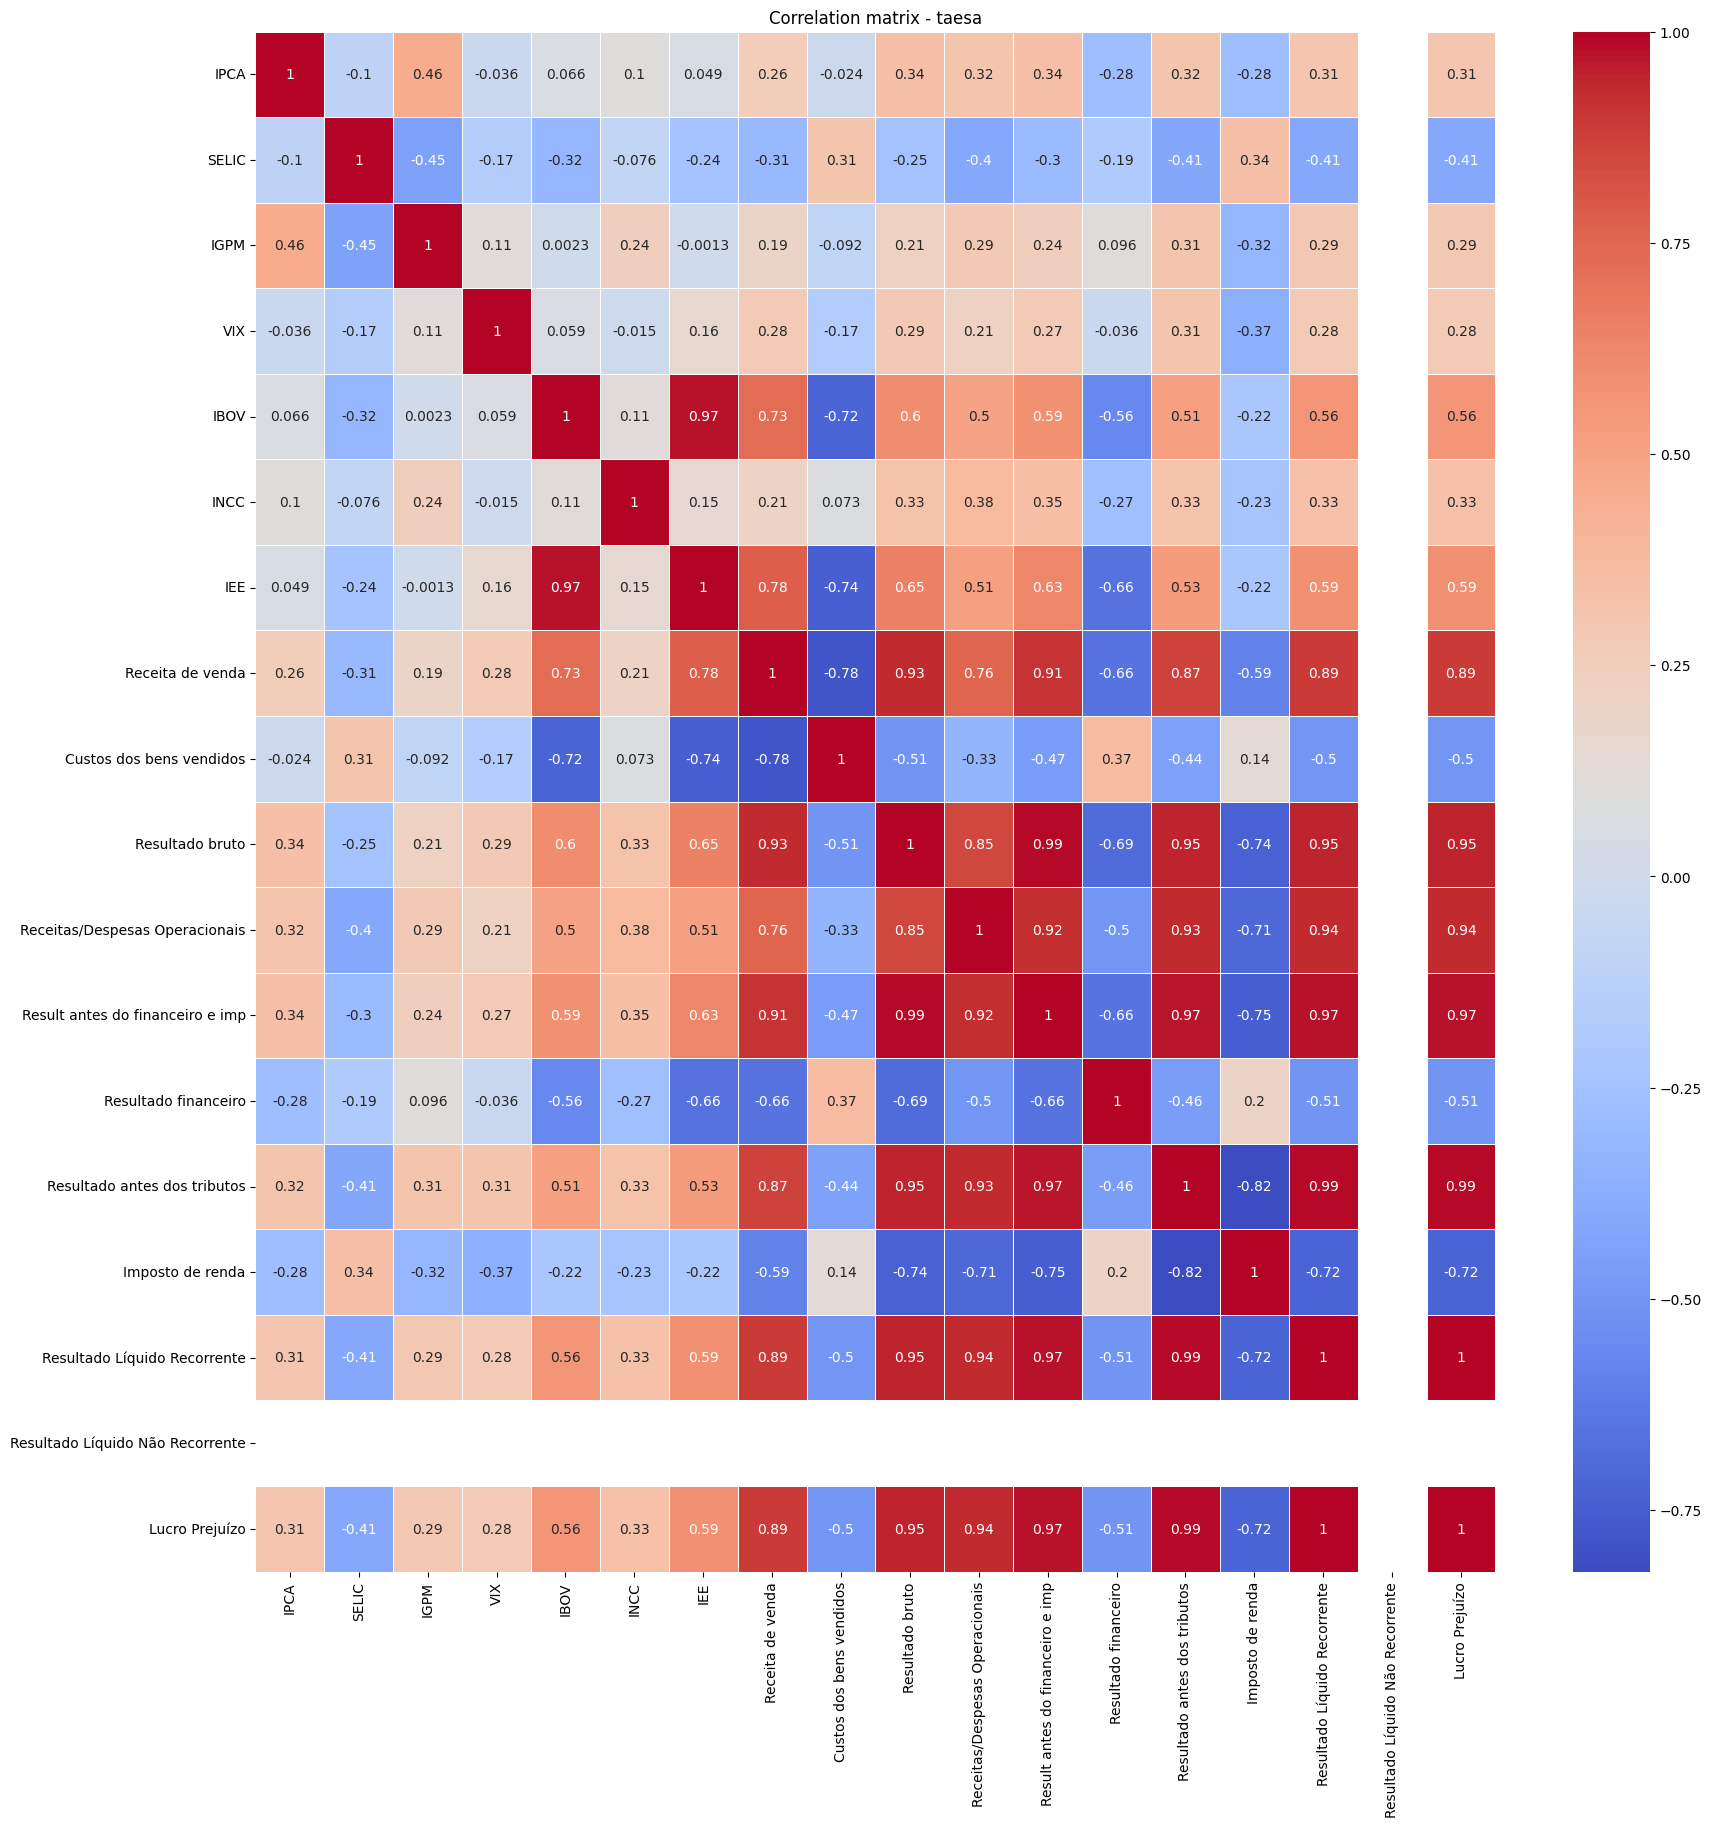

<class 'pandas.core.indexes.base.Index'>


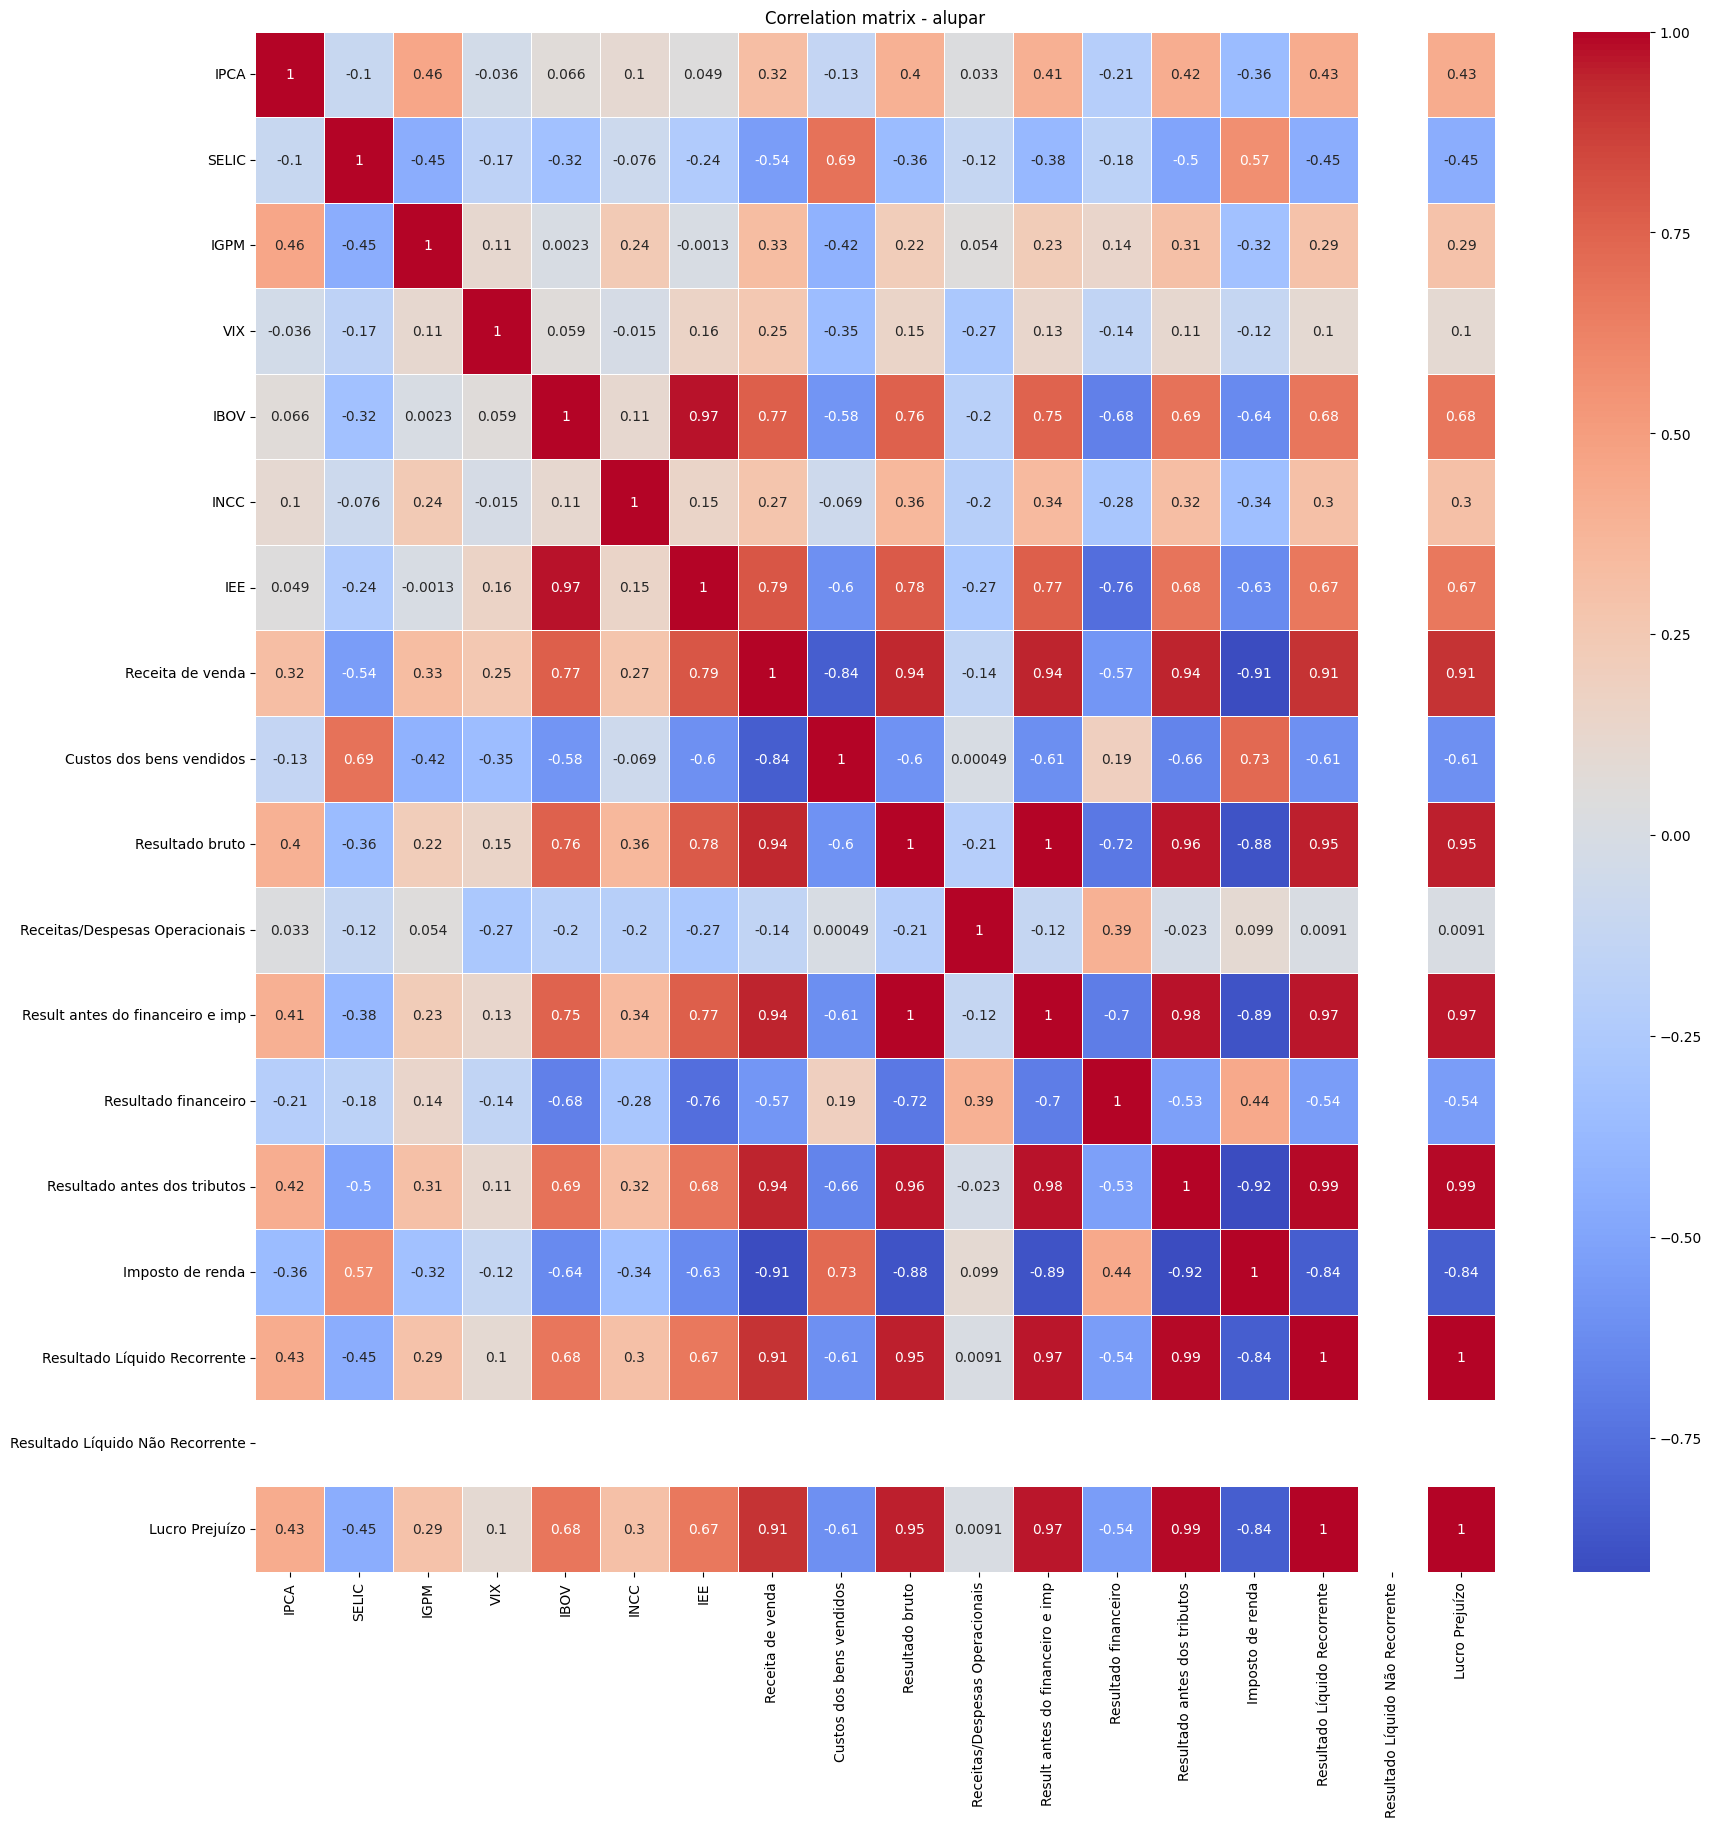

<class 'pandas.core.indexes.base.Index'>


In [249]:
for empresa in dict_empresas.keys():
    # Set the index as datetime to equal the indices dataframe to the combined dataframe
    dict_empresas[empresa].index = pd.to_datetime(dict_empresas[empresa].index)
    combined_df = df_indices.copy()

    for col in dict_empresas[empresa].columns:	
        combined_df[col] = pd.Series(dict_empresas[empresa][col], index=combined_df.index)
    
    # Calculate the correlation matrix
    correlation_matrix = combined_df.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(20, 20))
    plt.title(f"Correlation matrix - {empresa}")
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()
    
    #backing the index to the original format
    dict_empresas[empresa].index = dict_empresas[empresa].index.astype(str)


# Método para gerar lag
* Número de 4 lags (1 ano)
* Referente a índices e indicadores

In [226]:
def creating_lag_matrix(time_series, lag):
    n = len(time_series)
    time_series_lagged = np.zeros((n-lag, lag))
    for i in range(lag, n):
        time_series_lagged[i-lag] = time_series[i-lag:i]

    print(f'Matrix {np.shape(time_series_lagged)} created with success')
    return time_series_lagged

In [227]:
# Criando matrizes com lags para cada indicador de empresas
dict_empresas_lagged = {}
for empresa in dict_empresas.keys():
    # Inicializando o dicionário para a empresa, caso ainda não exista
    if empresa not in dict_empresas_lagged:
        dict_empresas_lagged[empresa] = {}

    for indicador in dict_empresas[empresa].columns:
        time_series = dict_empresas[empresa][indicador].values

        # cria uma matriz de tamanho nx4
        print(f'Creating lagged indicator matrix - {empresa} - {indicador}')
        dict_empresas_lagged[empresa][indicador] = creating_lag_matrix(time_series, 4)


Creating lagged indicator matrix - eletrobras - Receita de venda
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Custos dos bens vendidos
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado bruto
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Receitas/Despesas Operacionais
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Result antes do financeiro e imp
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado financeiro
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado antes dos tributos
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Imposto de renda
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado Líquido Recorrente
Matrix (49, 4) created with success
Creating lagged indicator 

In [228]:
# Criando matrizes de lags para os índices macro econômicos
dict_indices_lagged = {}
for indice in df_indices.columns:
    time_series = df_indices[indice].values
    #cria uma matriz de tamanho nx4
    print(f'Creating lagged index matrix - {indice}')
    dict_indices_lagged[indice] = creating_lag_matrix(time_series, 4)

Creating lagged index matrix - IPCA
Matrix (49, 4) created with success
Creating lagged index matrix - SELIC
Matrix (49, 4) created with success
Creating lagged index matrix - IGPM
Matrix (49, 4) created with success
Creating lagged index matrix - VIX
Matrix (49, 4) created with success
Creating lagged index matrix - IBOV
Matrix (49, 4) created with success
Creating lagged index matrix - INCC
Matrix (49, 4) created with success
Creating lagged index matrix - IEE
Matrix (49, 4) created with success


## ARX MODEL - BATCH

Building PSI matrix - Least Square Method

In [229]:
psi_empresas = {}
for empresa in dict_empresas_lagged.keys():
    psi_empresas[empresa] = np.concatenate(list(dict_empresas_lagged[empresa].values()), axis=1)
    for indice in dict_indices_lagged.keys():
        #print(f"{empresa} - psi shape: {np.shape(psi_empresas[empresa])}")
        psi_empresas[empresa] = np.concatenate((psi_empresas[empresa], dict_indices_lagged[indice]), axis=1)
    
print(f"Matrix psi shape: {np.shape(psi_empresas['eletrobras'])}")

Matrix psi shape: (49, 72)


Building the model and calculating models MSE

eletrobras - MSE: 1.2749521275496155e-28
tpaulista - MSE: 1.470372106486628e-28
taesa - MSE: 0.003314883998876431
alupar - MSE: 0.0017148097628464107


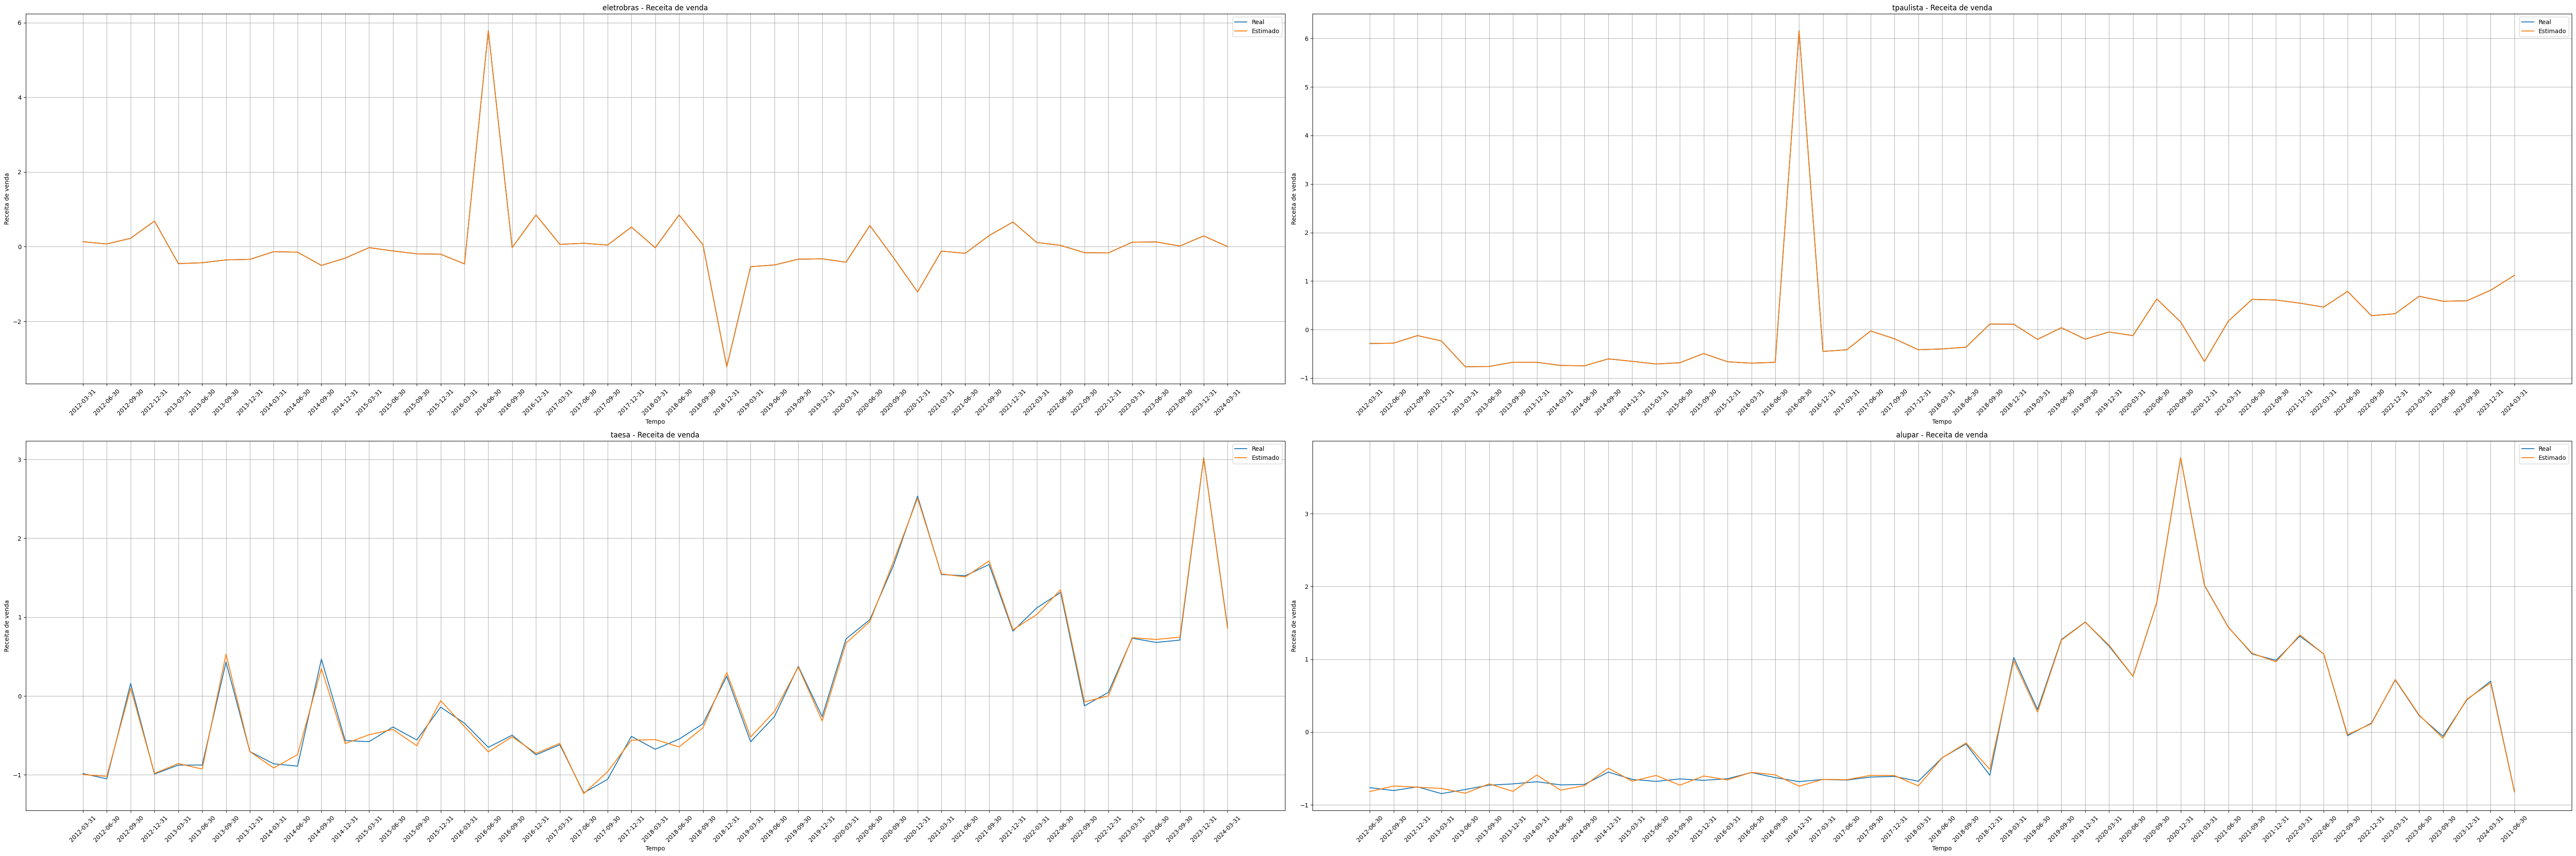

In [250]:
fig, axs = plt.subplots(2, 2, figsize=(60, 20))
theta = {}	
for i,empresa in enumerate(psi_empresas.keys()):
    dict_empresas[empresa].index = pd.Index(dict_empresas[empresa].index)
    psi = psi_empresas[empresa]
    #print(f"{empresa} - {np.shape(psi)}")
    psi_pseudo_inv = np.linalg.pinv(psi)
    inicio_output = len(dict_empresas[empresa]['Receita de venda']) - len(psi)
    theta[empresa] = np.dot(psi_pseudo_inv, dict_empresas[empresa]['Receita de venda'][inicio_output:])
    y_estimado = np.dot(psi, theta[empresa])
    #print(f"{empresa} - Theta = {np.shape(theta)}")
    mse = np.mean((dict_empresas[empresa]['Receita de venda'][inicio_output:] - y_estimado)**2)
    print(f'{empresa} - MSE: {mse}')

    ax = axs[i // 2, i % 2]  # Selecionar o subplot correspondente
    ax.set_title(f'{empresa} - Receita de venda')
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Receita de venda')
    ax.plot(dict_empresas[empresa]['Receita de venda'][inicio_output:], label='Real')
    ax.plot(y_estimado, label='Estimado')
    ax.legend()
    ax.grid()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Free run simulation

In [251]:
def free_run_simulation_arx(theta, psi_initial, steps, num_lags, exogenous_vars):
    """
    Free-run simulation for ARX model with exogenous variables and multiple lags.

    Parameters:
    - theta: The pre-existing ARX parameters (first num_lags parameters for y, then for exogenous inputs).
    - psi_initial: The initial regressor (past values of y and exogenous variables).
    - steps: Number of simulation steps to perform.
    - num_lags: Number of lags for the ARX model.
    - exogenous_vars: The fixed exogenous variables over time (remain constant during the free-run simulation).

    Returns:
    - y_estimation: The predicted output values for each step.
    """
    psi_free_run = np.array(psi_initial)  # Convert psi_initial to a numpy array
    y_estimation = []            # List to store the predicted y values

    # Extract the current autoregressive part (only get the first num_lags columns)

    current_psi = psi_free_run[:1, :]
    print(f"current_psi={np.shape(current_psi)}")
    y_hat = sum(np.dot(current_psi, theta))  # Linear combination of theta and psi
    print(f"y_hat={np.shape(y_hat)}")

    # Append the estimated value to the list
    y_estimation.append(y_hat)
    print(y_estimation)

    psi_ar_part = psi_free_run[:, :num_lags]

    # Loop for the number of simulation steps
    for t in range(steps):
        print(t)
        
        if t == 0:
            continue
        
        print(f"{empresa} - Start Step {t+1} ********************************************")
        #Updating the autoregressive part whith the new estimated value
        psi_lag_4 = np.insert(psi_ar_part[:,0], 1, psi_ar_part[:,1].copy()[-1], axis=0)
        psi_lag_3 = np.insert(psi_ar_part[:,1], 1, psi_ar_part[:,2].copy()[-1], axis=0)
        psi_lag_2 = np.insert(psi_ar_part[:,2], 1, psi_ar_part[:,3].copy()[-1], axis=0)
        psi_lag_1 = np.insert(psi_ar_part[:,3], 1, y_estimation[-1])
        print(f"psi_lag shape = {np.shape(psi_lag_1)}")

         # Transformar os arrays em colunas de uma matriz
        psi_ar_part = np.column_stack((psi_lag_4, psi_lag_3, psi_lag_2, psi_lag_1))

        # Combine the autoregressive part with the fixed exogenous variables
        current_psi = np.column_stack((psi_ar_part, exogenous_vars[:t+1]))
        print(f"current_psi={np.shape(current_psi)}")
        
        # Estimate y using the current psi and theta
        y_estimation = np.dot(current_psi, theta)  # Linear combination of theta and psi
        print(10*'*')
        print(f"Estimation shape={np.shape(y_estimation)}")

        # Update psi: Shift the autoregressive part and append the new y_hat
        print(f"Current psi {np.shape(current_psi)}")
        print(f"End Step {t+1} - y_hat: {y_estimation[-1]}")
    

    return np.array(y_estimation)


In [232]:
#Function implementation
y_simulation_arx = {}
for empresa in psi_empresas.keys():
    num_lags = 4                                          # 4 lags in the model
    psi_initial = psi_empresas[empresa][:1]               # Initial regressor (first row of psi matrix)
    exogenous_vars = psi_empresas[empresa][:,4:]          # Exogenous variables (remain constant) 
    print(exogenous_vars.shape)                           # Exogenous variables remain constant
    steps = len(psi_empresas[empresa]) - 1         # Number of steps for simulation
                    
    # Perform the free-run simulation
    y_simulation_arx[empresa] = free_run_simulation_arx(theta[empresa], psi_initial, steps, num_lags, exogenous_vars)

(49, 68)
current_psi=(1, 72)
y_hat=()
[0.13324805160202313]
0
1
eletrobras - Start Step 2 ********************************************
psi_lag shape = (2,)
current_psi=(2, 72)
**********
Estimation shape=(2,)
Current psi (2, 72)
End Step 2 - y_hat: 0.07193160411114263
2
eletrobras - Start Step 3 ********************************************
psi_lag shape = (3,)
current_psi=(3, 72)
**********
Estimation shape=(3,)
Current psi (3, 72)
End Step 3 - y_hat: 1.0480300703689753
3
eletrobras - Start Step 4 ********************************************
psi_lag shape = (4,)
current_psi=(4, 72)
**********
Estimation shape=(4,)
Current psi (4, 72)
End Step 4 - y_hat: 3.633646375879197
4
eletrobras - Start Step 5 ********************************************
psi_lag shape = (5,)
current_psi=(5, 72)
**********
Estimation shape=(5,)
Current psi (5, 72)
End Step 5 - y_hat: 1.955677543086594
5
eletrobras - Start Step 6 ********************************************
psi_lag shape = (6,)
current_psi=(6, 72)
*

************** Company: eletrobras **************
MSE Free Run 25.31566202976585
RMSE Free Run 5.031467184605883


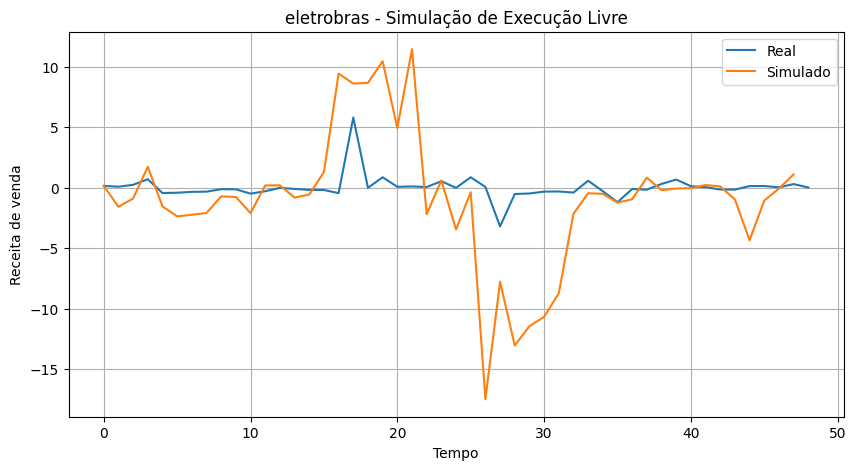

************** Company: tpaulista **************
MSE Free Run 4.7443142937483325
RMSE Free Run 2.1781446907284034


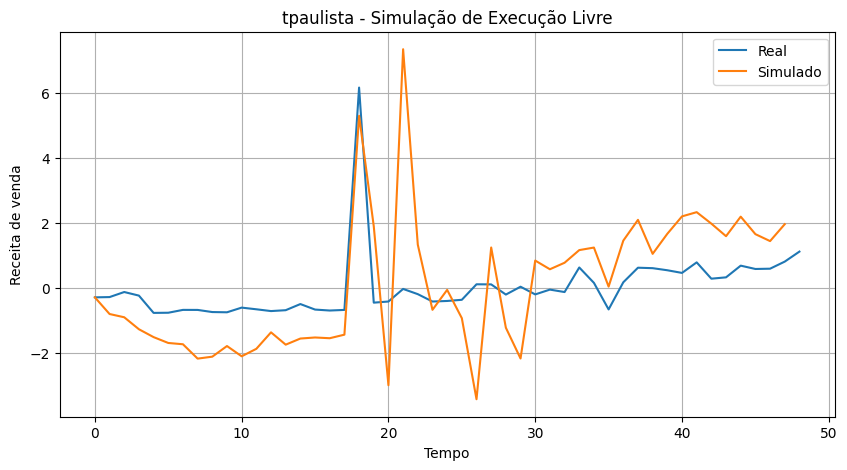

************** Company: taesa **************
MSE Free Run 0.6731487566120881
RMSE Free Run 0.8204564318792852


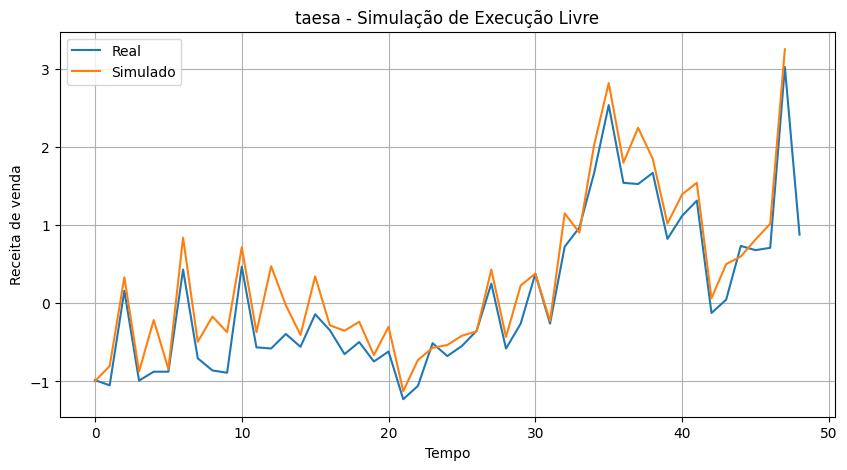

************** Company: alupar **************
MSE Free Run 2.267964735504568
RMSE Free Run 1.5059763396230925


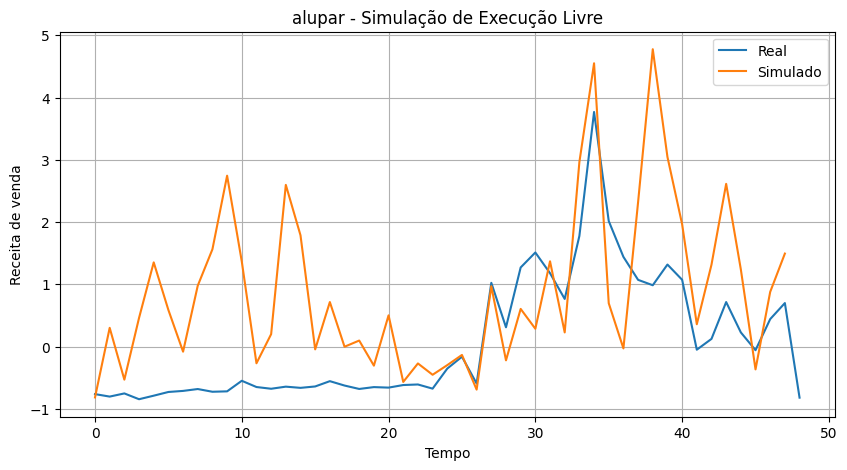

In [233]:
# Plotar os resultados
for empresa in psi_empresas.keys():
    y_real = np.array(dict_empresas[empresa]['Receita de venda'][4:])
    
    mse_free_run = np.mean((y_real[1:] - y_simulation_arx[empresa])**2)
    rmse_free_run = np.sqrt(mse_free_run)
    print(f"************** Company: {empresa} **************")
    print(f"MSE Free Run {mse_free_run}")
    print(f"RMSE Free Run {rmse_free_run}")
    plt.figure(figsize=(10, 5))
    plt.plot(y_real, label='Real')
    plt.plot(y_simulation_arx[empresa], label='Simulado')
    plt.title(f'{empresa} - Simulação de Execução Livre')
    plt.xlabel('Tempo')
    plt.ylabel('Receita de venda')
    plt.legend()
    plt.grid()
    plt.show()

Ploting residual

************** Company: eletrobras **************
MSE Free Run 2.267964735504568
RMSE Free Run 1.5059763396230925


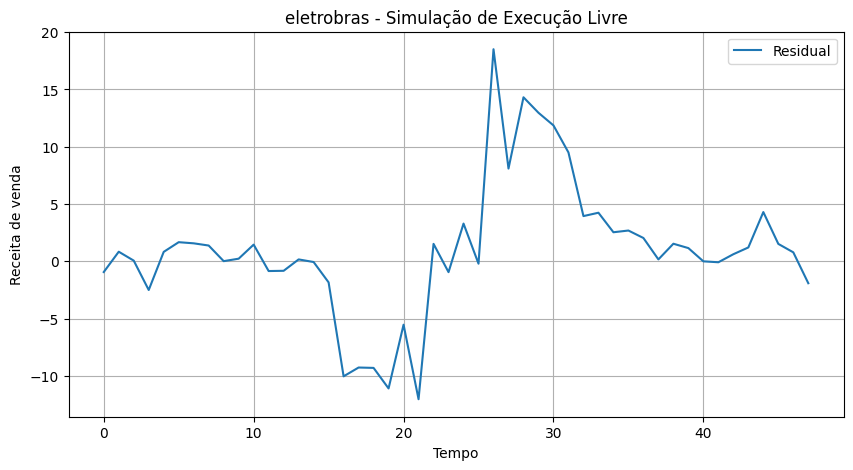

<Figure size 1000x500 with 0 Axes>

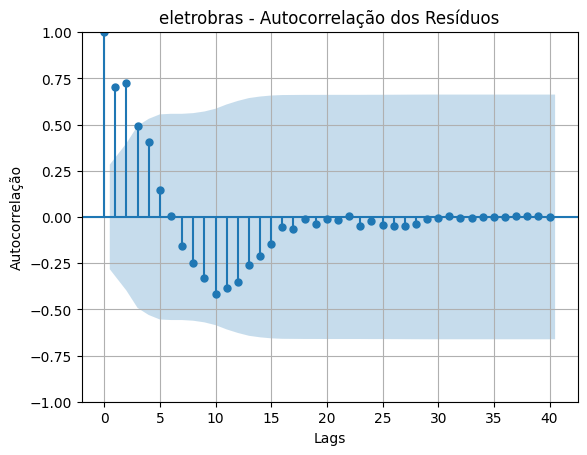

************** Company: tpaulista **************
MSE Free Run 2.267964735504568
RMSE Free Run 1.5059763396230925


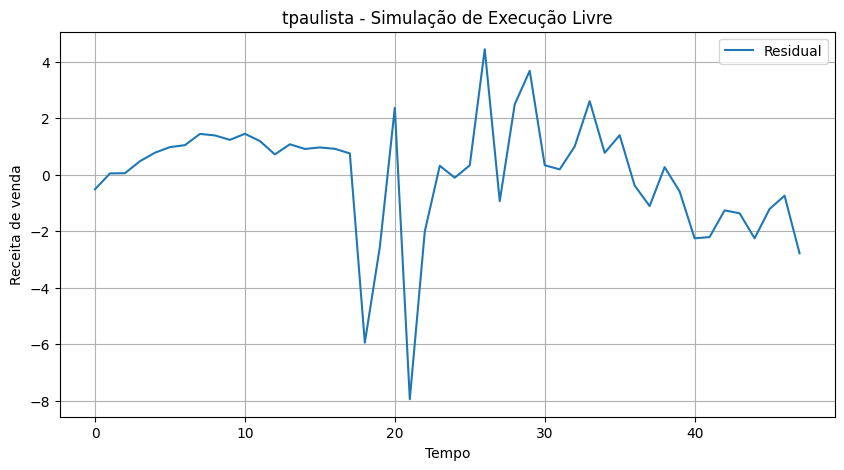

<Figure size 1000x500 with 0 Axes>

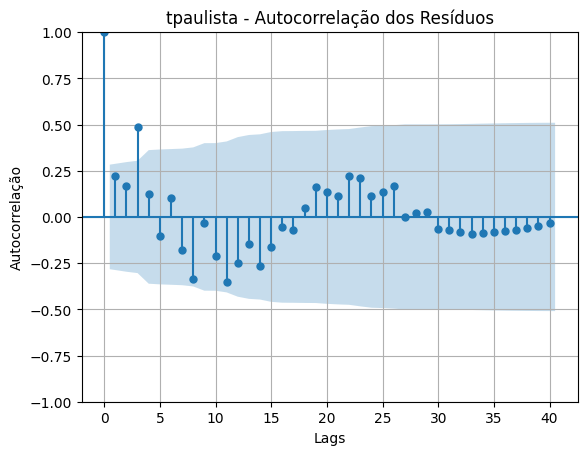

************** Company: taesa **************
MSE Free Run 2.267964735504568
RMSE Free Run 1.5059763396230925


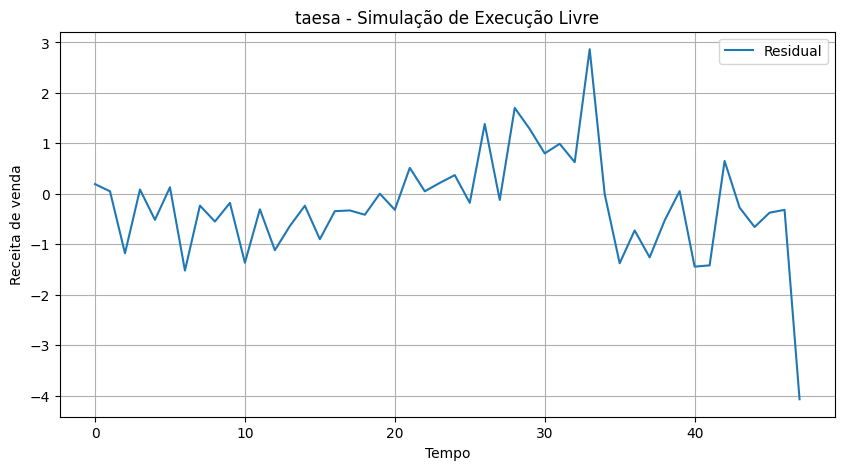

<Figure size 1000x500 with 0 Axes>

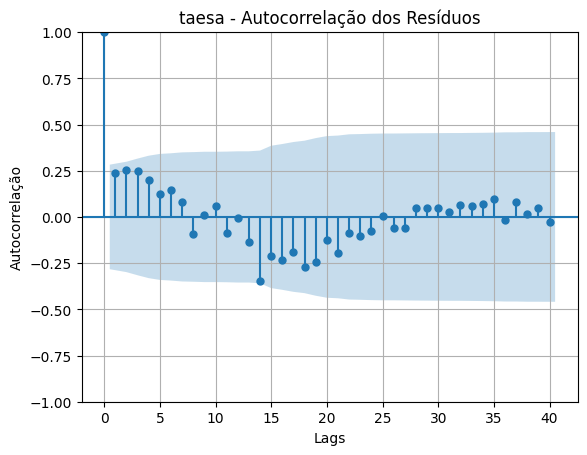

************** Company: alupar **************
MSE Free Run 2.267964735504568
RMSE Free Run 1.5059763396230925


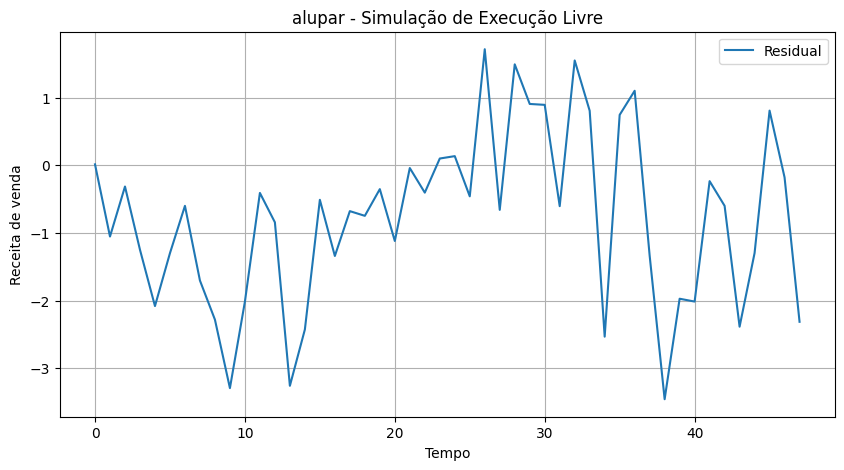

<Figure size 1000x500 with 0 Axes>

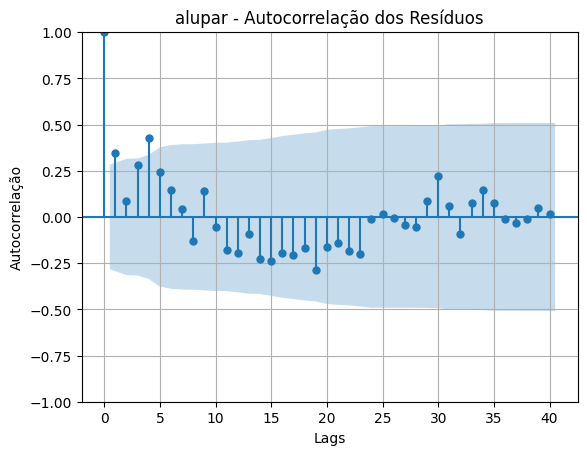

In [234]:
from statsmodels.graphics.tsaplots import plot_acf
residual_arx = {}

#Analysing the residual curve and autocorrelation
for empresa in psi_empresas.keys():
    residual_arx[empresa] = y_real[1:] - y_simulation_arx[empresa]
    print(f"************** Company: {empresa} **************")
    print(f"MSE Free Run {mse_free_run}")
    print(f"RMSE Free Run {rmse_free_run}")
    plt.figure(figsize=(10, 5))
    plt.plot(residual_arx[empresa], label='Residual')
    plt.title(f'{empresa} - Simulação de Execução Livre')
    plt.xlabel('Tempo')
    plt.ylabel('Receita de venda')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot autocorrelation of residuals
    plt.figure(figsize=(10, 5))
    plot_acf(residual_arx[empresa], lags=40)
    plt.title(f'{empresa} - Autocorrelação dos Resíduos')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelação')
    plt.grid()
    plt.show()

# ARMAX MODEL - BATCH

Building the initial model to get the first residual

In [235]:
residual = {}
residuo_armax_array = []
theta_armax = {}
y_estimado_armax = {}

for i,empresa in enumerate(psi_empresas.keys()):
    psi = psi_empresas[empresa]
    #print(f"{empresa} - {np.shape(psi)}")
    psi_t = np.transpose(psi)
    psi_pseudo_inv = np.linalg.pinv(psi)
    inicio_output = len(dict_empresas[empresa]['Receita de venda']) - len(psi)
    theta_armax[empresa] = np.dot(psi_pseudo_inv, dict_empresas[empresa]['Receita de venda'][inicio_output:])
    y_estimado_armax[empresa] = np.dot(psi, theta[empresa])
    #print(f"{empresa} - Theta = {np.shape(theta)}")
    residual[empresa] = (dict_empresas[empresa]['Receita de venda'][inicio_output:] - np.dot(psi, theta[empresa]))
    mse = np.mean(residual[empresa]**2)
    print(f'{empresa} - MSE: {mse}')
    

eletrobras - MSE: 1.2749521275496155e-28
tpaulista - MSE: 1.470372106486628e-28
taesa - MSE: 0.003314883998876431
alupar - MSE: 0.0017148097628464107


Building the main model

In [236]:
i = 0

for empresa in psi_empresas.keys():
    print(f"****************** Begin {empresa} *********************")
    residuo_armax = residual[empresa].copy()
    mse_initial = np.mean(residuo_armax**2)
    print(f"MSE inicial: {mse_initial}")
    j = 0
    
    
    while np.mean(residuo_armax**2) > 0.0005:
        j=j+1
        print(f"Residual shape: {np.shape(residuo_armax)}")
        print(f"PSI shape: {np.shape(psi_empresas[empresa][i])}")
        psi_residuo = np.column_stack((psi_empresas[empresa], residuo_armax))
        psi_residuo_pseudo_inv = np.linalg.pinv(psi_residuo)
        theta_armax[empresa] = np.dot(psi_residuo_pseudo_inv, dict_empresas[empresa]['Receita de venda'][inicio_output:])
        y_estimado_armax[empresa] = np.dot(psi_residuo, theta_armax[empresa])

        residuo_armax = dict_empresas[empresa]['Receita de venda'][inicio_output:] - y_estimado_armax[empresa]
        print(f"Iteração {j} - MSE: {np.mean(residuo_armax**2)}")
    print(f"{i} - Numero de iterações para convergência: {j} - Residuo: {np.mean(residuo_armax**2)}")
    print(f"****************** End {empresa} *********************")
    #armazenar os valores de theta e y_estimado
    i= i + 1

        

****************** Begin eletrobras *********************
MSE inicial: 1.2749521275496155e-28
0 - Numero de iterações para convergência: 0 - Residuo: 1.2749521275496155e-28
****************** End eletrobras *********************
****************** Begin tpaulista *********************
MSE inicial: 1.470372106486628e-28
1 - Numero de iterações para convergência: 0 - Residuo: 1.470372106486628e-28
****************** End tpaulista *********************
****************** Begin taesa *********************
MSE inicial: 0.003314883998876431
Residual shape: (49,)
PSI shape: (72,)
Iteração 1 - MSE: 2.5463495079807993e-29
2 - Numero de iterações para convergência: 1 - Residuo: 2.5463495079807993e-29
****************** End taesa *********************
****************** Begin alupar *********************
MSE inicial: 0.0017148097628464107
Residual shape: (49,)
PSI shape: (72,)
Iteração 1 - MSE: 2.269309231522344e-28
3 - Numero de iterações para convergência: 1 - Residuo: 2.269309231522344e-28
***

Generating the One-Step Ahead Graphs

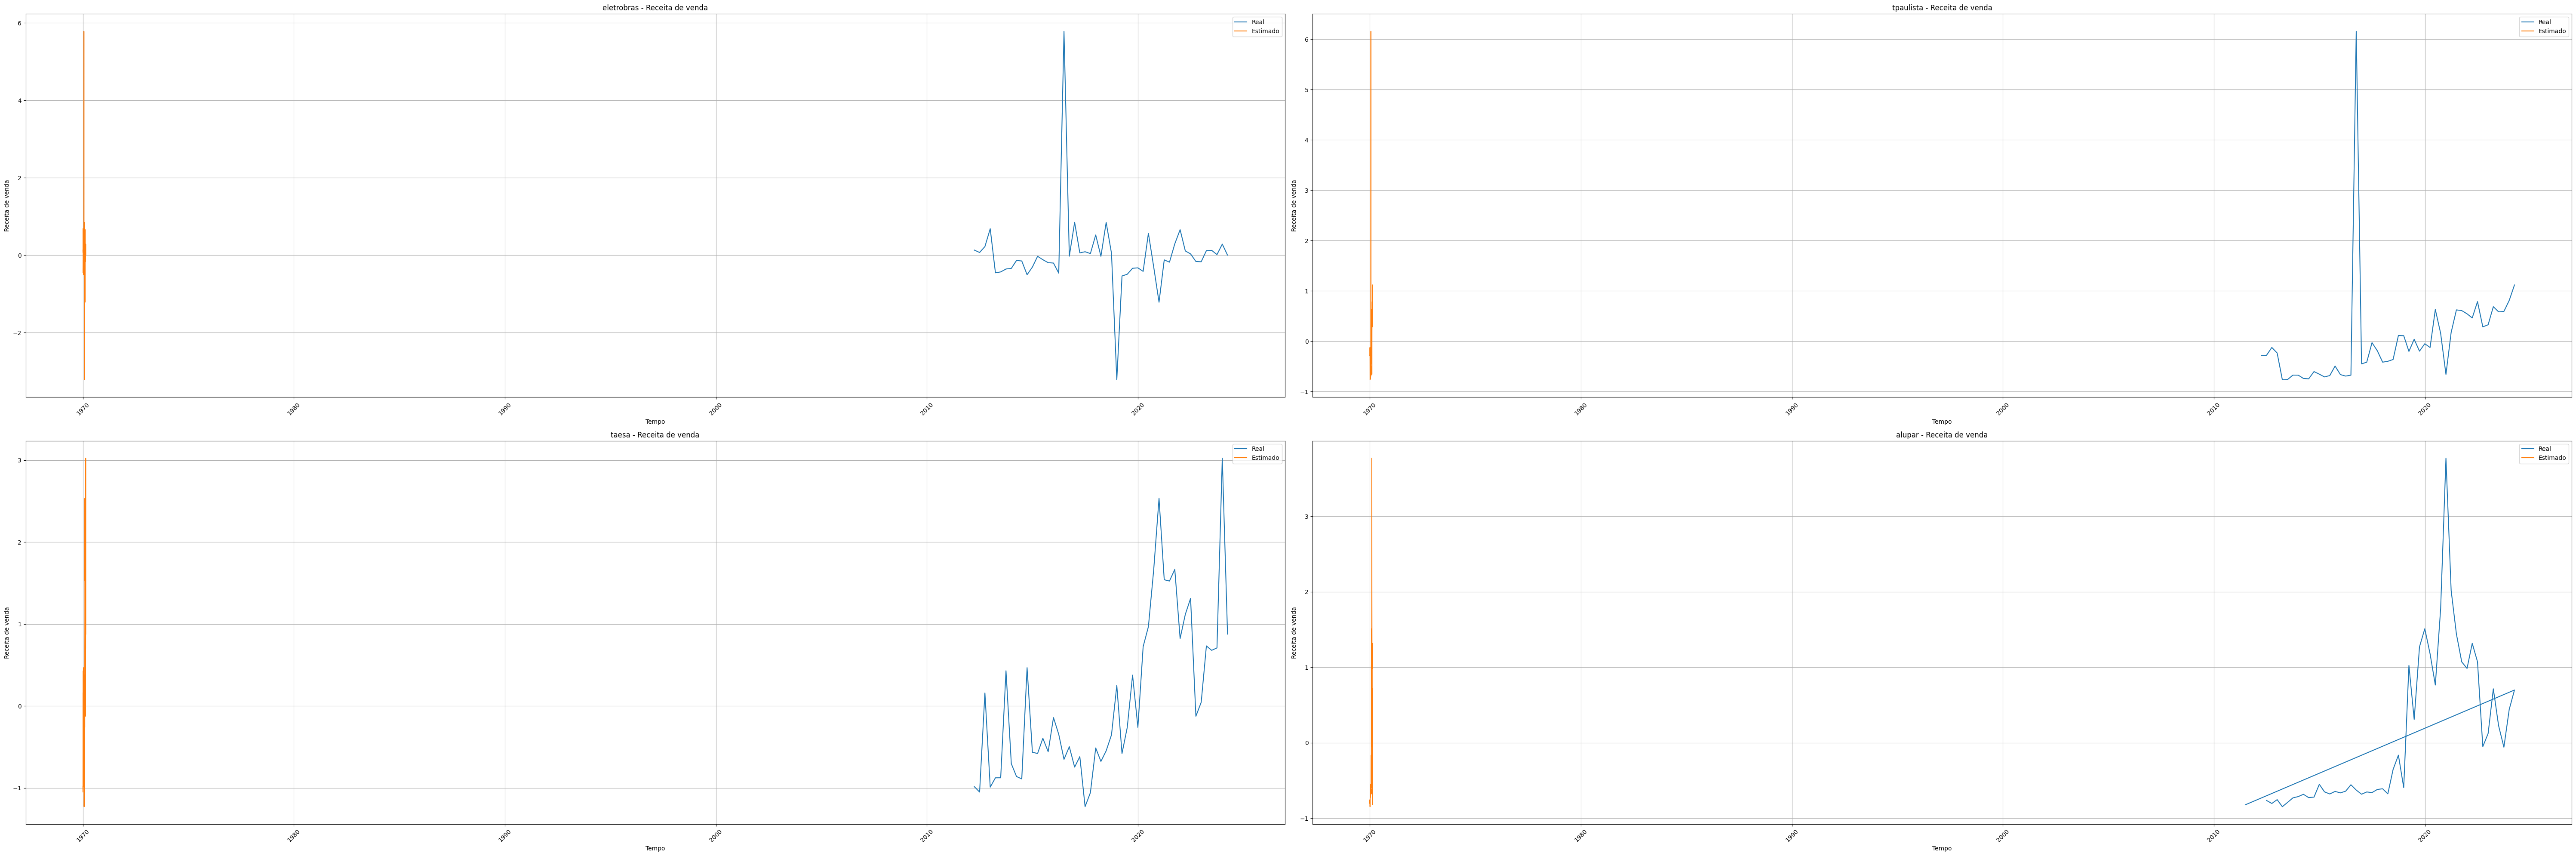

In [237]:
fig, axs = plt.subplots(2, 2, figsize=(60, 20))    
for i,empresa in enumerate(psi_empresas.keys()):
    ax = axs[i // 2, i % 2]  # Selecting the correspondent subplot
    ax.set_title(f'{empresa} - Receita de venda')
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Receita de venda')
    ax.plot(dict_empresas[empresa]['Receita de venda'][inicio_output:], label='Real')
    ax.plot(y_estimado_armax[empresa], label='Estimado')
    ax.legend()
    ax.grid()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Free run simulation

In [238]:
def free_run_simulation_armax(theta, psi_initial, steps, num_lags, exogenous_vars):
    """
    Free-run simulation for ARX model with exogenous variables and multiple lags.

    Parameters:
    - theta: The pre-existing ARX parameters (first num_lags parameters for y, then for exogenous inputs).
    - psi_initial: The initial regressor (past values of y and exogenous variables).
    - steps: Number of simulation steps to perform.
    - num_lags: Number of lags for the ARX model.
    - exogenous_vars: The fixed exogenous variables over time (remain constant during the free-run simulation).

    Returns:
    - y_estimation: The predicted output values for each step.
    """
    psi_free_run = np.array(psi_initial)  # Convert psi_initial to a numpy array
    y_estimation = []            # List to store the predicted y values

    # Extract the current autoregressive part (only get the first num_lags columns)

    current_psi = psi_free_run[:1, :]
    print(f"current_psi={np.shape(current_psi)}")
    print(f"current_psi={current_psi}")
    y_hat = sum(np.dot(current_psi, theta[:72]))  # Linear combination of theta and psi (tanking the residual coeficient off)
    print(f"y_hat={np.shape(y_hat)}")
    
    # Append the estimated value to the list
    y_estimation.append(y_hat)
    print(y_estimation)

    psi_ar_part = psi_free_run[:, :num_lags]
    print(f"psi_ar_part={np.shape(psi_ar_part)}")

    # Loop for the number of simulation steps
    for t in range(steps):
        print(t)
        
        if t == 0:
            continue
        
        print(f"Start Step {t+1} ********************************************")
        #Updating the autoregressive part whith the new estimated value
        psi_lag_4 = np.insert(psi_ar_part[:,0], 1, psi_ar_part[:,1].copy()[-1], axis=0)
        psi_lag_3 = np.insert(psi_ar_part[:,1], 1, psi_ar_part[:,2].copy()[-1], axis=0)
        psi_lag_2 = np.insert(psi_ar_part[:,2], 1, psi_ar_part[:,3].copy()[-1], axis=0)
        psi_lag_1 = np.insert(psi_ar_part[:,3], 1, y_estimation[-1])
        print(f"psi_lag_4={np.shape(psi_lag_4)}")
        print(f"psi_lag_3={np.shape(psi_lag_3)}")
        print(f"psi_lag_2={np.shape(psi_lag_2)}")
        print(f"psi_lag_1={np.shape(psi_lag_1)}")



         # Transformar os arrays em colunas de uma matriz
        psi_ar_part = np.column_stack((psi_lag_4, psi_lag_3, psi_lag_2, psi_lag_1))
        print(f"psi_ar_part={np.shape(psi_ar_part)}")
        print(f"exogenous_vars={np.shape(exogenous_vars[:t+1])}")

        # Combine the autoregressive part with the fixed exogenous variables
        current_psi = np.column_stack((psi_ar_part, exogenous_vars[:t+1]))
        print(f"current_psi={np.shape(current_psi)}")
        
        # Estimate y using the current psi and theta
        y_estimation = np.dot(current_psi, theta[:72])  # Linear combination of theta and psi
        print(f"current_psi={current_psi[0]}")
        print(f"y_hat={y_hat}")
        # Append the estimated value to the list
        print(10*'*')
        print(f"Estimation shape={np.shape(y_estimation)}")

        # Update psi: Shift the autoregressive part and append the new y_hat
        print(f"Current psi {np.shape(current_psi)}")
        print(f"End Step {t+1} - y_hat: {y_estimation[-1]}")

    return np.array(y_estimation)


In [239]:
#Function implementation
y_simulation_armax = {}
for empresa in psi_empresas.keys():
    num_lags = 4                                          # 4 lags in the model
    psi_initial = psi_empresas[empresa][:1]               # Initial regressor (first row of psi matrix)
    exogenous_vars = psi_empresas[empresa][:,4:]          # Exogenous variables (remain constant) 
    print(exogenous_vars.shape)                           # Exogenous variables remain constant
    steps = len(psi_empresas[empresa]) - 1         # Number of steps for simulation
                    
    # Perform the free-run simulation
    y_simulation_armax[empresa] = free_run_simulation_armax(theta_armax[empresa], psi_initial, steps, num_lags, exogenous_vars)

(49, 68)
current_psi=(1, 72)
current_psi=[[-3.73339546e-02 -6.74381875e-01 -3.82504917e-01  6.72842233e-01
   8.04533072e-01  1.33275237e+00  1.33275237e+00 -3.49234336e-01
   3.92634798e-01  3.24826954e-04  3.10099194e-01  5.26463835e-01
  -1.80424935e-01 -1.01099146e-01 -4.22691955e-01 -6.02007803e-01
   1.56294668e-01 -9.22235431e-02 -1.32892322e-01 -1.19852410e-01
   3.56198189e-01  3.93550233e-03  1.89650908e+00  3.11066603e-01
   2.44635884e-01 -9.21592214e-02  3.28098352e-01 -4.51919956e-02
  -1.29349521e-01  2.95920423e-01 -2.11978733e-01  2.92690697e-01
   2.46758763e-01  7.12328743e-03  3.15358140e-01  6.32449845e-02
  -4.72816152e-02 -4.72816152e-02 -4.72816152e-02 -4.72816152e-02
   2.41917994e-01 -2.82929463e-03  3.11980706e-01  5.44895690e-02
   6.54198345e-01 -8.82533501e-01  2.99010324e-02 -4.21332729e-02
   6.05177134e-01  7.40238563e-01  6.67305392e-01  3.97182534e-01
  -3.67960439e-02 -8.40998241e-01 -6.63846153e-03 -7.80683076e-01
  -1.05920921e-01 -2.62537586e-01  

************** Company: eletrobras **************
MSE Free Run 1.2749521275496155e-28
RMSE Free Run 1.1291377805873008e-14


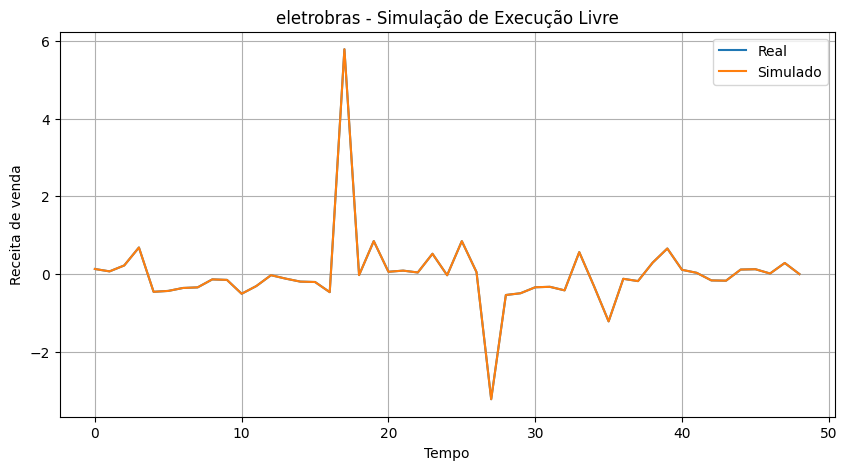

************** Company: tpaulista **************
MSE Free Run 1.470372106486628e-28
RMSE Free Run 1.2125890097170714e-14


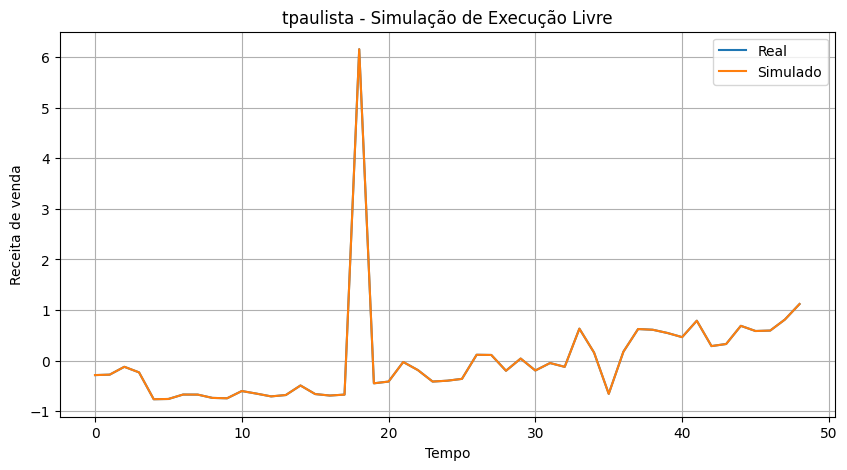

************** Company: taesa **************
MSE Free Run 2.5463495079807993e-29
RMSE Free Run 5.046136648943228e-15


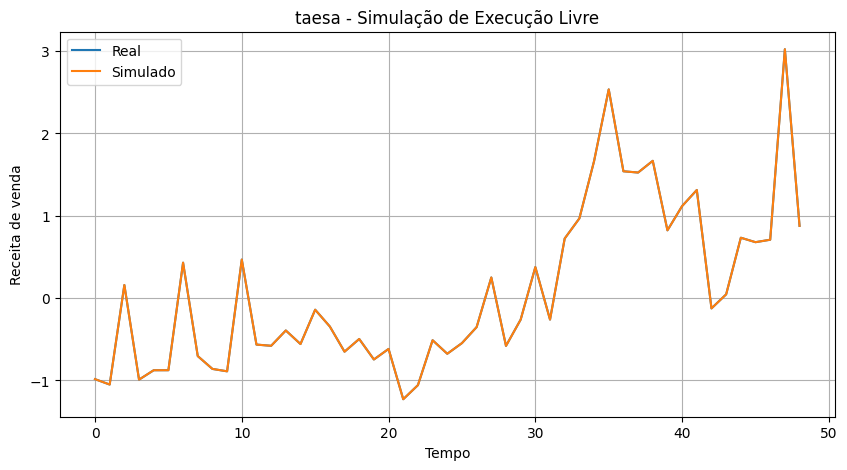

************** Company: alupar **************
MSE Free Run 2.269309231522344e-28
RMSE Free Run 1.506422660318924e-14


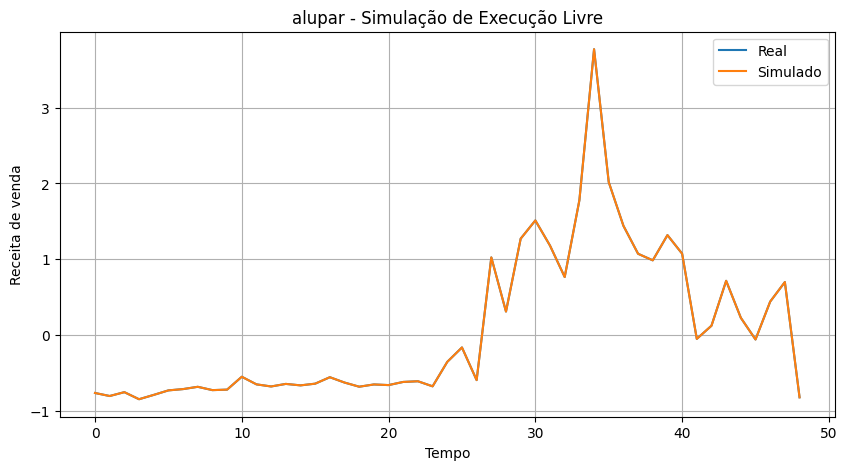

In [240]:
# Ploting the results
for empresa in psi_empresas.keys():
    y_real = np.array(dict_empresas[empresa]['Receita de venda'][4:])
    mse_free_run = np.mean((y_real[:] - y_estimado_armax[empresa])**2)
    rmse_free_run = np.sqrt(mse_free_run)
    print(f"************** Company: {empresa} **************")
    print(f"MSE Free Run {mse_free_run}")
    print(f"RMSE Free Run {rmse_free_run}")
    plt.figure(figsize=(10, 5))
    plt.plot(y_real, label='Real')
    plt.plot(y_estimado_armax[empresa], label='Simulado')
    plt.title(f'{empresa} - Simulação de Execução Livre')
    plt.xlabel('Tempo')
    plt.ylabel('Receita de venda')
    plt.legend()
    plt.grid()
    plt.show()


# NARX MODEL - BATCH

Method to add non-linearities (square terms and interaction terms)

In [241]:
theta_narx = {}
y_estimado_narx = {}
psi_nonlinear = {}
# Add nonlinearity manually (e.g., square terms, interaction terms)
def add_nonlinear_terms(X):
    # Example: Add square of each term
    squared_features = X**2
    
    # Add interaction terms (each feature multiplied by every other feature)
    interaction_terms = []
    num_features = X.shape[1]
    
    for i in range(num_features):
        for j in range(i+1, num_features):
            interaction_terms.append(X[:, i] * X[:, j])
    
    interaction_terms = np.array(interaction_terms).T  # Transpose to match the shape
    
    # Combine original, squared, and interaction terms
    return np.hstack((X, squared_features, interaction_terms))

Calculating theta matrix

In [242]:
for empresa in psi_empresas.keys():    
    # Add nonlinear terms (square and interaction terms) to the regressor matrix
    psi_nonlinear[empresa] = add_nonlinear_terms(psi_empresas[empresa])
    print(f"PSI_nonlinear shape = {np.shape(psi_nonlinear[empresa])}")

    # Solve the regression problem using least squares
    psi_pseudo_inv = np.linalg.pinv(psi_nonlinear[empresa])
    inicio_output = len(dict_empresas[empresa]['Receita de venda']) - len(psi)
    theta_narx[empresa] = np.dot(psi_pseudo_inv, dict_empresas[empresa]['Receita de venda'][inicio_output:])
    
    print(f"theta_narx shape = {np.shape(theta_narx[empresa])}")
    y_estimado_narx[empresa] = np.dot(psi_nonlinear[empresa], theta_narx[empresa])

    mse = np.mean((dict_empresas[empresa]['Receita de venda'][inicio_output:] -  y_estimado_narx[empresa]))**2
    print(f'{empresa} - MSE: {mse}')
    

PSI_nonlinear shape = (49, 2700)
theta_narx shape = (2700,)
eletrobras - MSE: 5.62455680368975e-32
PSI_nonlinear shape = (49, 2700)
theta_narx shape = (2700,)
tpaulista - MSE: 2.448572064083116e-32
PSI_nonlinear shape = (49, 2700)
theta_narx shape = (2700,)
taesa - MSE: 2.766268787242252e-30
PSI_nonlinear shape = (49, 2700)
theta_narx shape = (2700,)
alupar - MSE: 9.572353306090659e-31


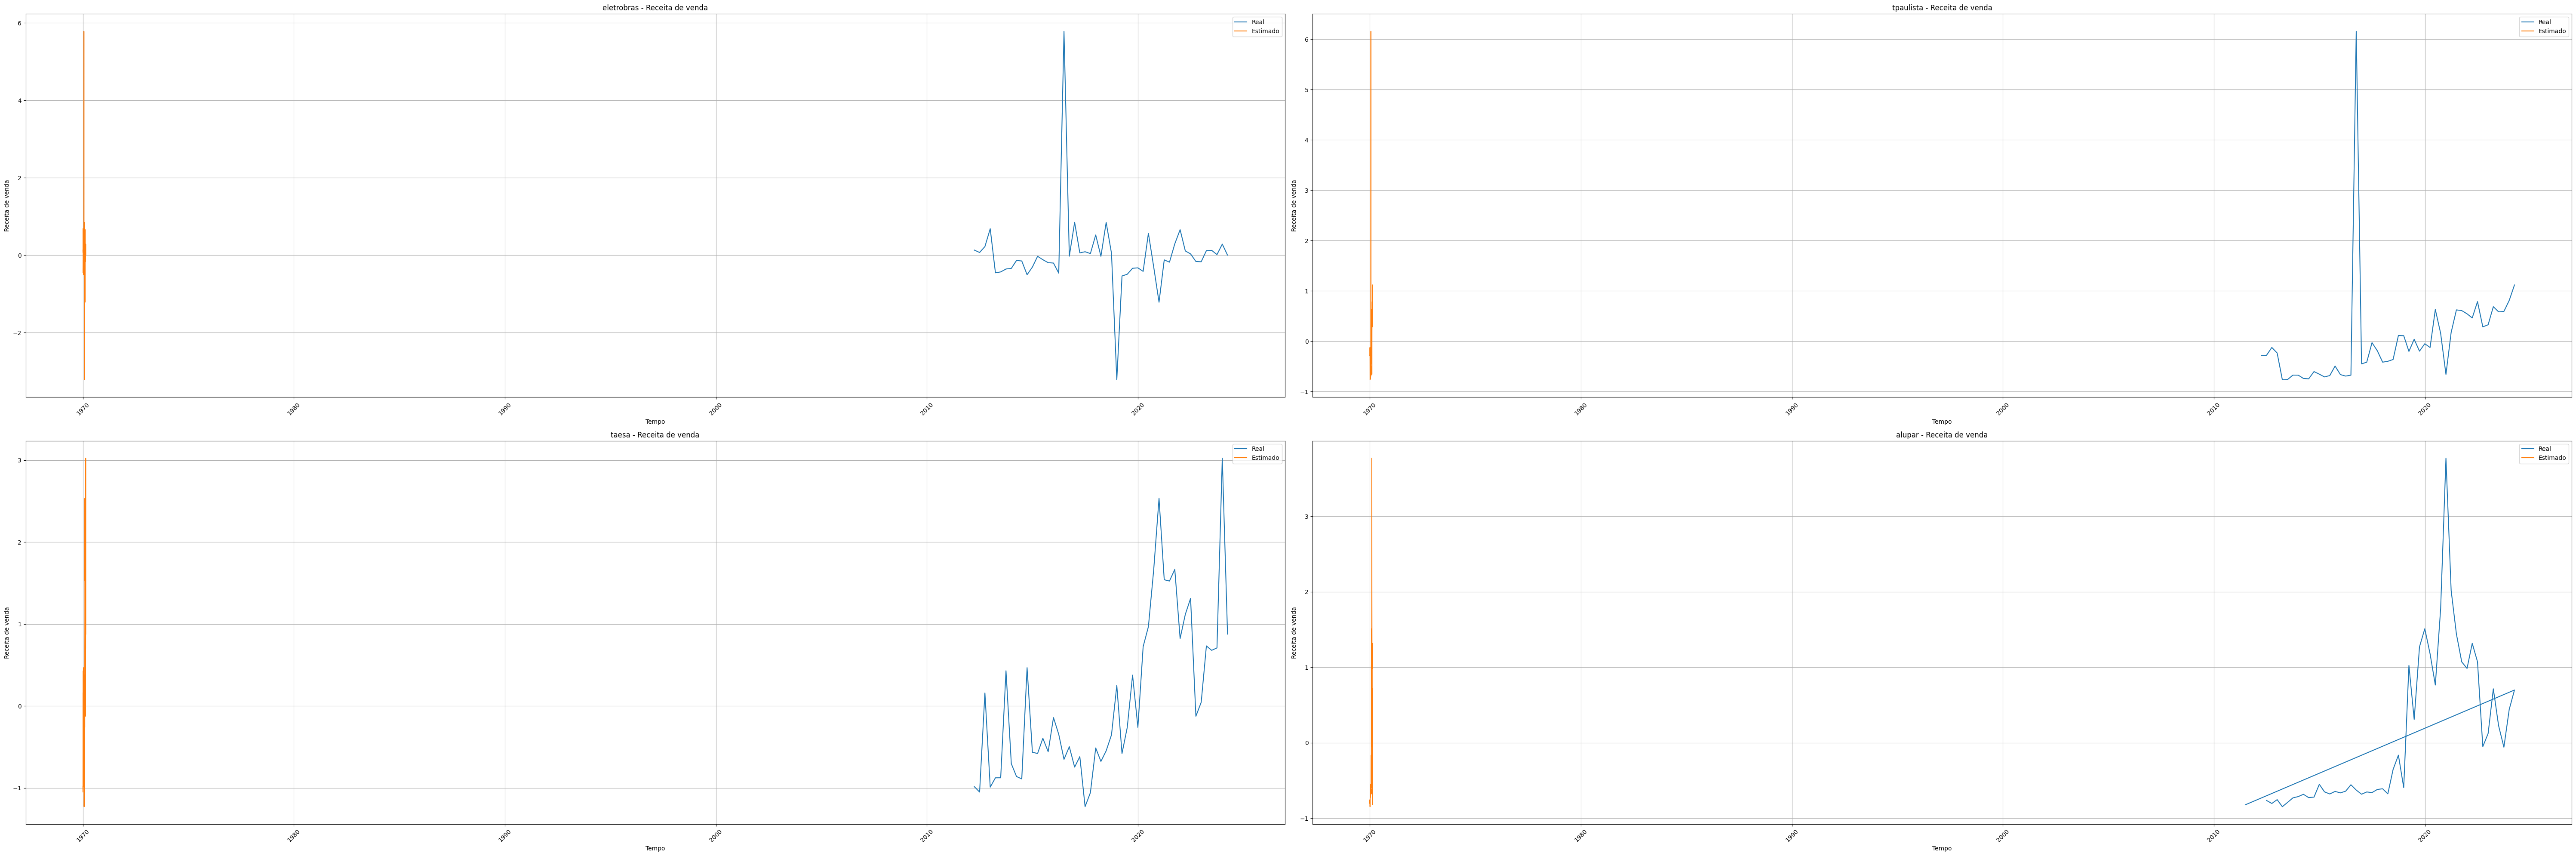

In [243]:
fig, axs = plt.subplots(2, 2, figsize=(60, 20))    
for i,empresa in enumerate(psi_empresas.keys()):
    ax = axs[i // 2, i % 2]  # Selecting the correspondent subplot
    ax.set_title(f'{empresa} - Receita de venda')
    ax.set_xlabel('Tempo')
    ax.set_ylabel('Receita de venda')
    ax.plot(dict_empresas[empresa]['Receita de venda'][inicio_output:], label='Real')
    ax.plot(y_estimado_narx[empresa], label='Estimado')
    ax.legend()
    ax.grid()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Free run simulation

In [244]:
def free_run_simulation_narx(theta, psi_initial, steps, num_lags, exogenous_vars):
    """
    Free-run simulation for ARX model with exogenous variables and multiple lags.

    Parameters:
    - theta: The pre-existing ARX parameters (first num_lags parameters for y, then for exogenous inputs).
    - psi_initial: The initial regressor (past values of y and exogenous variables).
    - steps: Number of simulation steps to perform.
    - num_lags: Number of lags for the ARX model.
    - exogenous_vars: The fixed exogenous variables over time (remain constant during the free-run simulation).

    Returns:
    - y_estimation: The predicted output values for each step.
    """
    psi_free_run = np.array(psi_initial)  # Convert psi_initial to a numpy array
    y_estimation = []            # List to store the predicted y values

    # Extract the current autoregressive part (only get the first num_lags columns)

    current_psi = psi_free_run[:1, :]
    narx_current_psi = add_nonlinear_terms(current_psi)
    print(f"current_psi={np.shape(current_psi)}")
    y_hat = np.dot(narx_current_psi, theta_narx[empresa])  # Linear combination of theta and psi
    print(f"y_hat={np.shape(y_hat)}")

    # Append the estimated value to the list
    y_estimation.append(y_hat)
    print(y_estimation)

    psi_ar_part = psi_free_run[:, :num_lags]

    # Loop for the number of simulation steps
    for t in range(steps):
        print(t)
        
        if t == 0:
            continue
        
        print(f"{empresa} - Start Step {t+1} ********************************************")
        #Updating the autoregressive part whith the new estimated value
        psi_lag_4 = np.insert(psi_ar_part[:,0], 1, psi_ar_part[:,1].copy()[-1], axis=0)
        psi_lag_3 = np.insert(psi_ar_part[:,1], 1, psi_ar_part[:,2].copy()[-1], axis=0)
        psi_lag_2 = np.insert(psi_ar_part[:,2], 1, psi_ar_part[:,3].copy()[-1], axis=0)
        psi_lag_1 = np.insert(psi_ar_part[:,3], 1, y_estimation[-1])
        print(f"psi_lag shape = {np.shape(psi_lag_1)}")

         # Transformar os arrays em colunas de uma matriz
        psi_ar_part = np.column_stack((psi_lag_4, psi_lag_3, psi_lag_2, psi_lag_1))

        # Combine the autoregressive part with the fixed exogenous variables
        current_psi = np.column_stack((psi_ar_part, exogenous_vars[:t+1]))
        print(f"current_psi={np.shape(current_psi)}")
        
        #Adding nonlinear terms
        narx_current_psi = add_nonlinear_terms(current_psi)


        # Estimate y using the current psi and theta
        y_estimation = np.dot(narx_current_psi, theta_narx[empresa])  # Linear combination of theta and psi
        print(10*'*')
        print(f"Estimation shape={np.shape(y_estimation)}")

        # Update psi: Shift the autoregressive part and append the new y_hat
        print(f"Current psi {np.shape(narx_current_psi)}")
        print(f"End Step {t+1} - y_hat: {y_estimation[-1]}")
    

    return np.array(y_estimation)


In [245]:
#Function implementation
y_estimado_narx_fr = {}
for empresa in psi_empresas.keys():
    num_lags = 4                                          # 4 lags in the model
    psi_initial = psi_empresas[empresa][:1]               # Initial regressor (first row of psi matrix)
    exogenous_vars = psi_empresas[empresa][:,4:]          # Exogenous variables (remain constant) 
    print(exogenous_vars.shape)                           # Exogenous variables remain constant
    steps = len(psi_empresas[empresa]) - 1         # Number of steps for simulation
                    
    # Perform the free-run simulation
    y_estimado_narx_fr[empresa] = free_run_simulation_narx(theta_armax[empresa], psi_initial, steps, num_lags, exogenous_vars)

(49, 68)
current_psi=(1, 72)
y_hat=(1,)
[array([0.13324805])]
0
1
eletrobras - Start Step 2 ********************************************
psi_lag shape = (2,)
current_psi=(2, 72)
**********
Estimation shape=(2,)
Current psi (2, 2700)
End Step 2 - y_hat: 0.07193160411116739
2
eletrobras - Start Step 3 ********************************************
psi_lag shape = (3,)
current_psi=(3, 72)
**********
Estimation shape=(3,)
Current psi (3, 2700)
End Step 3 - y_hat: 0.22741754488267582
3
eletrobras - Start Step 4 ********************************************
psi_lag shape = (4,)
current_psi=(4, 72)
**********
Estimation shape=(4,)
Current psi (4, 2700)
End Step 4 - y_hat: 0.6120481454687687
4
eletrobras - Start Step 5 ********************************************
psi_lag shape = (5,)
current_psi=(5, 72)
**********
Estimation shape=(5,)
Current psi (5, 2700)
End Step 5 - y_hat: -0.49605221241384045
5
eletrobras - Start Step 6 ********************************************
psi_lag shape = (6,)
curren

************** Company: eletrobras **************
MSE Free Run 9.339709382469471e-30
RMSE Free Run 3.0560938111369344e-15


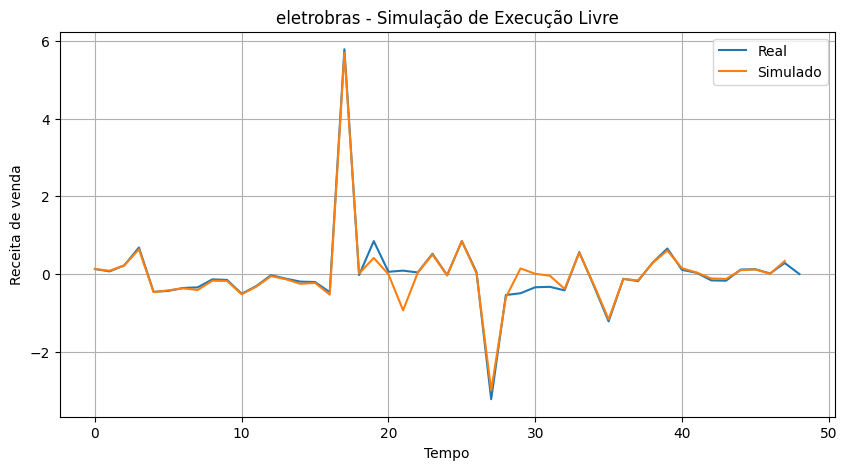

************** Company: tpaulista **************
MSE Free Run 1.1084451018912325e-29
RMSE Free Run 3.3293319178045804e-15


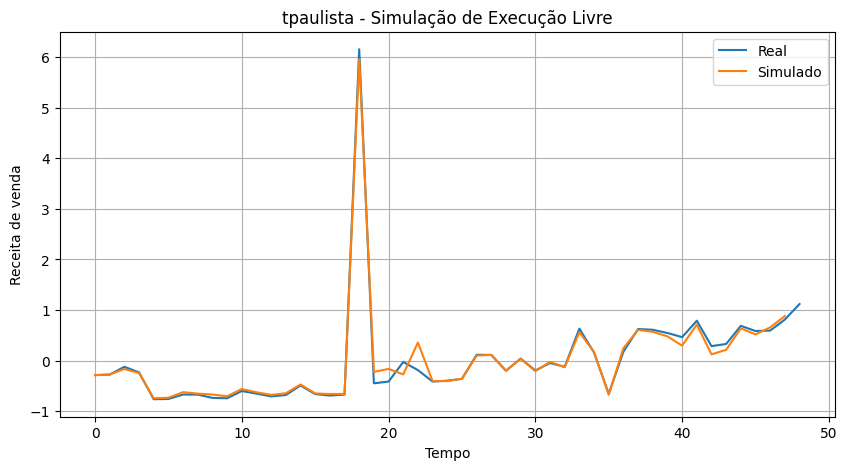

************** Company: taesa **************
MSE Free Run 1.6829378198471948e-29
RMSE Free Run 4.102362514268083e-15


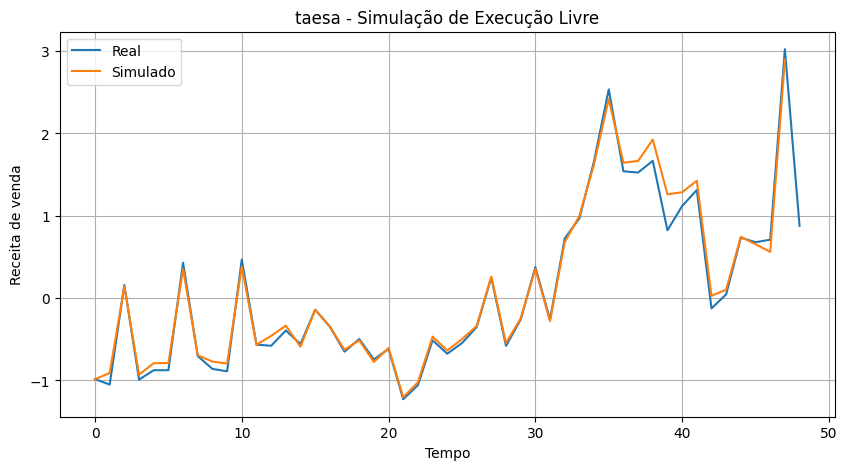

************** Company: alupar **************
MSE Free Run 8.643892941038448e-30
RMSE Free Run 2.9400498194823922e-15


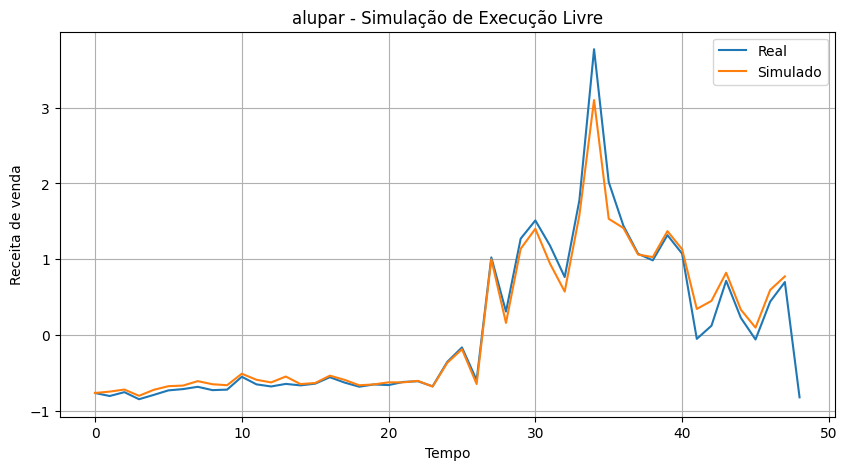

In [246]:
# Plotar os resultados
for empresa in psi_empresas.keys():
    y_real = np.array(dict_empresas[empresa]['Receita de venda'][4:])
    
    mse_free_run = np.mean((y_real[:] - y_estimado_narx[empresa])**2)
    rmse_free_run = np.sqrt(mse_free_run)
    print(f"************** Company: {empresa} **************")
    print(f"MSE Free Run {mse_free_run}")
    print(f"RMSE Free Run {rmse_free_run}")
    plt.figure(figsize=(10, 5))
    plt.plot(y_real, label='Real')
    plt.plot(y_estimado_narx_fr[empresa], label='Simulado')
    plt.title(f'{empresa} - Simulação de Execução Livre')
    plt.xlabel('Tempo')
    plt.ylabel('Receita de venda')
    plt.legend()
    plt.grid()
    plt.show()

Ploting residual

************** Company: eletrobras **************
MSE Free Run 8.643892941038448e-30
RMSE Free Run 2.9400498194823922e-15


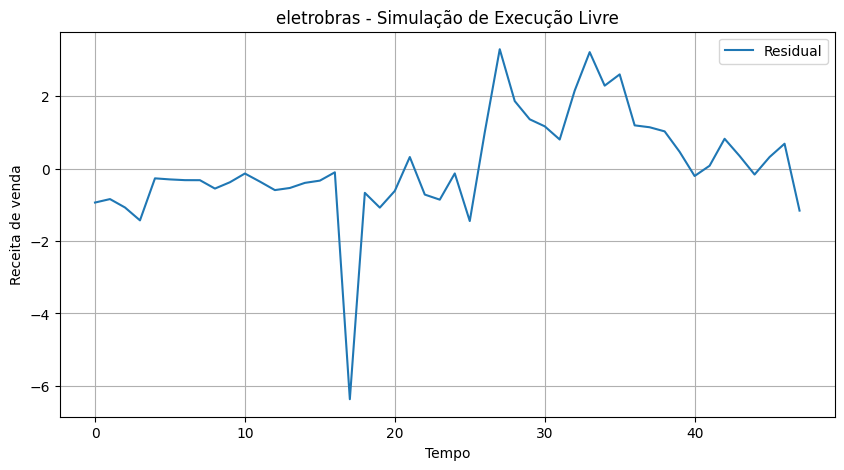

<Figure size 1000x500 with 0 Axes>

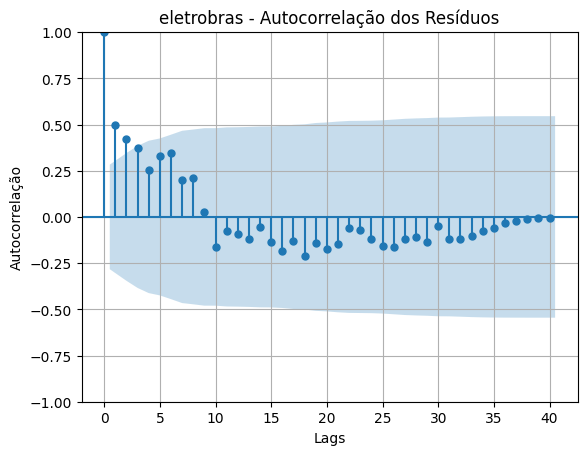

************** Company: tpaulista **************
MSE Free Run 8.643892941038448e-30
RMSE Free Run 2.9400498194823922e-15


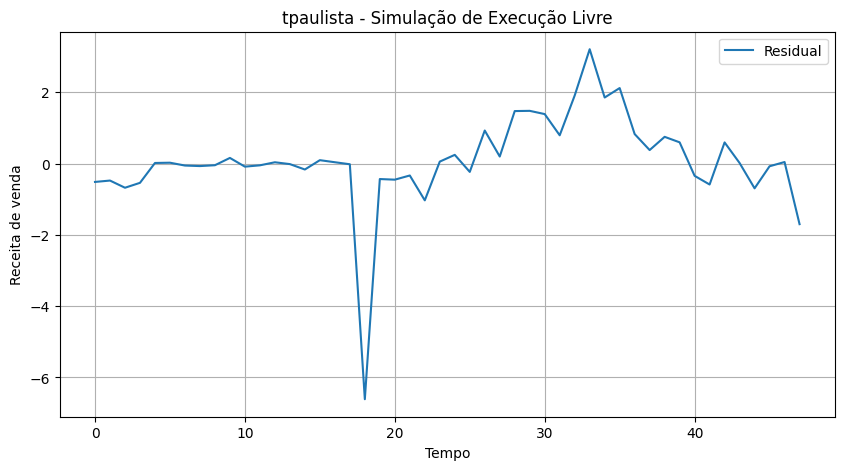

<Figure size 1000x500 with 0 Axes>

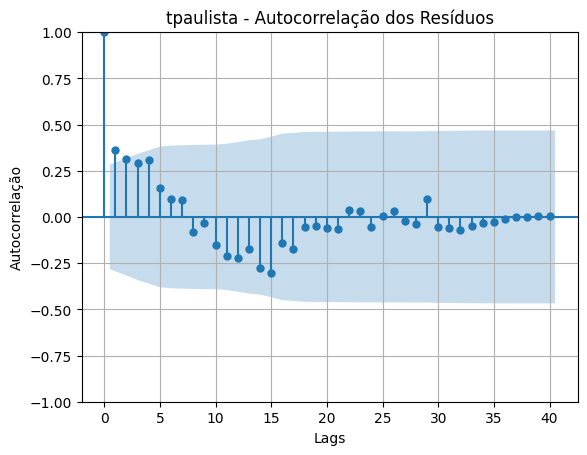

************** Company: taesa **************
MSE Free Run 8.643892941038448e-30
RMSE Free Run 2.9400498194823922e-15


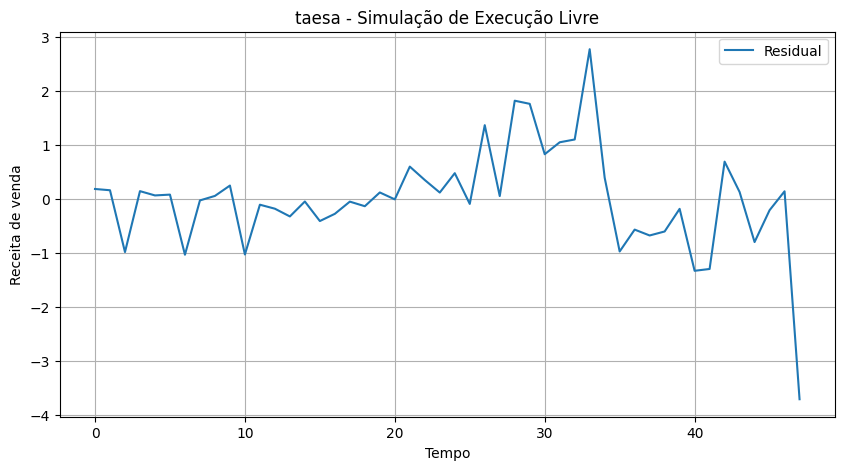

<Figure size 1000x500 with 0 Axes>

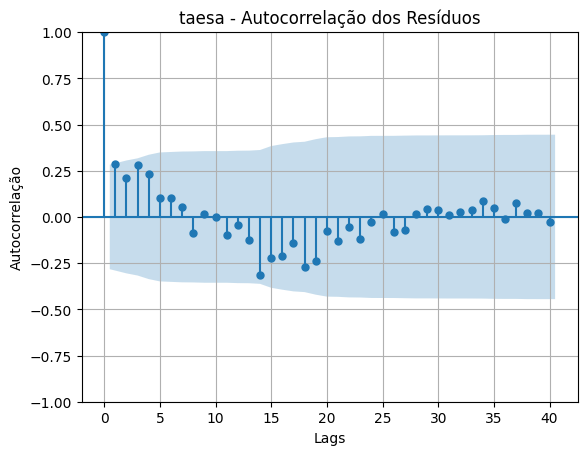

************** Company: alupar **************
MSE Free Run 8.643892941038448e-30
RMSE Free Run 2.9400498194823922e-15


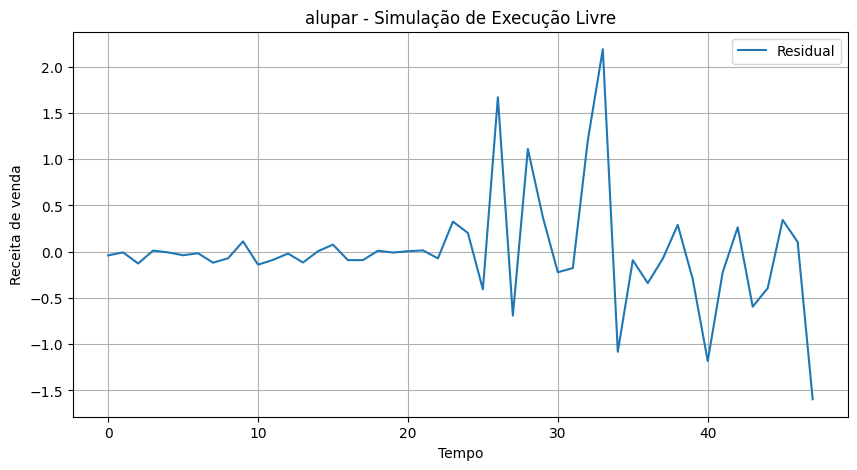

<Figure size 1000x500 with 0 Axes>

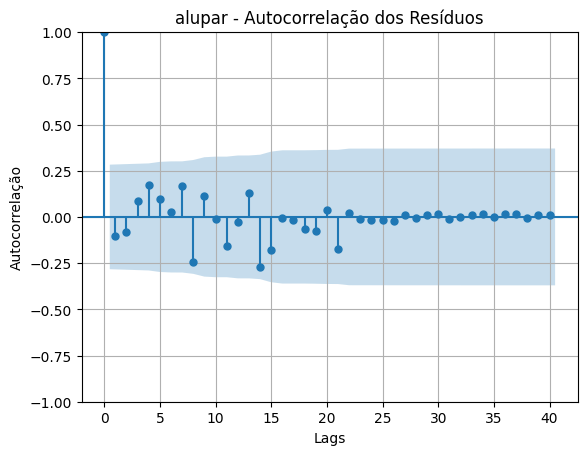

In [247]:
from statsmodels.graphics.tsaplots import plot_acf
residual_narx = {}

#Analysing the residual curve and autocorrelation
for empresa in psi_empresas.keys():
    residual_narx[empresa] = y_real[1:] - y_estimado_narx_fr[empresa]
    print(f"************** Company: {empresa} **************")
    print(f"MSE Free Run {mse_free_run}")
    print(f"RMSE Free Run {rmse_free_run}")
    plt.figure(figsize=(10, 5))
    plt.plot(residual_narx[empresa], label='Residual')
    plt.title(f'{empresa} - Simulação de Execução Livre')
    plt.xlabel('Tempo')
    plt.ylabel('Receita de venda')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot autocorrelation of residuals
    plt.figure(figsize=(10, 5))
    plot_acf(residual_narx[empresa], lags=40)
    plt.title(f'{empresa} - Autocorrelação dos Resíduos')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelação')
    plt.grid()
    plt.show()

# NARX MODEL - BATCH - CROSS VALIDATION

In [248]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Define the number of splits
n_splits = 4
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize dictionaries to store results
theta_narx = {}
y_estimado_narx = {}
mse_scores = {}
theta_narx_cross = {}


for empresa in psi_empresas.keys():
    # Extract the input and output data
    X = psi_empresas[empresa]
    y = dict_empresas[empresa]['Receita de venda']
    
    # Initialize lists to store fold results
    fold_mse_scores = []
    
    i=0
    # Perform TimeSeriesSplit cross-validation
    for train_index, val_index in tscv.split(X):
        i = i + 1
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Add nonlinear terms (square and interaction terms) to the regressor matrix
        psi_nonlinear_train = add_nonlinear_terms(X_train)
        psi_nonlinear_val = add_nonlinear_terms(X_val)
        
        # Solve the regression problem using least squares
        psi_pseudo_inv = np.linalg.pinv(psi_nonlinear_train)
        theta_narx_cross[empresa] = np.dot(psi_pseudo_inv, y_train)
        print(f"{theta_narx_cross[empresa][:3]}")
        
        # Predict on the validation set
        y_pred = np.dot(psi_nonlinear_val, theta)
        
        # Calculate MSE for the current fold
        mse = np.mean((y_val - y_pred) ** 2)
        fold_mse_scores.append(mse)

        print(f"{empresa} - Split {i} - MSE = {mse}")
        # plt.figure(figsize=(10, 5))
        # plt.plot(y_val, label='Real')
        # plt.plot(y_pred, label='Estimado NARX')
        # plt.title(f'{empresa} - Previsão NARX')
        # plt.xlabel('Tempo')
        # plt.ylabel('Receita de venda')
        # plt.legend()
        # plt.grid()
        # plt.show()
    
    # Store the average MSE for the current company
    mse_scores[empresa] = np.mean(fold_mse_scores)
    
    # Train the final model on the entire dataset
    psi_nonlinear[empresa] = add_nonlinear_terms(X)
    psi_pseudo_inv = np.linalg.pinv(psi_nonlinear[empresa])
    theta_narx[empresa] = np.dot(psi_pseudo_inv, y[4:])
    y_estimado_narx[empresa] = np.dot(psi_nonlinear[empresa], theta_narx[empresa])
    
    # Print the results
    print(f"************** Company: {empresa} **************")
    print(f"Average MSE (Cross-Validation): {mse_scores[empresa]}")
    print(f"Final Model Coefficients:\n{theta_narx[empresa]}")
    print(f"Predicted values:\n{y_estimado_narx[empresa]}")

[0.00672531 0.00171714 0.00048661]


C:\Users\giova\AppData\Local\Temp\ipykernel_16072\1197535722.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]


TypeError: unsupported operand type(s) for *: 'float' and 'dict'

L1 Regularization

In [172]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import Lasso

# Define the number of splits
n_splits = 4
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize dictionaries to store results
theta_narx_lasso = {}
y_estimado_narx = {}
mse_scores = {}
theta_narx_cross = {}

# Define the regularization parameter (alpha)
alpha = 0.1

for empresa in psi_empresas.keys():
    # Extract the input and output data
    X = psi_empresas[empresa]
    y = dict_empresas[empresa]['Receita de venda']
    
    # Initialize lists to store fold results
    fold_mse_scores = []
    
    i = 0
    # Perform TimeSeriesSplit cross-validation
    for train_index, val_index in tscv.split(X):
        i += 1
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Add nonlinear terms (square and interaction terms) to the regressor matrix
        psi_nonlinear_train = add_nonlinear_terms(X_train)
        psi_nonlinear_val = add_nonlinear_terms(X_val)
        
        # Solve the regression problem using Lasso (L1 regularization)
        lasso = Lasso(alpha=alpha)
        lasso.fit(psi_nonlinear_train, y_train)
        theta_narx_cross[empresa] = lasso.coef_
        print(f"{theta_narx_cross[empresa][:3]}")
        
        # Predict on the validation set
        y_pred = lasso.predict(psi_nonlinear_val)
        
        # Calculate MSE for the current fold
        mse = np.mean((y_val - y_pred) ** 2)
        fold_mse_scores.append(mse)

        print(f"{empresa} - Split {i} - MSE = {mse}")
        # plt.figure(figsize=(10, 5))
        # plt.plot(y_val, label='Real')
        # plt.plot(y_pred, label='Estimado NARX')
        # plt.title(f'{empresa} - Previsão NARX')
        # plt.xlabel('Tempo')
        # plt.ylabel('Receita de venda')
        # plt.legend()
        # plt.grid()
        # plt.show()
    
    # Store the average MSE for the current company
    mse_scores[empresa] = np.mean(fold_mse_scores)
    
    # Train the final model on the entire dataset
    psi_nonlinear[empresa] = add_nonlinear_terms(X)
    lasso_final = Lasso(alpha=alpha)
    lasso_final.fit(psi_nonlinear[empresa], y[4:])
    theta_narx_lasso[empresa] = lasso_final.coef_
    print(f"theta shape = {len(theta_narx[empresa]) - np.sum(theta_narx[empresa] == 0)}")
    y_estimado_narx[empresa] = lasso_final.predict(psi_nonlinear[empresa])
    mse_final = np.mean(y[4:] - y_estimado_narx[empresa])
    
    # Print the results
    print(f"************** Company: {empresa} **************")
    print(f"Average MSE (Cross-Validation): {mse_scores[empresa]}")
    print(f"MSE final: {mse_final}")
    print(f"Final Model Coefficients:\n{theta_narx[empresa]}")
    print(f"Predicted values:\n{y_estimado_narx[empresa]}")

C:\Users\giova\AppData\Local\Temp\ipykernel_448160\3125226279.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]
C:\Users\giova\AppData\Local\Temp\ipykernel_448160\3125226279.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]
C:\Users\giova\AppData\Local\Temp\ipykernel_448160\3125226279.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

[0. 0. 0.]
eletrobras - Split 1 - MSE = 3.9298380840549907
[ 0.  0. -0.]
eletrobras - Split 2 - MSE = 0.2629279036702019
[ 0.02139965  0.         -0.        ]
eletrobras - Split 3 - MSE = 2.870123948917682
[ 0.39571354 -0.         -0.        ]
eletrobras - Split 4 - MSE = 0.07441850327864327
theta shape = 24
************** Company: eletrobras **************
Average MSE (Cross-Validation): 1.7843271099803797
MSE final: -4.7580986769649563e-17
Final Model Coefficients:
[-0.  0. -0. ...  0.  0.  0.]
Predicted values:
[-0.03922601 -0.10983955  0.19549602  0.23249387 -0.3853656   0.00819682
 -0.1942296  -0.25776859 -0.28379402  0.42391362 -0.36632917 -0.1984773
 -0.41484387 -0.20920524 -0.50249187 -0.07965792  0.25418177  4.53073124
 -0.08506076  0.89304082 -0.03595637  0.21405191 -0.13776937  0.35046567
 -0.0381491   0.37463737  0.09570167 -1.12116673 -0.51755164 -0.63430397
 -0.33741686 -0.30796074 -0.29907928  0.41127389 -0.16325903 -0.95460764
 -0.2042644  -0.15476637  0.08862236  0.151

C:\Users\giova\AppData\Local\Temp\ipykernel_448160\3125226279.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]
C:\Users\giova\AppData\Local\Temp\ipykernel_448160\3125226279.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]
C:\Users\giova\AppData\Local\Temp\ipykernel_448160\3125226279.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

theta shape = 24
************** Company: tpaulista **************
Average MSE (Cross-Validation): 1.5864186880427915
MSE final: -9.06304509898087e-17
Final Model Coefficients:
[0. 0. 0. ... 0. 0. 0.]
Predicted values:
[-0.22483375 -0.35640992 -0.04613722 -0.48672526 -0.37325013 -0.54732358
 -0.08324249 -0.48741877 -0.26328994 -0.47807907 -0.77152582 -0.43733739
 -0.34779111 -0.59509243  0.81761921 -0.56859794 -0.56192134 -0.54997995
  4.06419662 -0.42995884 -0.32342602 -0.13927957 -0.08421848 -0.72841841
 -0.47541297 -0.27740673  0.01901035  0.15286228 -0.04142247 -0.08323762
 -0.14643273 -0.17219059 -0.10805932  0.44465133  0.04836588 -0.35877872
  0.11387599  0.46515645  0.69795413  0.45046041  0.65805432  0.27951928
  0.2688787   0.41978254  0.39102074  0.5035942   0.38177792  0.41981205
  0.79134181]
[ 0.  0. -0.]
taesa - Split 1 - MSE = 0.06872208746625984
[ 0. -0. -0.]
taesa - Split 2 - MSE = 0.021358132257154834
[ 0.  0. -0.]
taesa - Split 3 - MSE = 0.9817273100059261
[0.2321853

C:\Users\giova\AppData\Local\Temp\ipykernel_448160\3125226279.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]
C:\Users\giova\AppData\Local\Temp\ipykernel_448160\3125226279.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = y[train_index], y[val_index]
C:\Users\giova\AppData\Local\Temp\ipykernel_448160\3125226279.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

[0. 0. 0.]
alupar - Split 4 - MSE = 1.4667242202863868
theta shape = 21
************** Company: alupar **************
Average MSE (Cross-Validation): 1.7960728460912763
MSE final: -3.8517941670668696e-17
Final Model Coefficients:
[ 0.  0.  0. ... -0. -0. -0.]
Predicted values:
[-0.42915447 -0.59295399 -0.64107273 -0.48202659 -0.61256062 -0.5957306
 -0.46750828 -0.51967654 -0.57242988 -0.56427607 -0.47668493 -0.44173614
 -0.59161267 -0.59428977 -0.53500459 -0.65942753 -0.55355577 -0.65282593
 -0.64897682 -0.58837206 -0.5874704  -0.43510188 -0.490174   -0.35414845
 -0.3700004  -0.24609568 -0.27669457  0.06096113  0.36041777  0.52343954
  1.07244696  1.26760618  0.9597641   1.56770635  3.38108813  1.92513992
  1.57569532  0.96003348  0.98352534  0.86340482  0.51853473 -0.03411179
  0.2063602   0.6005221   0.32210078 -0.11973928  0.06500054  0.22678895
 -0.05589263]


In [179]:
lasso.sparse_coef_

<1x2700 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [168]:
#Free run function implementation
y_estimado_narx_fr = {}
for empresa in psi_empresas.keys():
    num_lags = 4                                          # 4 lags in the model
    psi_initial = psi_empresas[empresa][:1]               # Initial regressor (first row of psi matrix)
    exogenous_vars = psi_empresas[empresa][:,4:]          # Exogenous variables (remain constant) 
    print(exogenous_vars.shape)                           # Exogenous variables remain constant
    steps = len(psi_empresas[empresa]) - 1         # Number of steps for simulation
    # Perform the free-run simulation
    y_estimado_narx_fr[empresa] = free_run_simulation_narx(theta_narx[empresa], psi_initial, steps, num_lags, exogenous_vars)

(49, 68)
current_psi=(1, 72)
y_hat=(1,)
[array([0.15954853])]
0
1
eletrobras - Start Step 2 ********************************************
psi_lag shape = (2,)
current_psi=(2, 72)
**********
Estimation shape=(2,)
Current psi (2, 2700)
End Step 2 - y_hat: 0.08893498801409894
2
eletrobras - Start Step 3 ********************************************
psi_lag shape = (3,)
current_psi=(3, 72)
**********
Estimation shape=(3,)
Current psi (3, 2700)
End Step 3 - y_hat: 0.3942705628385323
3
eletrobras - Start Step 4 ********************************************
psi_lag shape = (4,)
current_psi=(4, 72)
**********
Estimation shape=(4,)
Current psi (4, 2700)
End Step 4 - y_hat: 0.4312684053183553
4
eletrobras - Start Step 5 ********************************************
psi_lag shape = (5,)
current_psi=(5, 72)
**********
Estimation shape=(5,)
Current psi (5, 2700)
End Step 5 - y_hat: -0.18659106275182996
5
eletrobras - Start Step 6 ********************************************
psi_lag shape = (6,)
current

MSE = 0.17871843466568696


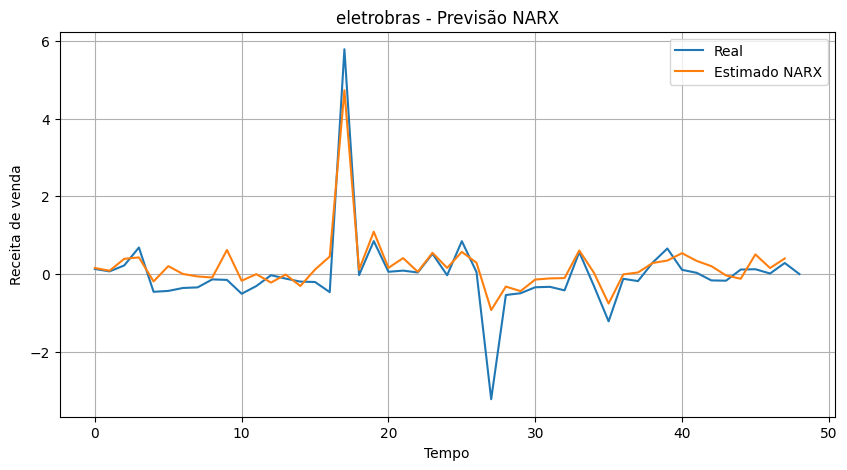

MSE = 0.17195993741458535


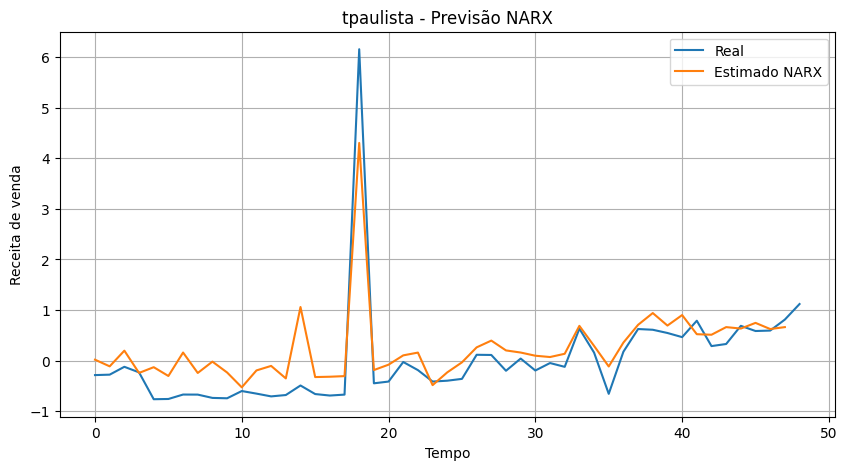

MSE = 0.10725322249150737


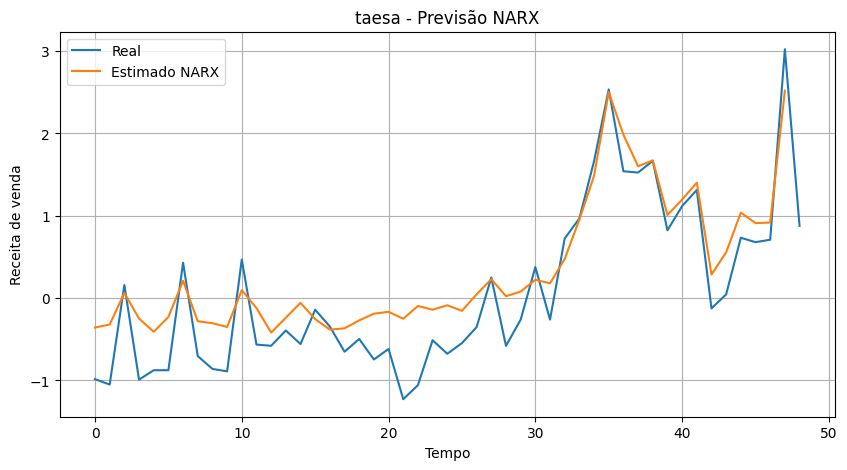

MSE = 0.08751144627665532


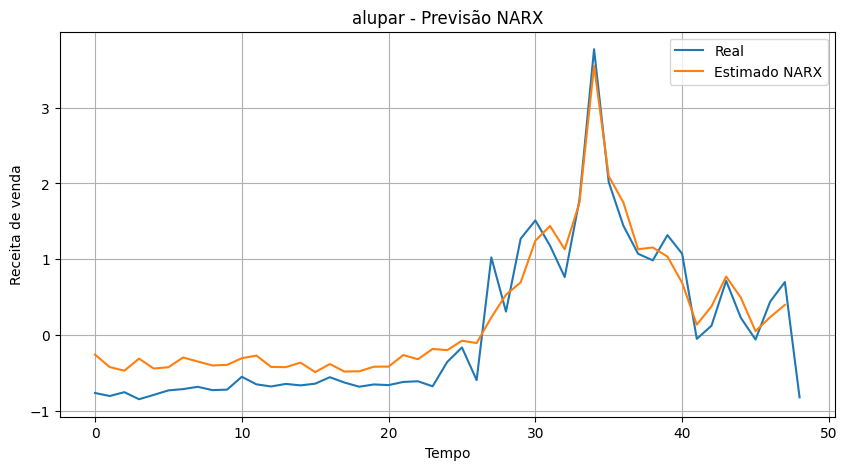

In [171]:
import matplotlib.pyplot as plt

# Plotar os resultados das previsões
for empresa in psi_empresas.keys():
    y_real = np.array(dict_empresas[empresa]['Receita de venda'][4:])
    mse = np.mean((y_real - y_estimado_narx[empresa])**2)
    print(f"MSE = {mse}")
    # Plotando os resultados do modelo NARX
    plt.figure(figsize=(10, 5))
    plt.plot(y_real, label='Real')
    plt.plot(y_estimado_narx_fr[empresa], label='Estimado NARX')
    plt.title(f'{empresa} - Previsão NARX')
    plt.xlabel('Tempo')
    plt.ylabel('Receita de venda')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plotando os resultados da simulação de execução livre NARX
    # plt.figure(figsize=(10, 5))
    # plt.plot(y_real, label='Real')
    # plt.plot(y_estimado_narx_fr[empresa], label='Simulado NARX Execução Livre')
    # plt.title(f'{empresa} - Simulação de Execução Livre NARX')
    # plt.xlabel('Tempo')
    # plt.ylabel('Receita de venda')
    # plt.legend()
    # plt.grid()
    # plt.show()

Analysing the coefficients

In [176]:
theta_narx['taesa']

array([0.0115132 , 0.01233084, 0.01283622, ..., 0.00115898, 0.00322937,
       0.00495701])

In [178]:
theta_narx_lasso['taesa']

array([0., 0., 0., ..., 0., 0., 0.])